# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Danang Agung Restu Aji
- Email: danangrestuaji@gmail.com
- Id Dicoding: profdara

## Persiapan

### Menyiapkan library yang dibutuhkan

Pada tahap ini, proyek ini membutuhkan berbagai library untuk mendukung seluruh proses analisis data, mulai dari persiapan data, visualisasi, hingga pemodelan machine learning. Import library sangat penting dilakukan karena setiap library menyediakan fungsi, kelas, dan alat khusus yang dibutuhkan untuk berbagai tahapan analisis data. Dengan mengimpor library, kita dapat:  
1. Mengakses fitur-fitur canggih untuk manipulasi data, visualisasi, dan pemodelan machine learning tanpa harus menulis kode dari nol.
2. Memastikan workflow lebih efisien, terstruktur, dan mudah direproduksi.
3. Mendukung kompatibilitas dan integrasi antar berbagai tahapan analisis, mulai dari pembersihan data hingga evaluasi model.

Tanpa import library, proses analisis data akan menjadi sangat terbatas dan memakan waktu, karena harus membangun semua fungsi dasar secara manual.

In [69]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score,
    precision_recall_curve, auc
)

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib

warnings.filterwarnings("ignore")  # Hindari warning yang mengganggu

Penjelasan singkat library yang saya gunakan dan alasan penggunaannya:

1. os
    Untuk memastikan file dataset tersedia sebelum diproses, sehingga workflow otomatis dan aman dari error file tidak ditemukan.

2. warnings
    Membantu menjaga output notebook tetap bersih dengan menyembunyikan warning yang tidak relevan.

3. numpy (np) 
    Digunakan untuk perhitungan numerik dan statistik, sangat penting dalam analisis data dan deteksi outlier.

4. pandas (pd)
    Library utama untuk membaca, membersihkan, dan memanipulasi data tabular (DataFrame), inti dari seluruh pipeline data.

5. matplotlib.pyplot (plt) & seaborn (sns)
    Keduanya digunakan untuk visualisasi data, membantu memahami pola, distribusi, dan insight penting sebelum modeling.

6. scikit-learn (sklearn)  
    - model_selection: Untuk membagi data, validasi silang, dan tuning hyperparameter model.
    - preprocessing.StandardScaler: Menstandarisasi fitur numerik agar model lebih akurat.
    - linear_model.LogisticRegression: Model baseline untuk klasifikasi.
    - ensemble (RandomForest, Stacking, Voting): Model ensemble untuk meningkatkan akurasi dan stabilitas prediksi.
    - metrics: Mengukur performa model secara objektif (akurasi, recall, precision, AUC, dsb).

7. xgboost.XGBClassifier
    Model boosting yang powerful, sering unggul pada data tabular dan kompetisi prediksi.

8. imblearn.over_sampling.SMOTE
    Untuk menyeimbangkan kelas target (Dropout vs Non-Dropout), sehingga model tidak bias ke kelas mayoritas.

9. joblib
    Menyimpan dan memuat model yang sudah dilatih, memudahkan deployment dan prediksi di masa depan.

Seluruh library di atas dipilih agar pipeline analisis data berjalan efisien, hasil analisis mudah dipahami, dan model prediksi yang dihasilkan akurat serta siap digunakan pada aplikasi nyata.


### Menyiapkan data yang akan digunakan

Tujuan Penyiapan Data
Penyiapan data bertujuan memastikan dataset tersedia, bersih, dan siap digunakan untuk proses analisis lebih lanjut. Tahap ini penting agar seluruh proses eksplorasi, visualisasi, dan pemodelan berjalan lancar tanpa error akibat data yang tidak ditemukan atau format yang tidak sesuai.

Penjelasan Fungsi
1. file_path = "data.csv"  
    Menentukan lokasi file dataset yang akan digunakan.

2. if os.path.exists(file_path): ... else: ... 
    Mengecek apakah file dataset tersedia di direktori kerja. Jika ada, data dimuat menggunakan pd.read_csv() dengan separator ;. Jika tidak ditemukan, program akan menghentikan eksekusi dan memberikan pesan error yang jelas.

3. print(df.head())
    Menampilkan 5 baris pertama data untuk memastikan data berhasil dimuat dan memberikan gambaran awal struktur dataset.

Langkah ini memastikan data siap dianalisis dan menghindari error akibat file yang hilang atau format yang salah.


In [70]:
# Load dataset dengan separator ";"
file_path = "data.csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=";")
    print("Data berhasil dimuat!")
    print("Sample data berisi:")
    print(df.head())
else:
    raise FileNotFoundError(f"File tidak ditemukan di path: {file_path}")



Data berhasil dimuat!
Sample data berisi:
   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2    

Berdasarkan data diatas, berikut adalah beberapa temuan utama:

1. Ukuran dan Struktur Data
- Dataset berisi 4.424 baris dan 37 kolom yang mencakup data demografi, akademik, ekonomi, dan status mahasiswa.
- Kolom target adalah Status dengan tiga kategori utama: Graduate (lulus), Dropout (mengundurkan diri), dan Enrolled (masih terdaftar).

2. Fitur Numerik dan Kategorikal
- Sebagian besar fitur bertipe numerik seperti nilai masuk (Admission_grade), usia saat mendaftar (Age_at_enrollment), dan progres akademik per semester.
- Fitur kategorikal seperti status pernikahan (Marital_status), mode aplikasi, jurusan (Course), dan kewarganegaraan (Nacionality) direpresentasikan dalam bentuk kode angka.

3. Distribusi Status Mahasiswa
- Terdapat proporsi signifikan mahasiswa yang mengalami Dropout (sekitar 32 persen dari total data), yang menjadi fokus utama analisis.
- Sisanya terbagi antara mahasiswa yang lulus dan masih aktif.

## Data Understanding


Data Understanding adalah tahap awal dalam proses analisis data yang bertujuan untuk memahami karakteristik, struktur, kualitas, dan pola dalam dataset yang akan dianalisis. Pada tahap ini, analis melakukan eksplorasi data secara menyeluruh untuk:

- Memahami tipe data dan struktur kolom.
- Mengetahui distribusi nilai pada setiap fitur.
- Mengidentifikasi missing values, duplikasi, dan outlier.
- Menemukan pola awal, insight, atau potensi masalah pada data.
- Mendokumentasikan temuan awal sebagai dasar untuk tahap preprocessing dan modeling berikutnya.

Tahap ini sangat penting agar proses analisis dan pemodelan berjalan efektif, serta hasil yang diperoleh dapat diinterpretasikan dengan benar.



Proses Data Understanding pada proyek saya

Pada notebook ini, proses data understanding dilakukan secara sistematis melalui beberapa langkah berikut:

1. Pemeriksaan Struktur Data
    - Menggunakan df.info() untuk melihat tipe data, jumlah kolom, dan jumlah data pada setiap kolom.
    - Menggunakan df.describe(include="all") untuk mendapatkan statistik deskriptif dari seluruh kolom, baik numerik maupun kategorikal.
    - Menampilkan beberapa baris awal data dengan df.head() untuk melihat bentuk data secara langsung.

2. Pengecekan Duplikasi**
    - Mengecek apakah ada baris data yang duplikat dengan df.duplicated().sum().
    - Hasil: Tidak ditemukan duplikat pada dataset.

3. Analisis Distribusi Target
    - Menggunakan df.Status.value_counts() untuk mengetahui distribusi status mahasiswa (Graduate, Dropout, Enrolled).
    - Insight: Ditemukan bahwa sekitar 32% mahasiswa mengalami dropout, yang menjadi fokus utama analisis.

4. Pengecekan Missing Values**
    - Menggunakan df.isna().sum() untuk memastikan tidak ada nilai yang hilang pada dataset.
    - Hasil: Tidak ditemukan missing values.

5. Visualisasi Distribusi Data Numerik
    - Membuat histogram untuk setiap kolom numerik menggunakan seaborn/matplotlib.
    - Tujuan: Memahami distribusi, mendeteksi skewness, dan melihat potensi outlier.

6. Deteksi Outlier
    - Menggunakan metode IQR (Interquartile Range) untuk mendeteksi outlier pada setiap fitur numerik.
    - Menyimpan hasil deteksi outlier dan menampilkan jumlah serta lokasi outlier pada setiap kolom.

7. Visualisasi Outlier
    - Membuat boxplot untuk setiap fitur numerik untuk memvisualisasikan keberadaan outlier.

8. Insight Awal
    - Mendokumentasikan insight penting terkait struktur data, distribusi status, fitur utama, dan potensi masalah (outlier, distribusi tidak merata, dsb).


In [71]:
# Cek info awal
df.info()
df.describe(include="all")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Penjelasan output df.info() dan df.describe() di atas:

1. Output df.info()
- Menampilkan ringkasan struktur DataFrame.
- Jumlah baris: 4.424 (index 0 sampai 4423).
- Jumlah kolom: 37.
- Tipe data:  
    - 29 kolom bertipe int64 (bilangan bulat, misal: Marital_status, Application_mode, Gender, dsb).
    - 7 kolom bertipe float64 (bilangan desimal, misal: Admission_grade, GDP, Inflation_rate, dsb).
    - 1 kolom bertipe object (teks), yaitu kolom Status (Graduate, Dropout, Enrolled).
- Tidak ada missing values: Semua kolom memiliki 4.424 data (Non-Null Count sama dengan jumlah baris).

2. Output df.describe()
- Menampilkan statistik deskriptif untuk kolom numerik:
    - count: Jumlah data pada setiap kolom (semua 4.424).
    - mean: Rata-rata nilai pada setiap kolom.
    - std: Standar deviasi (penyebaran data).
    - min: Nilai minimum.
    - 25% / 50% / 75%: Kuartil 1, median, dan kuartil 3.
    - max: Nilai maksimum.
- Statistik ini membantu memahami distribusi, rentang, dan variasi data pada setiap fitur numerik.
- Untuk kolom kategorikal (object), jika menggunakan include="all", akan muncul info seperti jumlah kategori unik, nilai terbanyak (top), dan frekuensi kemunculannya.

In [72]:
# cek duplikat
df.duplicated().sum()

np.int64(0)

tidak ada duplikat

In [73]:
df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

ada 3 status yang ada pada kolom status, yaitu
- Graduate = Lulus
- Dropout = Mengundurkan Diri
- Enrolled = Teraftar

Dari data ini, terlihat bahwa sebanyak **1.421 siswa mengalami dropout** (32% dari total siswa), yang merupakan perhatian utama bagi Jaya Jaya Institut. Dengan analisis yang lebih mendalam, kita dapat mengidentifikasi faktor-faktor yang berkontribusi terhadap dropout dan mengambil tindakan pencegahan yang lebih efektif.

In [74]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Dari hasil df.isna(), terlihat bahwa tidak ada missing values dalam dataset kamu—setiap kolom memiliki nilai yang lengkap. Ini berarti kamu tidak perlu menangani data yang hilang dengan metode seperti imputasi atau penghapusan baris.


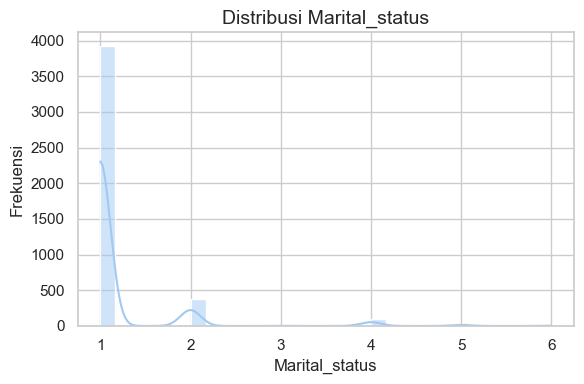

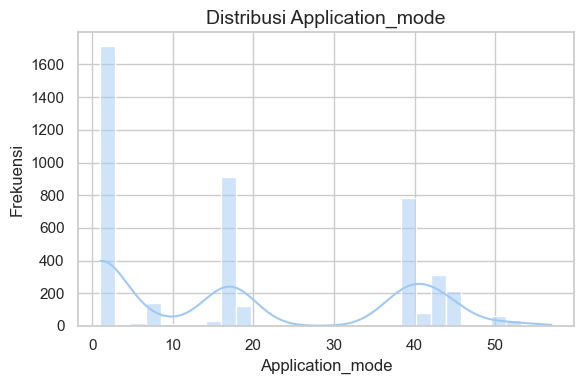

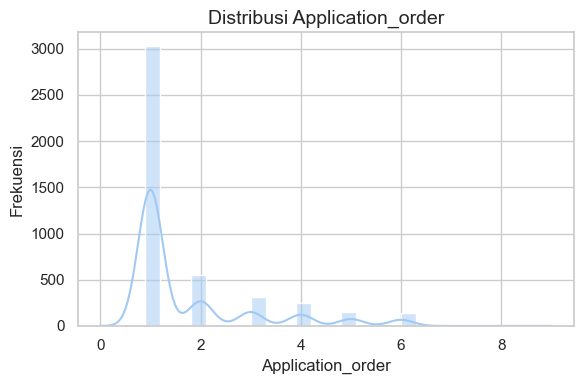

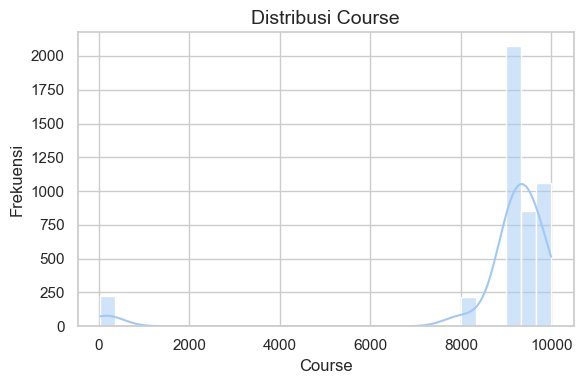

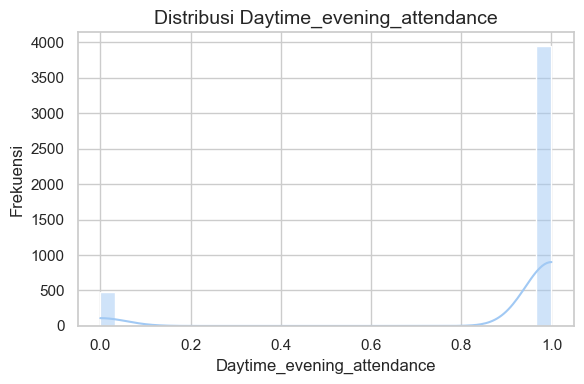

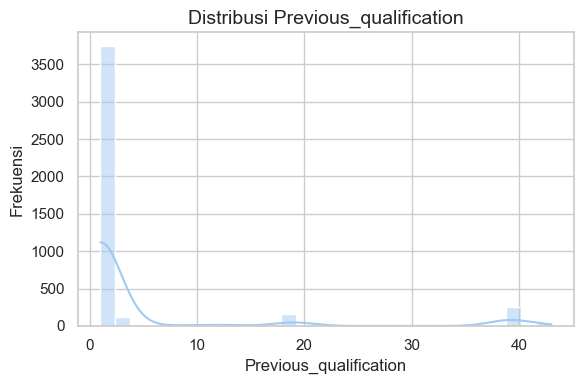

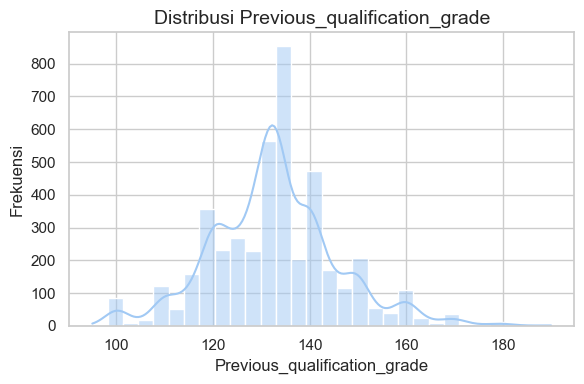

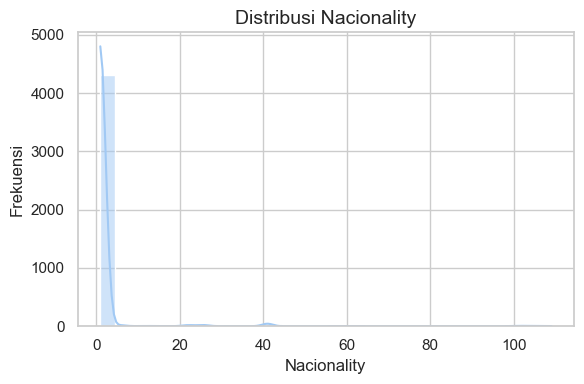

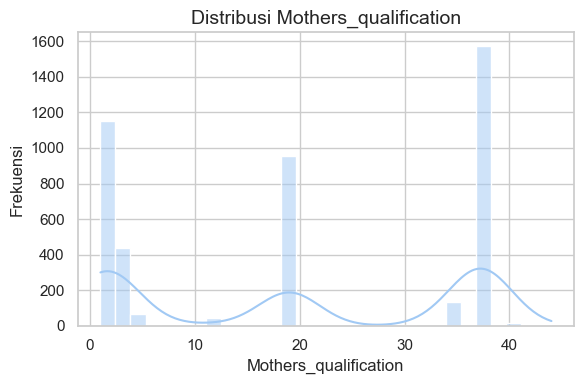

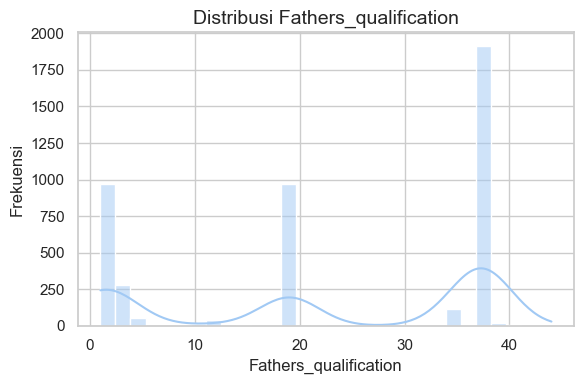

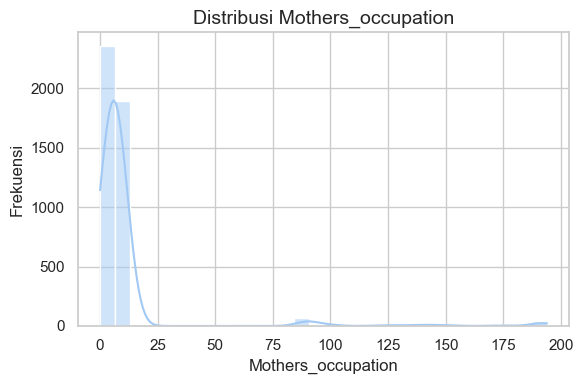

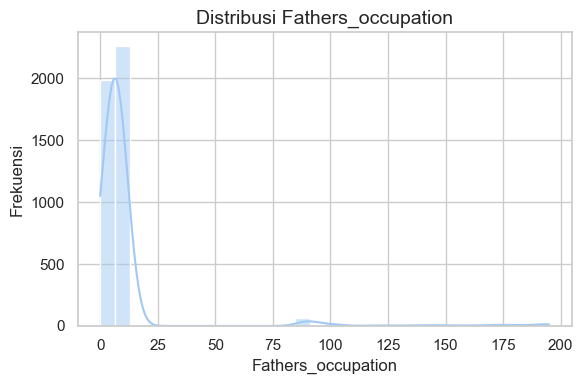

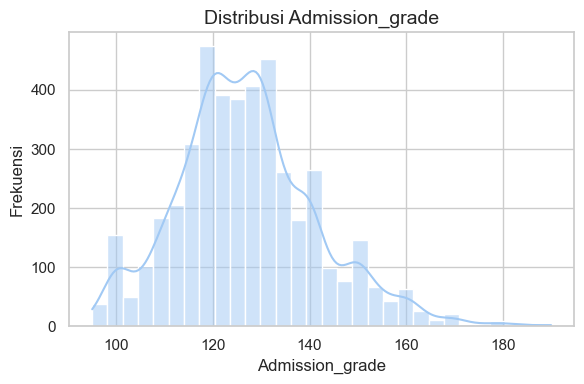

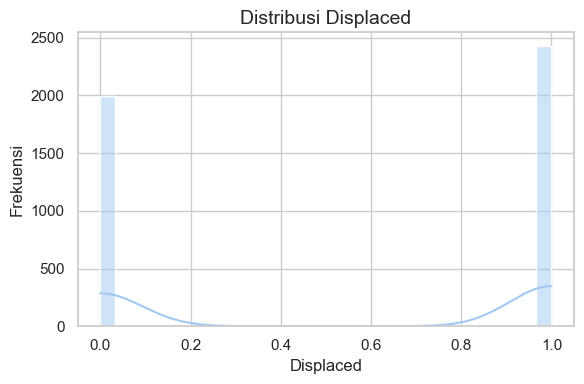

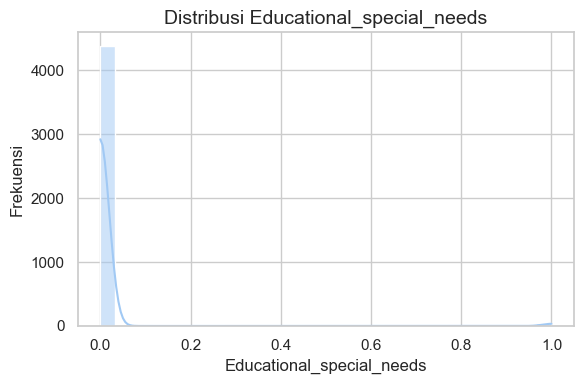

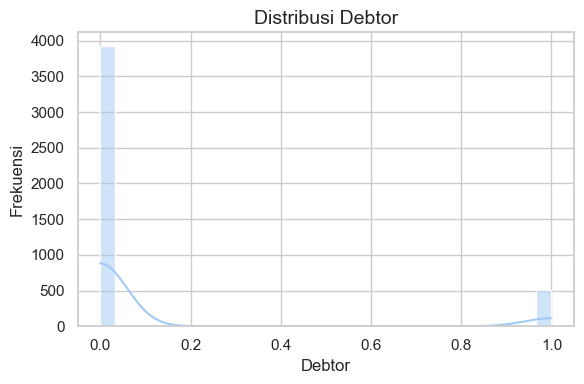

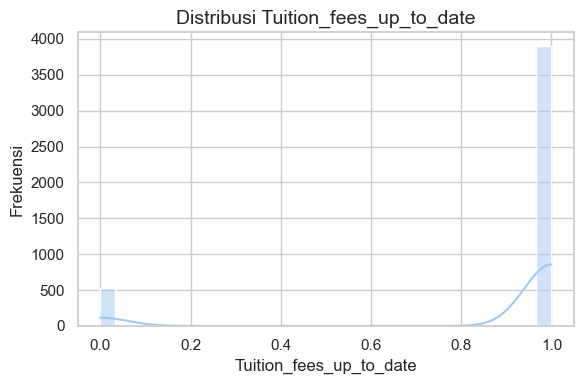

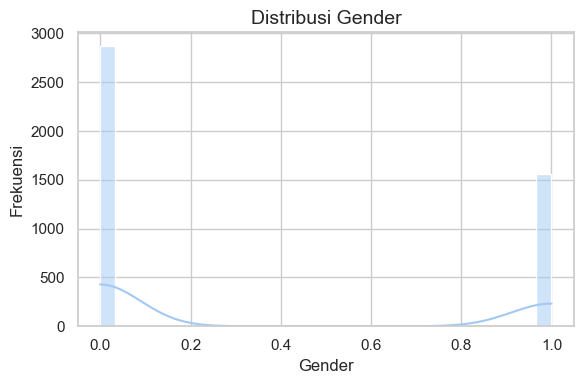

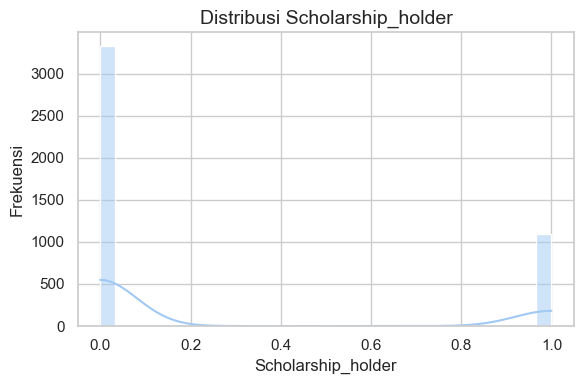

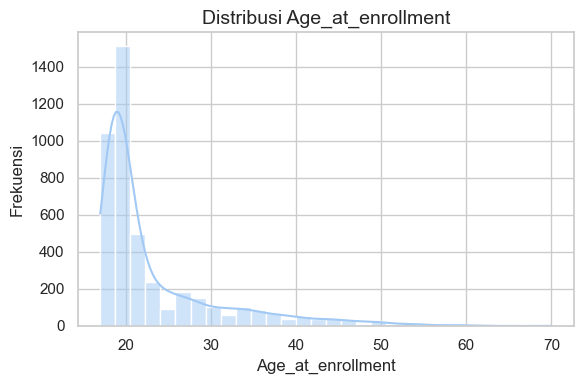

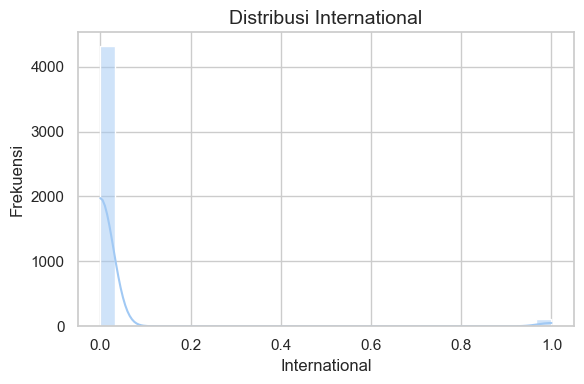

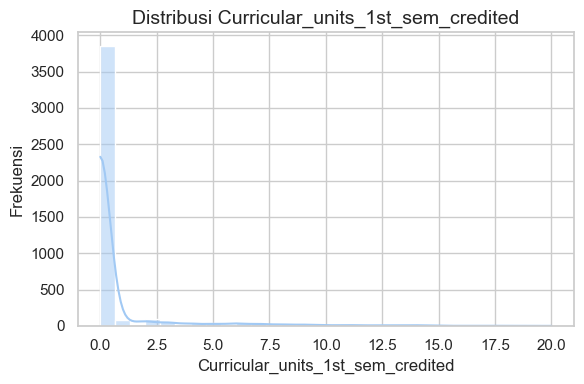

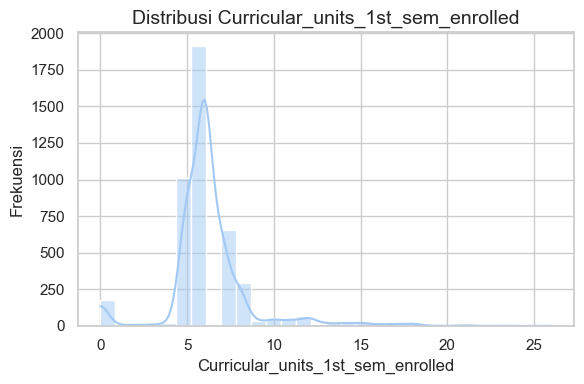

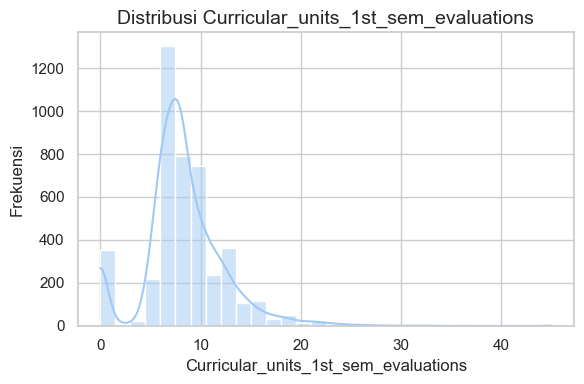

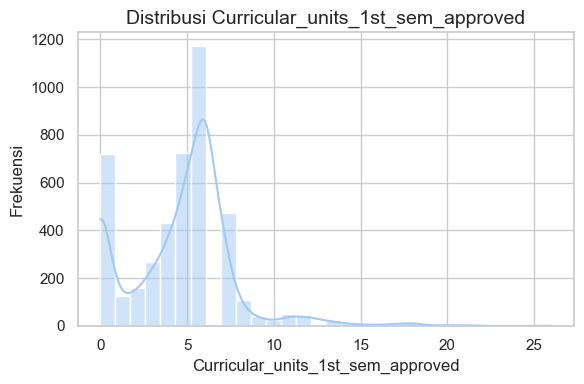

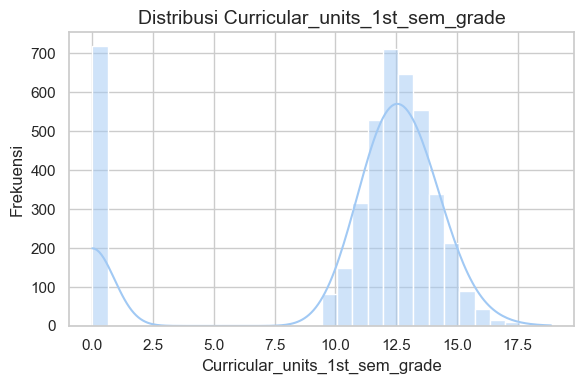

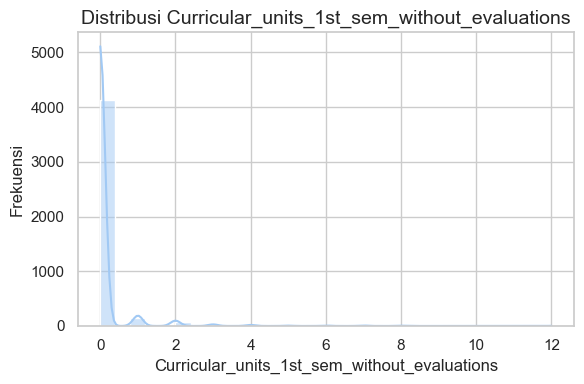

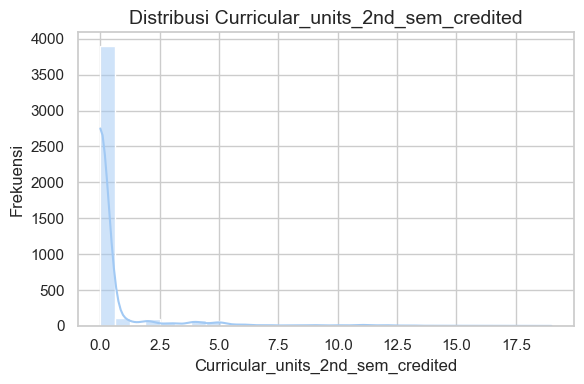

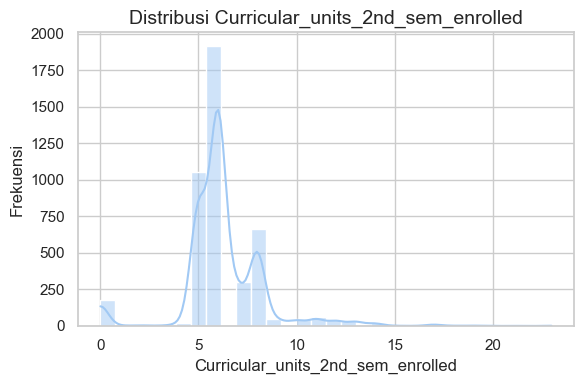

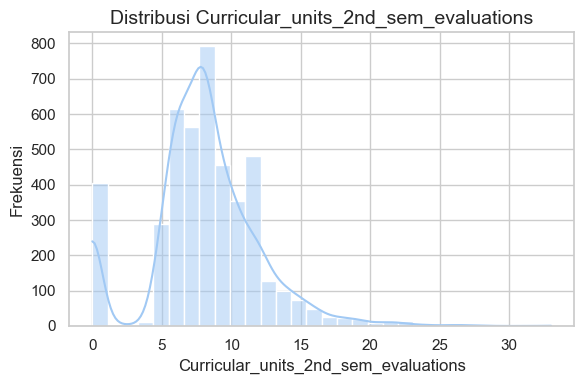

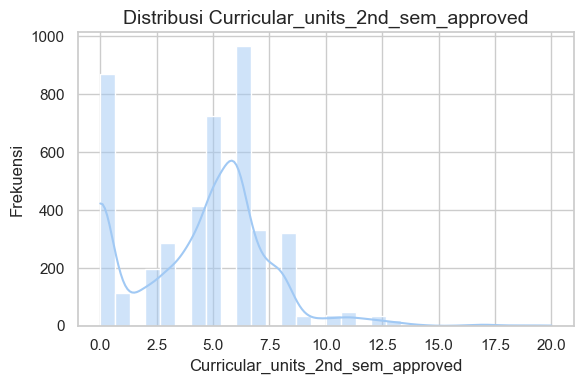

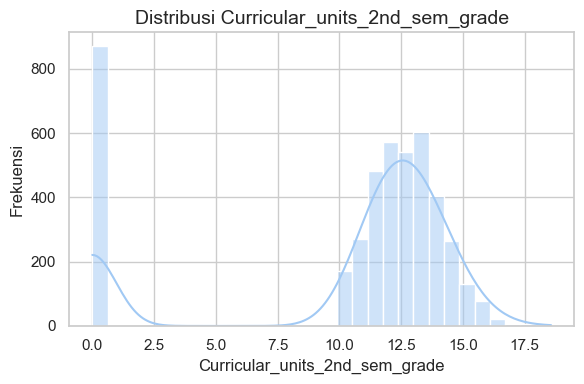

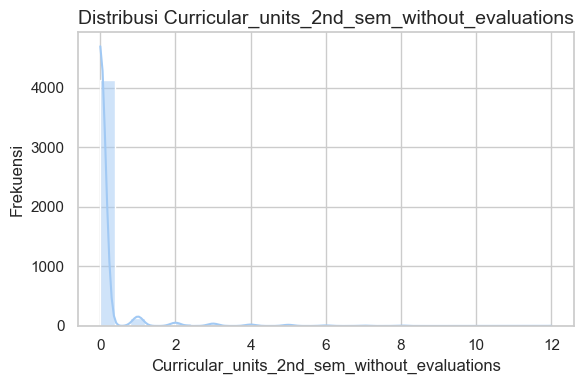

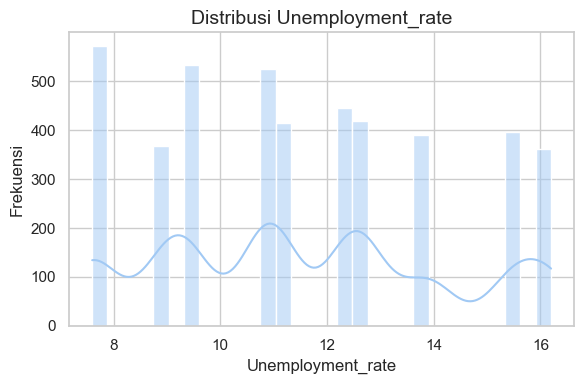

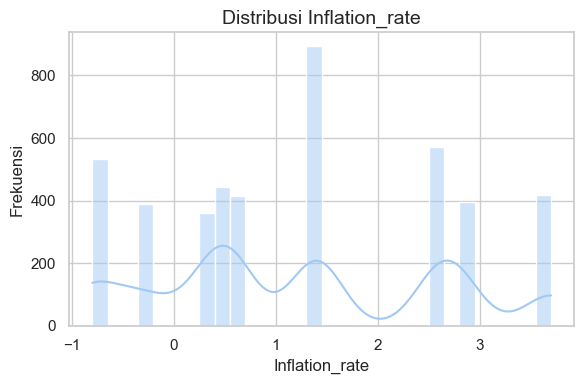

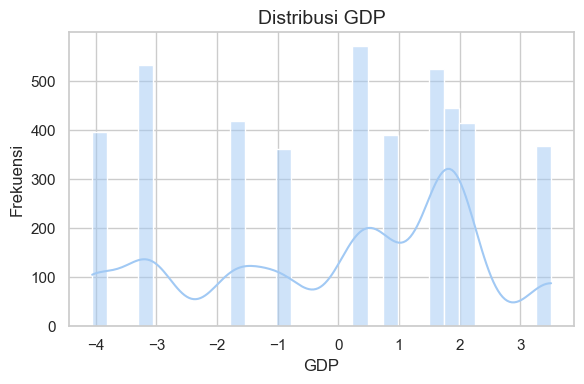

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

Penjelasan Singkat Seluruh Grafik Distribusi Data Numerik

1. Sebagian besar fitur numerik memiliki distribusi tidak merata (skewed) dan ditemukan beberapa outlier.
2. Fitur seperti Admission_grade, Curricular_units_1st_sem_grade, dan Curricular_units_2nd_sem_grade cenderung berdistribusi normal, namun tetap terdapat nilai ekstrim.
3. Fitur diskrit seperti Debtor, Scholarship_holde, dan Gender hanya memiliki dua nilai (0 dan 1), sehingga grafiknya berbentuk bar sederhana.
4. Variasi besar pada fitur seperti Age_at_enrollment, Unemployment_rate, dan GDP menunjukkan latar belakang mahasiswa yang beragam.
5. Outlier dan distribusi tidak merata pada beberapa fitur perlu diperhatikan saat preprocessing agar tidak memengaruhi hasil analisis dan model.

Visualisasi ini sangat membantu untuk memahami pola, mendeteksi potensi masalah, dan menentukan langkah preprocessing yang tepat sebelum analisis lebih lanjut.


In [76]:

def detect_outliers(df):
  outlier_indices = {}
  for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
    if outliers:
      outlier_indices[col] = outliers
  return outlier_indices

# Gunakan fungsi untuk mendeteksi outlier
outliers_dict = detect_outliers(df)

# Cetak hasil deteksi outlier
if outliers_dict:
  print("Outliers found:")
  for col, indices in outliers_dict.items():
    print(f"  Column '{col}': {len(indices)} outliers at indices {indices}")
else:
  print("No outliers found in numerical columns.")


Outliers found:
  Column 'Marital_status': 505 outliers at indices [4, 5, 38, 56, 65, 79, 84, 93, 94, 102, 103, 166, 221, 225, 226, 255, 277, 281, 282, 285, 295, 342, 347, 348, 353, 370, 371, 373, 374, 375, 380, 409, 428, 439, 455, 458, 511, 514, 515, 516, 518, 575, 578, 597, 611, 640, 647, 678, 683, 684, 685, 688, 689, 690, 691, 694, 696, 701, 703, 705, 706, 707, 708, 710, 712, 714, 717, 718, 725, 733, 734, 745, 753, 759, 762, 764, 768, 833, 834, 846, 853, 871, 895, 912, 913, 916, 917, 918, 919, 920, 924, 927, 932, 933, 939, 942, 948, 951, 966, 968, 971, 972, 973, 974, 977, 981, 983, 994, 1042, 1129, 1161, 1163, 1166, 1178, 1180, 1186, 1194, 1201, 1202, 1207, 1209, 1212, 1222, 1223, 1241, 1244, 1245, 1255, 1263, 1272, 1273, 1277, 1294, 1295, 1398, 1428, 1437, 1467, 1478, 1481, 1490, 1498, 1502, 1503, 1511, 1521, 1530, 1532, 1535, 1539, 1541, 1542, 1547, 1548, 1549, 1550, 1570, 1572, 1573, 1574, 1576, 1614, 1615, 1622, 1623, 1630, 1631, 1632, 1634, 1636, 1677, 1717, 1725, 1729, 1732, 1

Outlier adalah data yang memiliki nilai sangat jauh dari mayoritas data lain pada suatu fitur/kolom. Outlier dapat muncul karena kesalahan input, variasi alami, atau kondisi khusus.

Deteksi Outlier
Pada notebook ini, outlier dideteksi menggunakan metode IQR (Interquartile Range), yaitu data yang nilainya di bawah Q1 - 1.5*IQR atau di atas Q3 + 1.5*IQR pada setiap kolom numerik.

Dampak Outlier
Outlier dapat memengaruhi hasil analisis statistik, visualisasi, dan performa model machine learning, terutama pada model yang sensitif terhadap skala data.



In [77]:
# Pastikan daftar kolom numerik terdefinisi
num = df.select_dtypes(include=np.number).columns

# Menyimpan hasil outlier summary outlier
outlier = []

for col in num:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    outlier_mask = ~df[col].between(low, high)
    outlier.append({
        "Kolom": col,
        "Status Outlier": outlier_mask.any(),
        "Jumlah": outlier_mask.sum(),
        "Batas Bawah": low,
        "Batas Atas": high,


    })

# Menghitung jumlah total outlier dalam dataset
combined_outlier_mask = np.all([
    df[col].between(df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)),
                    df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))
    for col in num
], axis=0)

print(f'Jumlah total baris: {len(df)}')
print("Jumlah Outlier pada Seluruh Data :", (~combined_outlier_mask).sum())
print("Jumlah Data yang Bukan Outlier :", combined_outlier_mask.sum())

# Simpan hasil analisis dalam DataFrame
outlier_summary_df = pd.DataFrame(outlier)
print(outlier_summary_df)




Jumlah total baris: 4424
Jumlah Outlier pada Seluruh Data : 3519
Jumlah Data yang Bukan Outlier : 905
                                           Kolom  Status Outlier  Jumlah  \
0                                 Marital_status            True     505   
1                               Application_mode           False       0   
2                              Application_order            True     541   
3                                         Course            True     442   
4                     Daytime_evening_attendance            True     483   
5                         Previous_qualification            True     707   
6                   Previous_qualification_grade            True     179   
7                                    Nacionality            True     110   
8                          Mothers_qualification           False       0   
9                          Fathers_qualification           False       0   
10                            Mothers_occupation            Tr

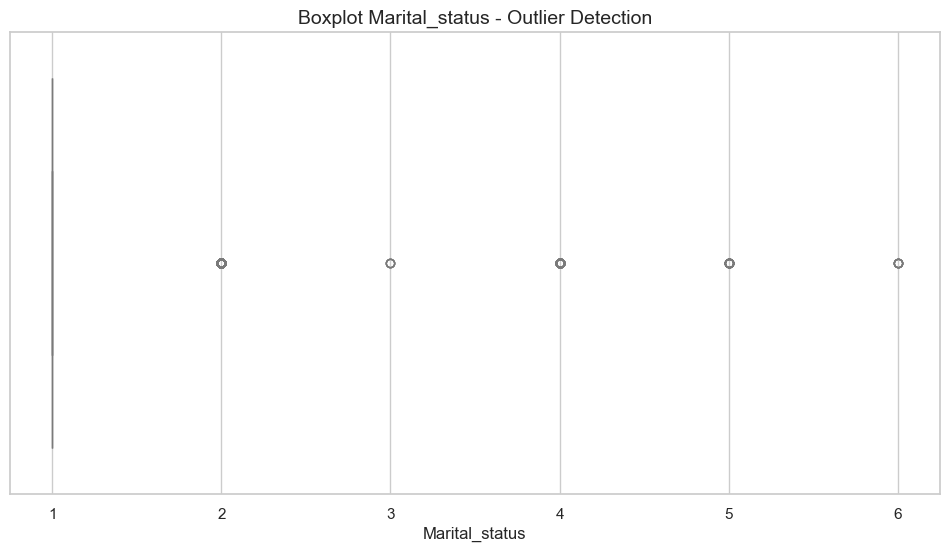

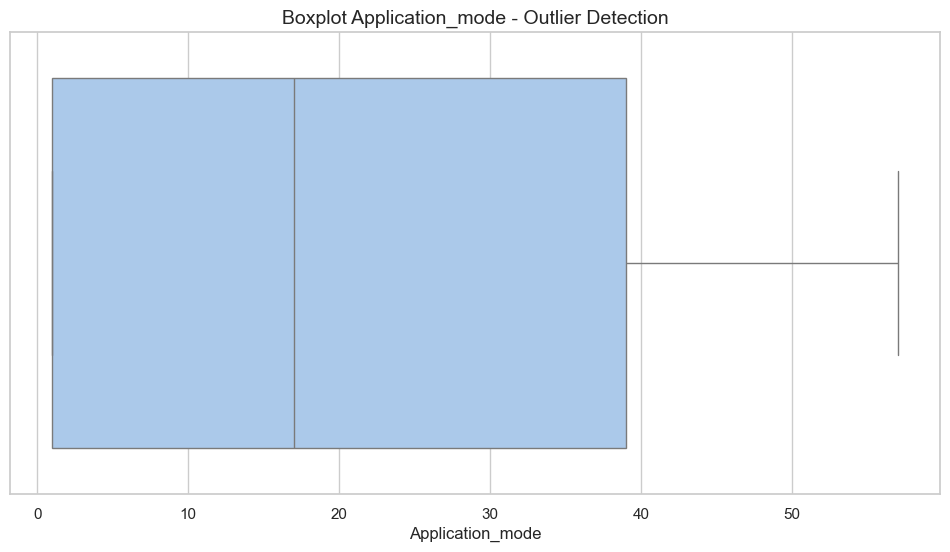

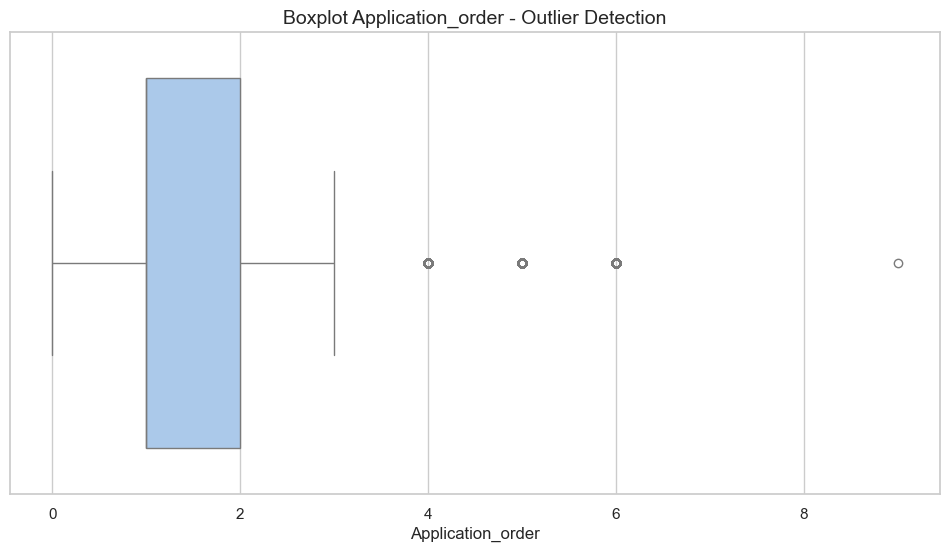

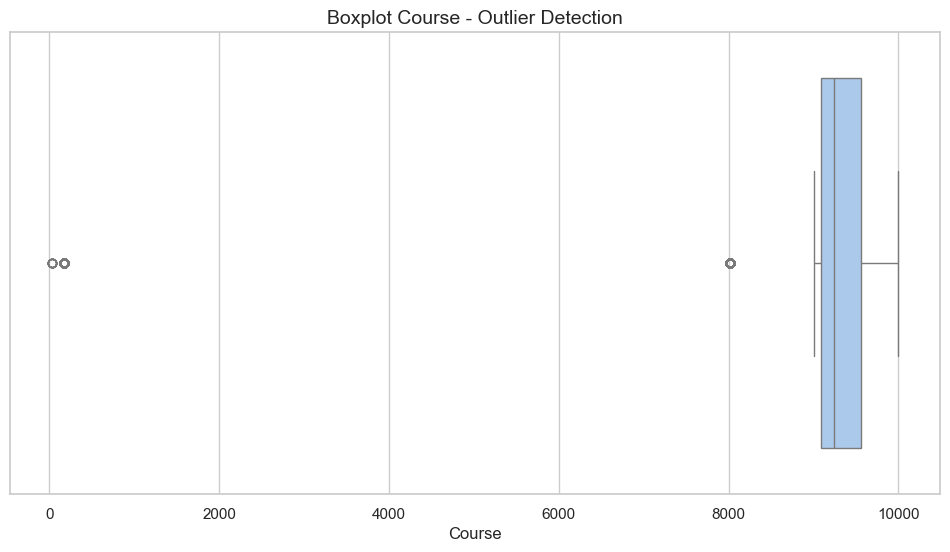

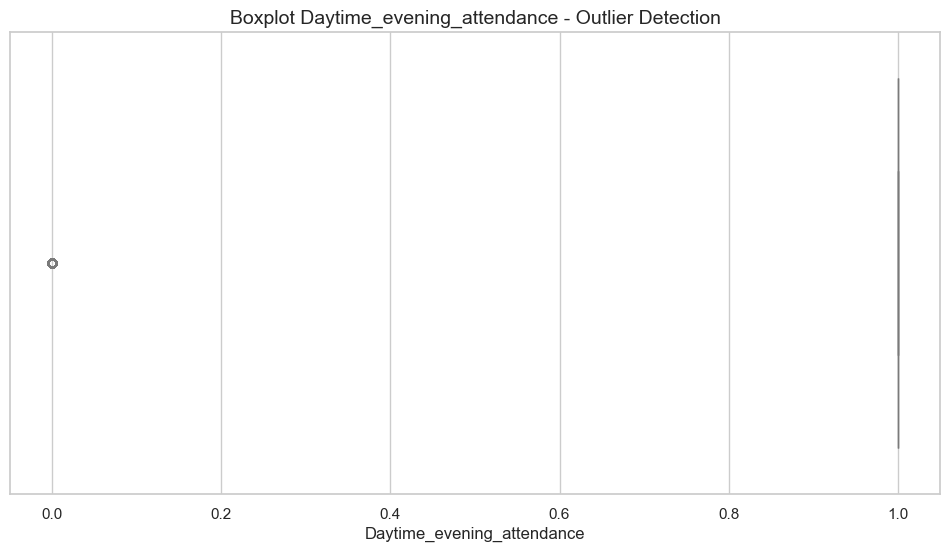

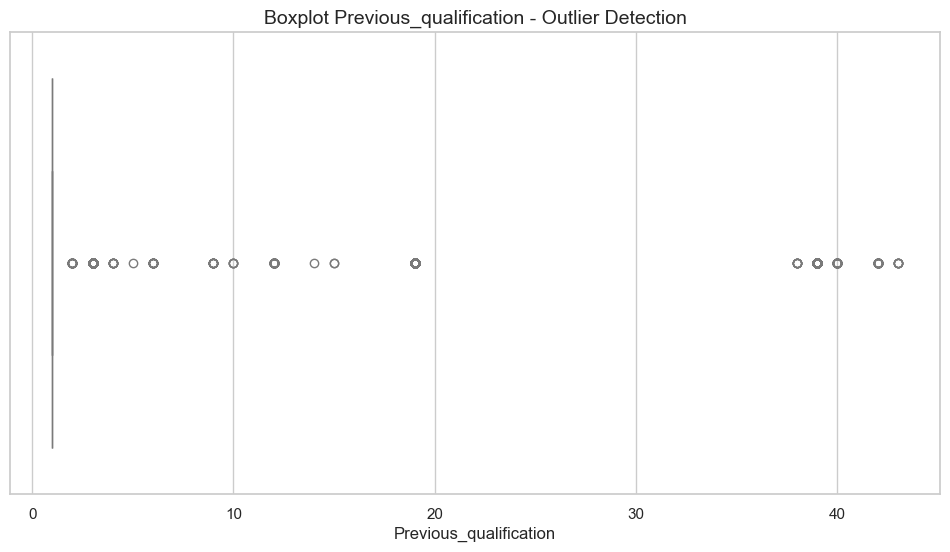

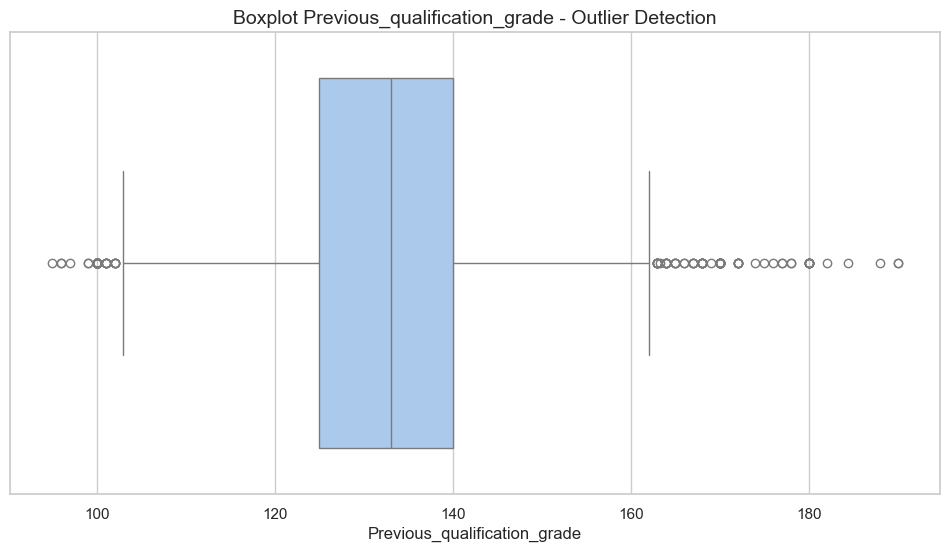

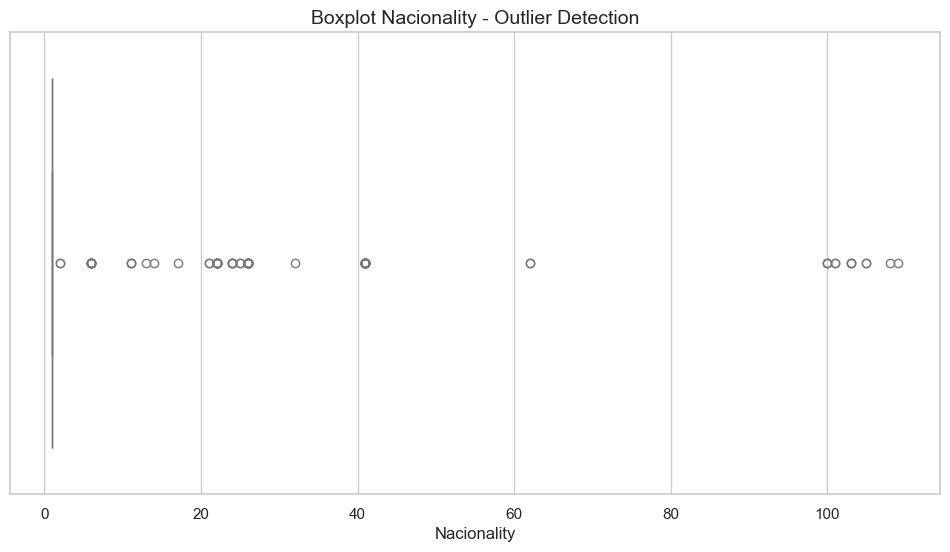

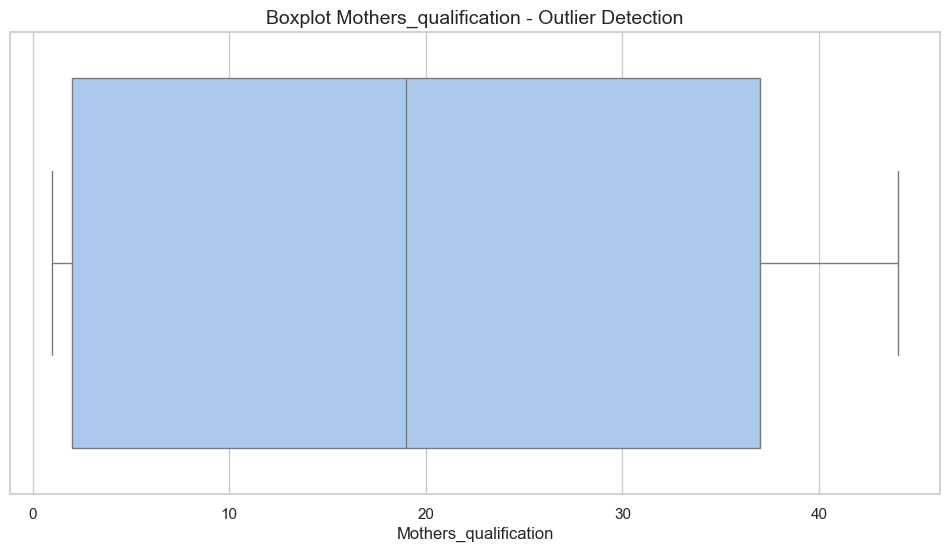

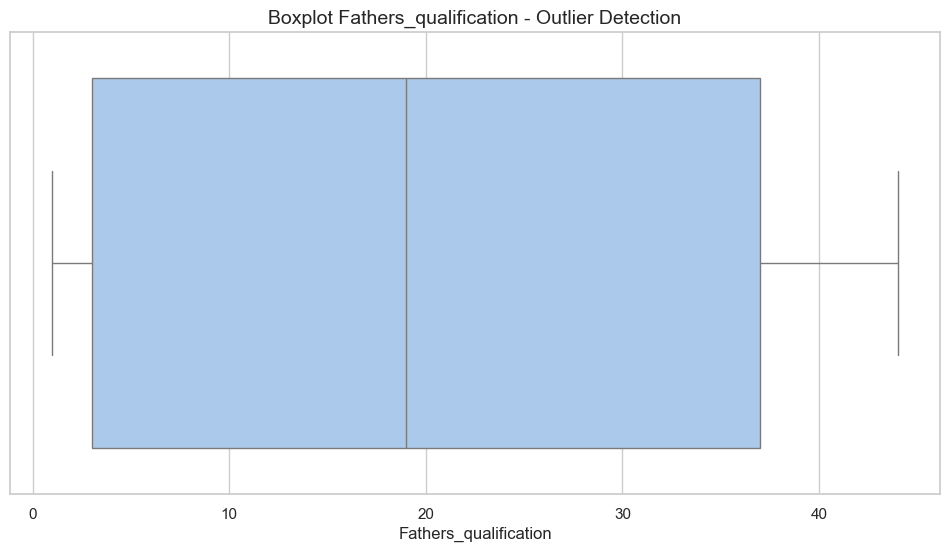

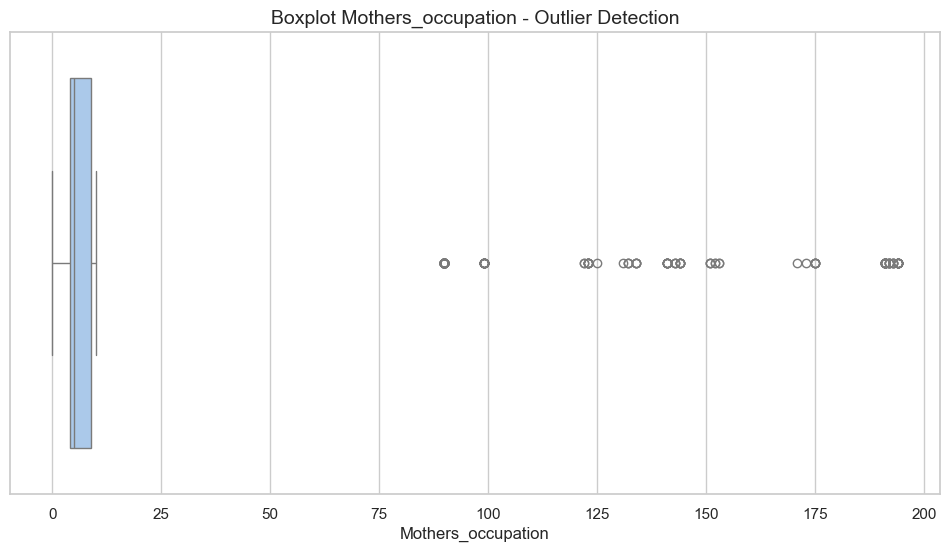

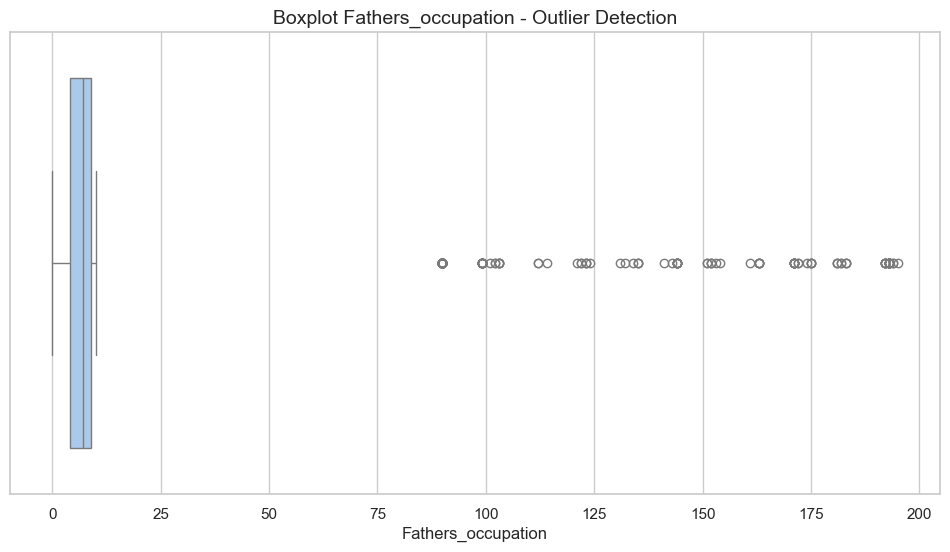

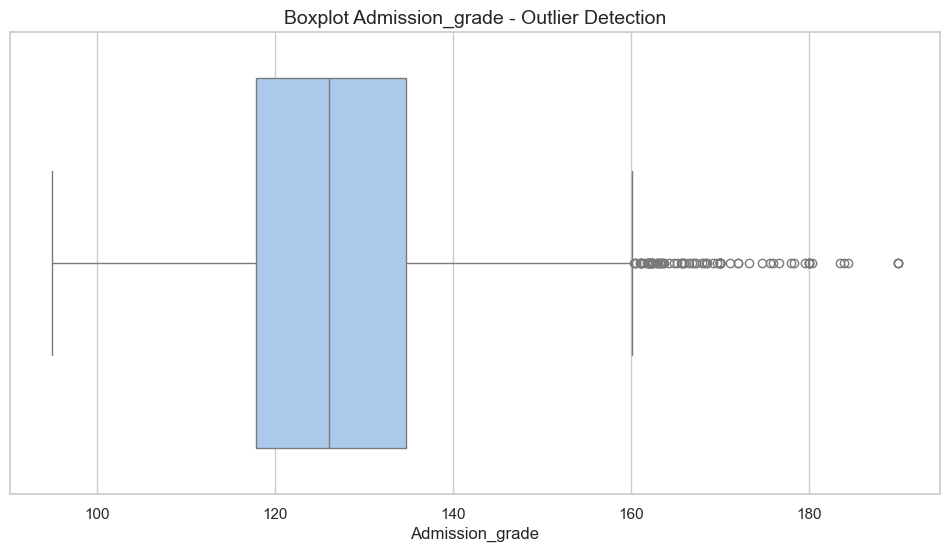

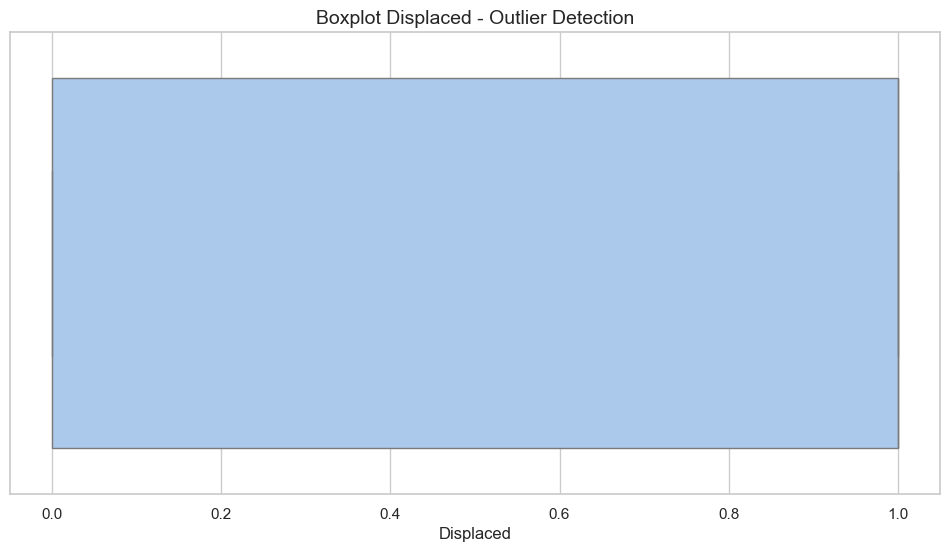

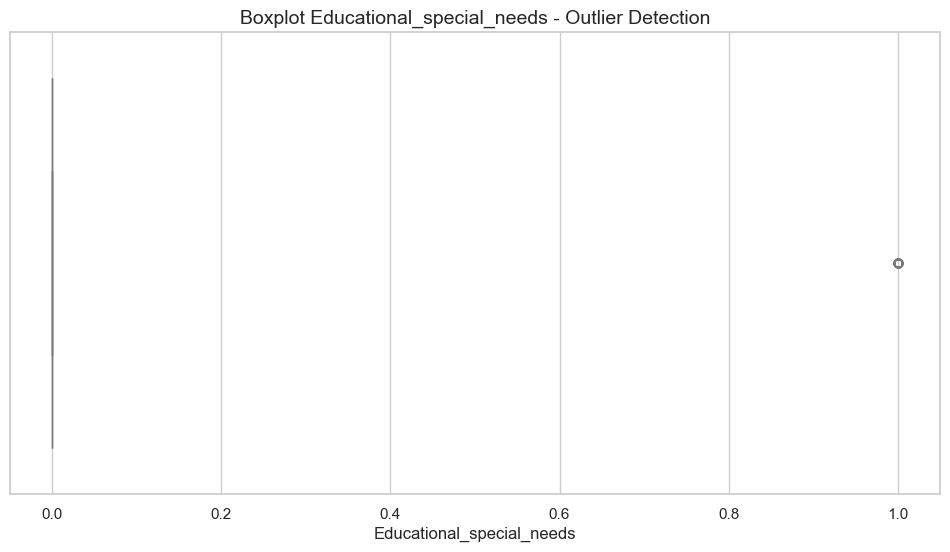

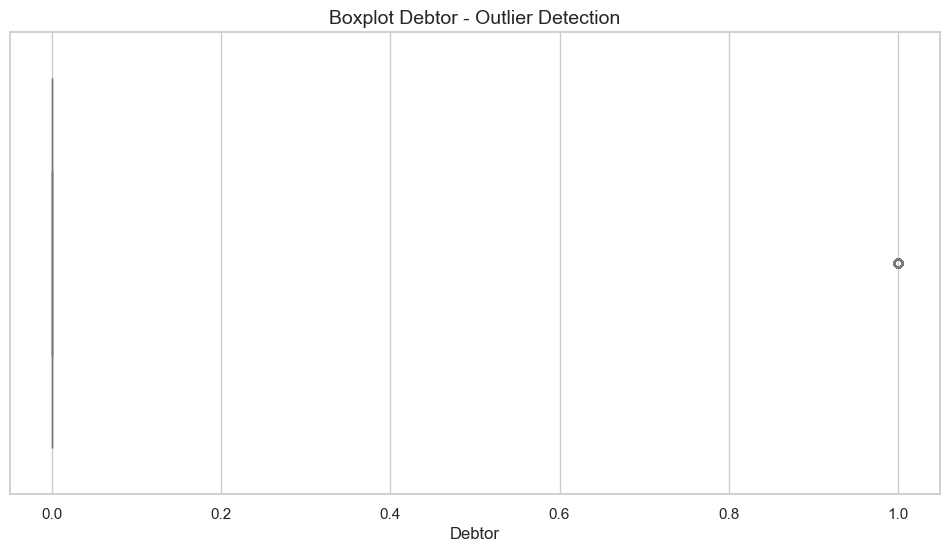

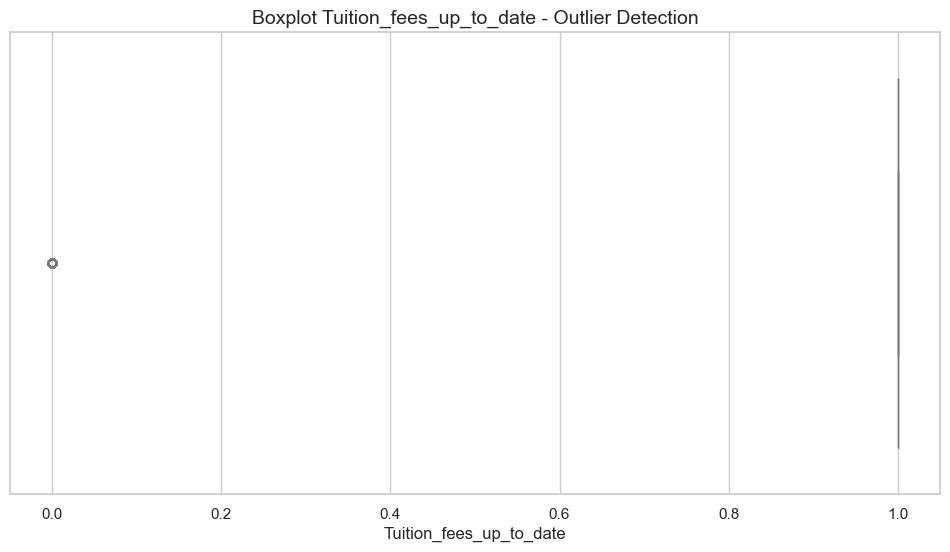

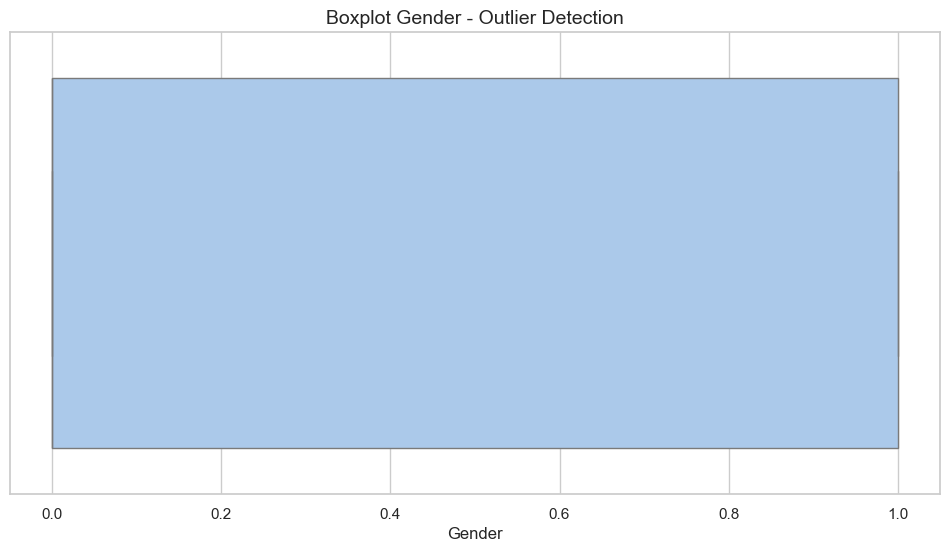

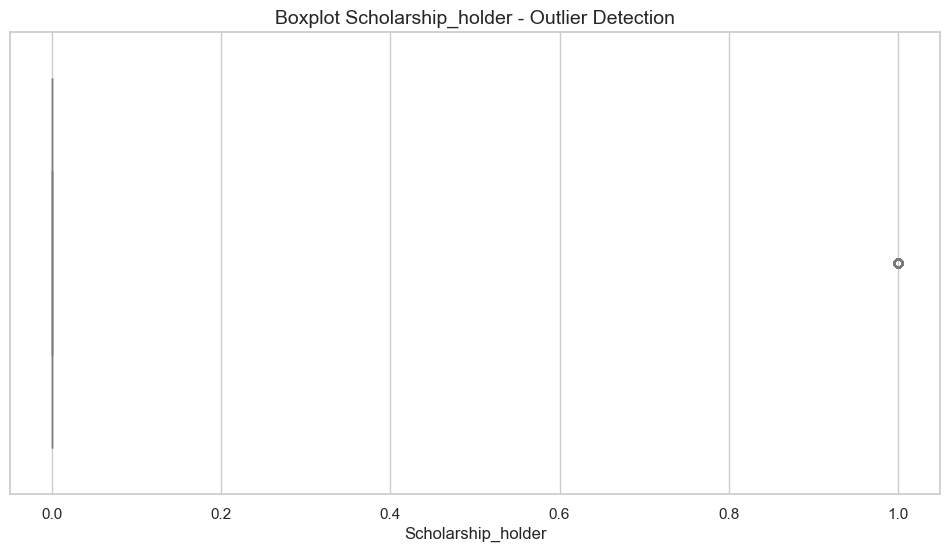

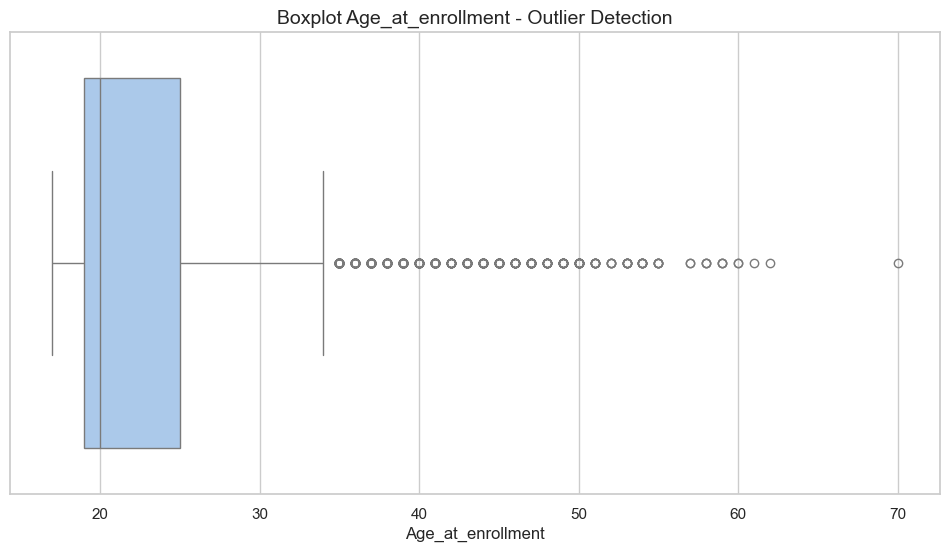

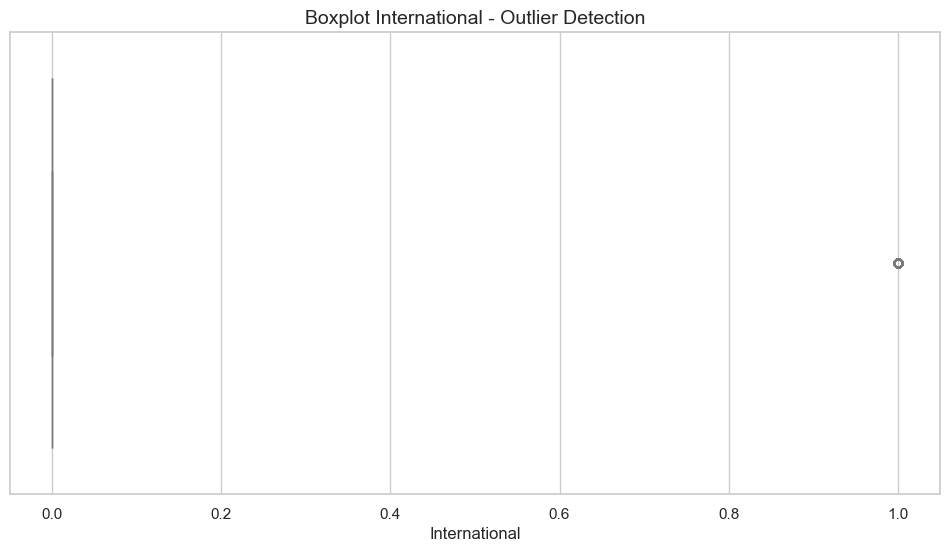

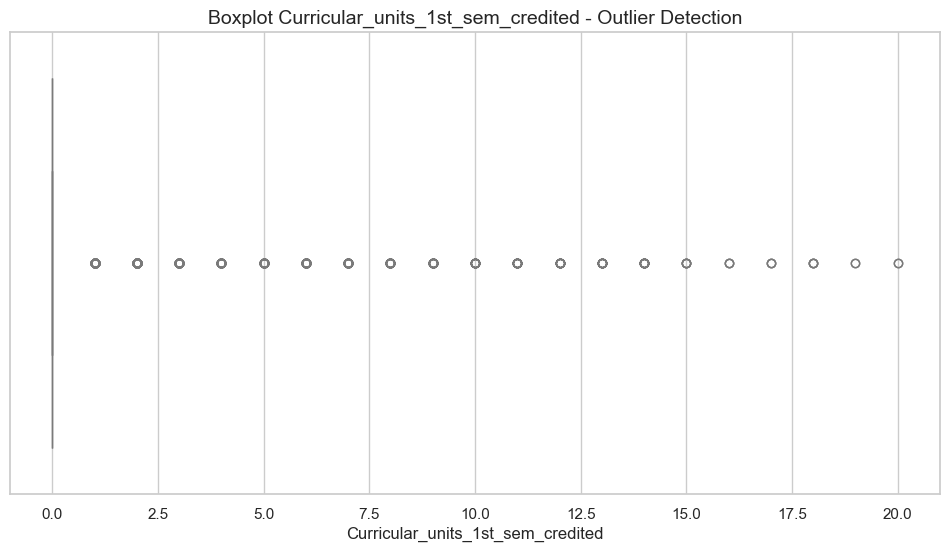

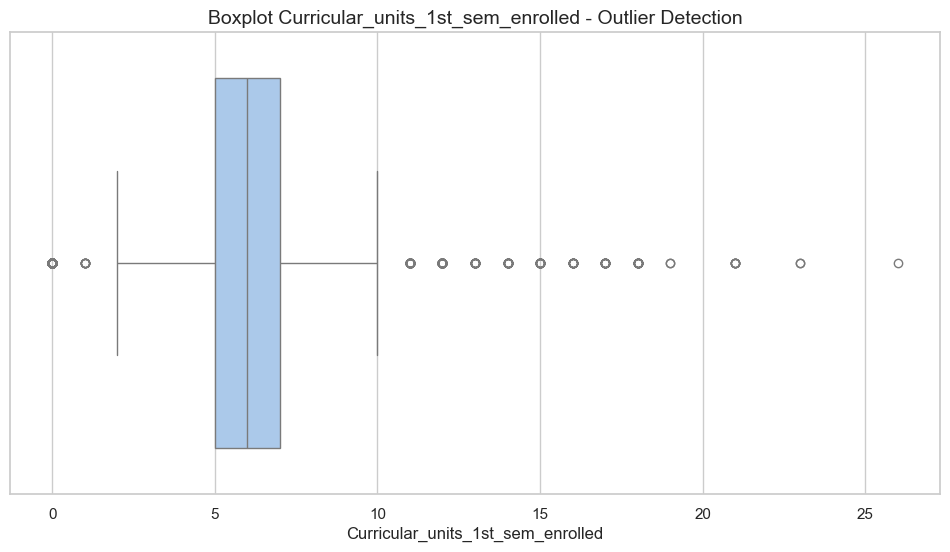

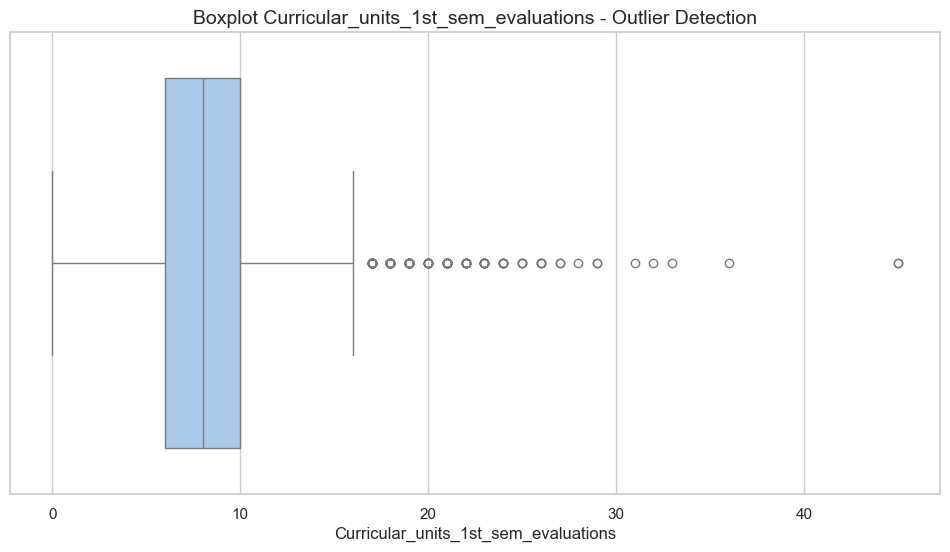

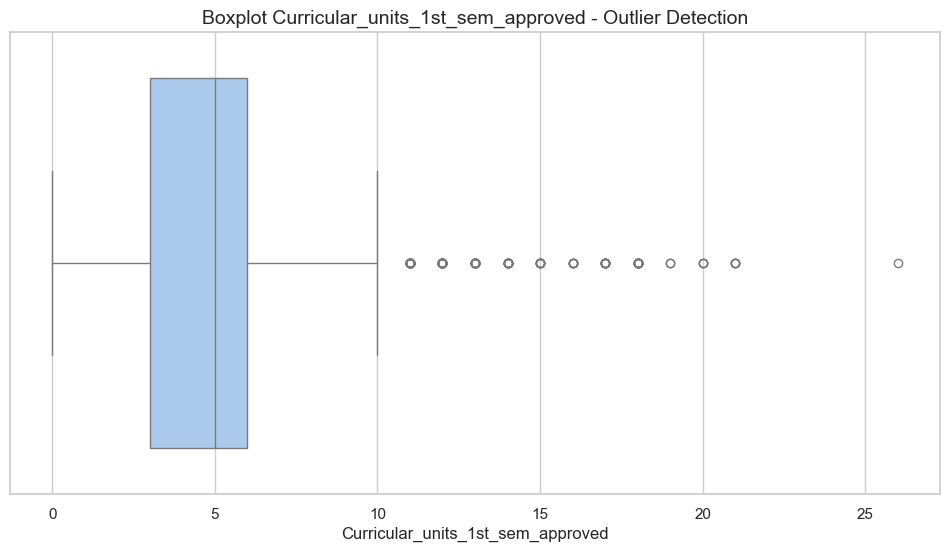

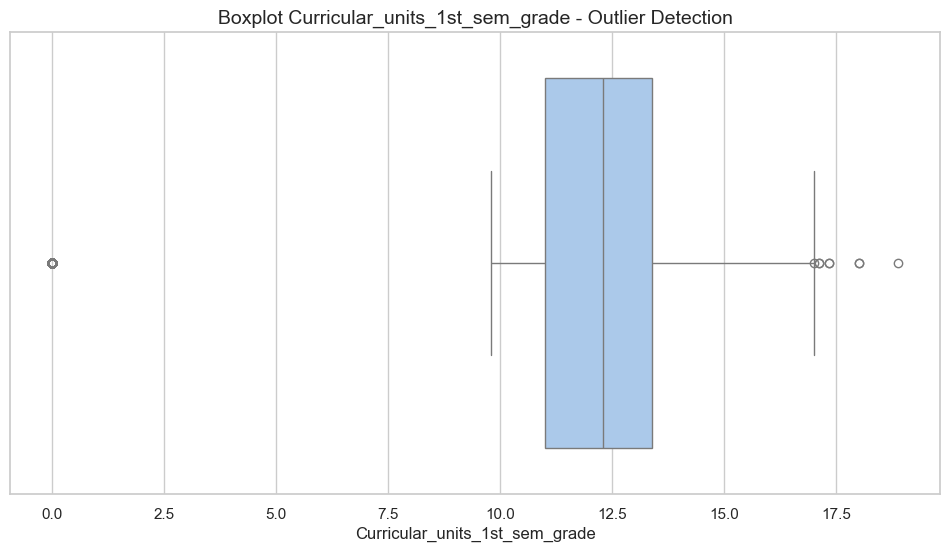

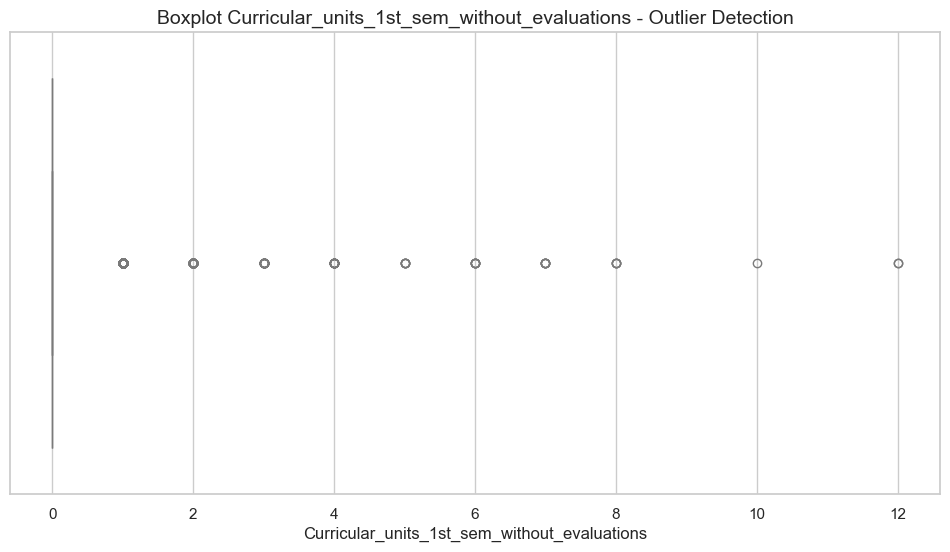

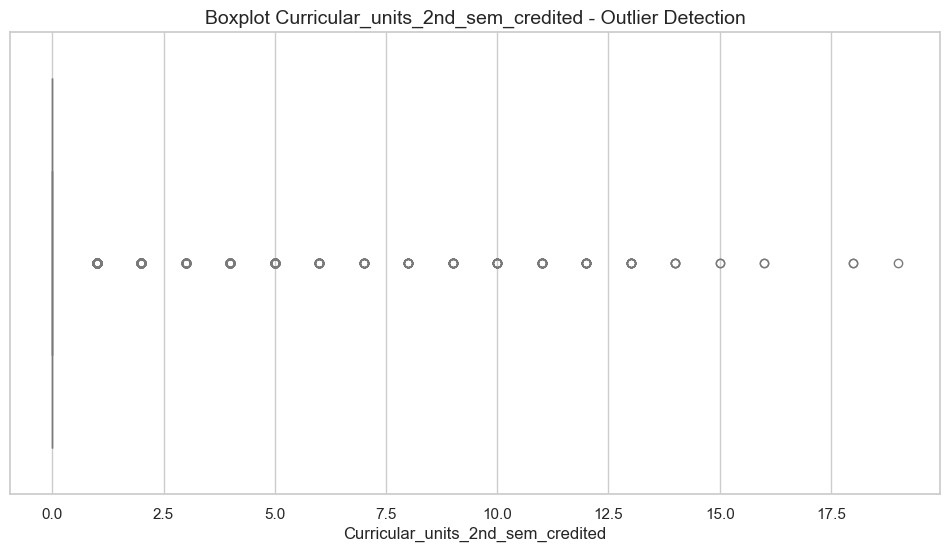

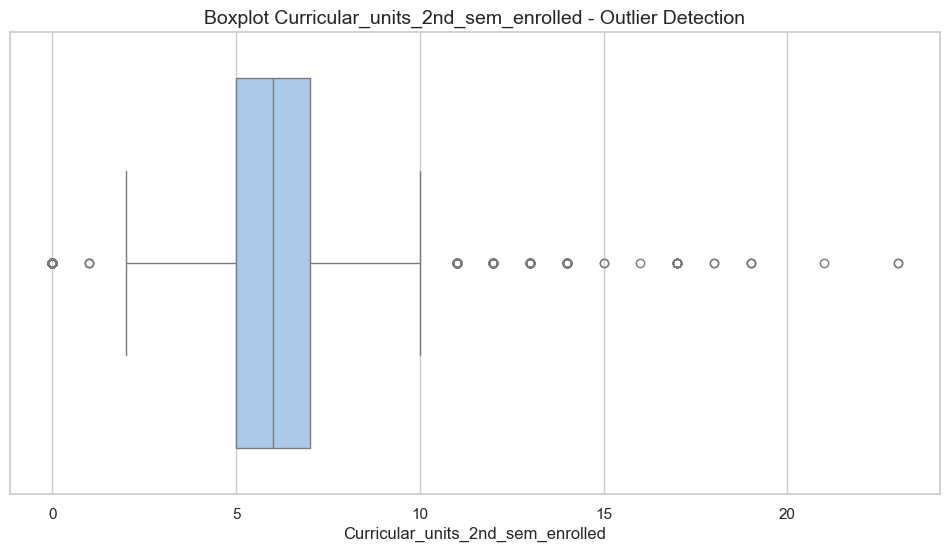

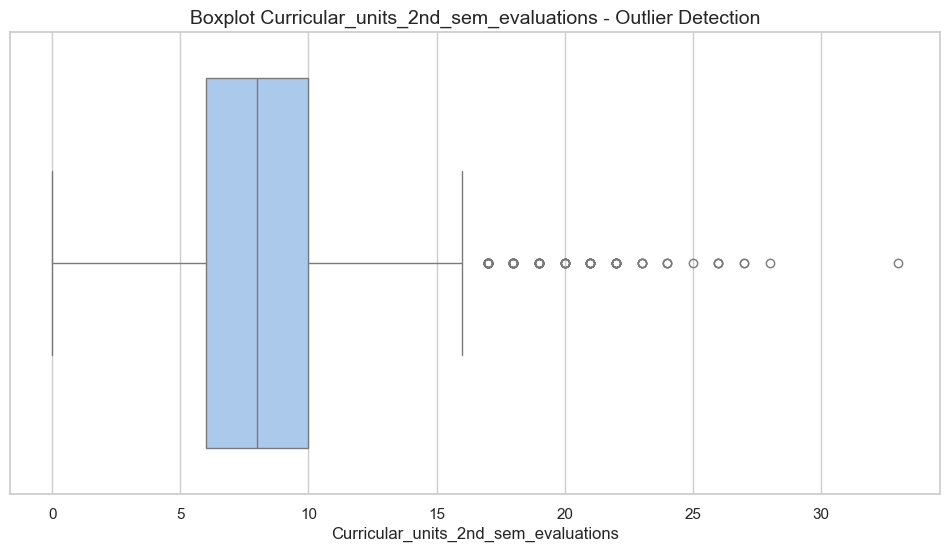

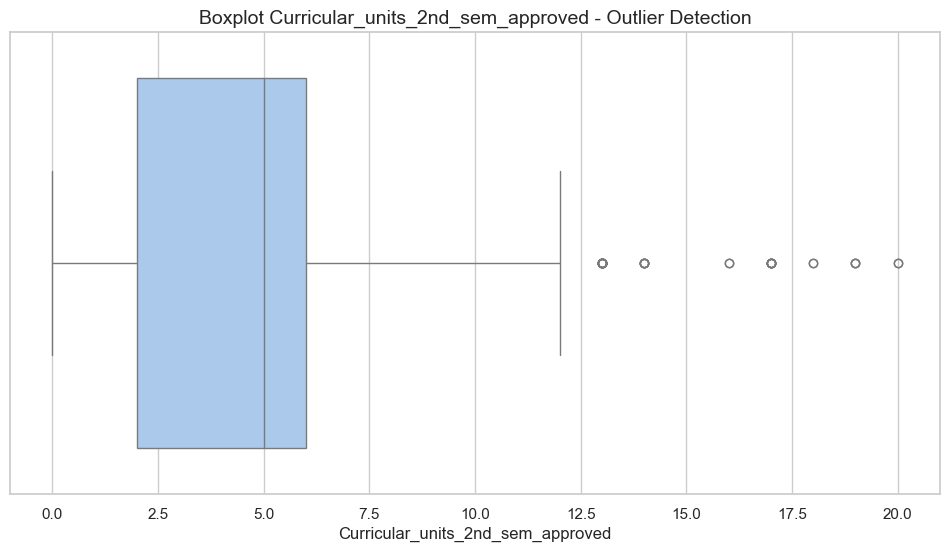

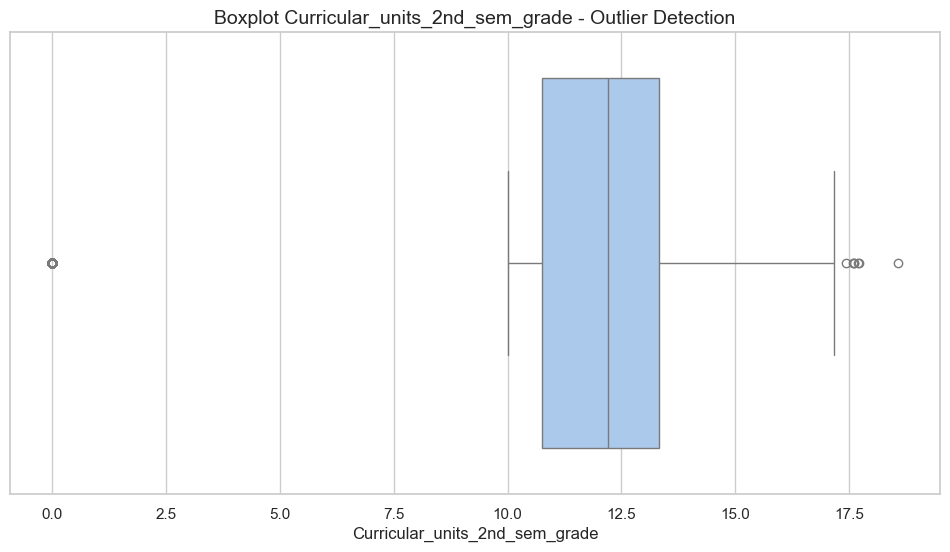

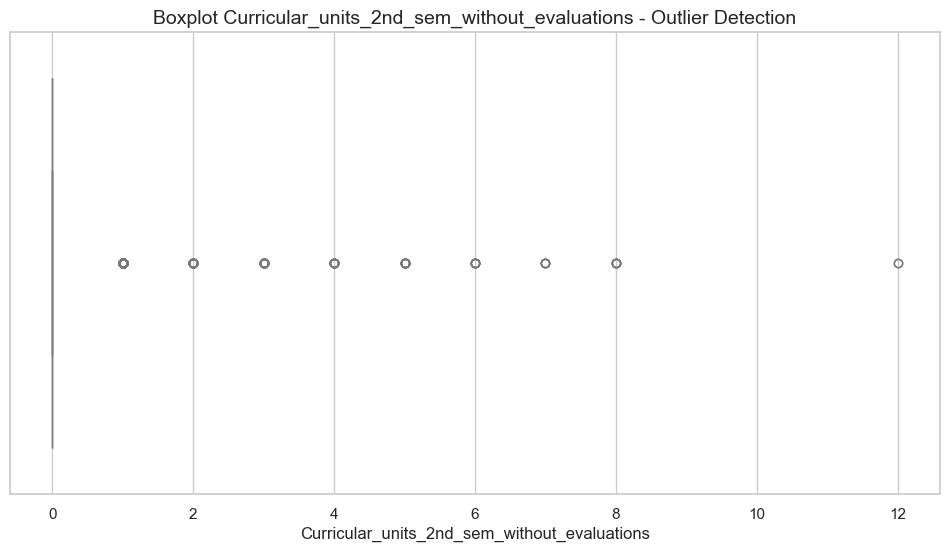

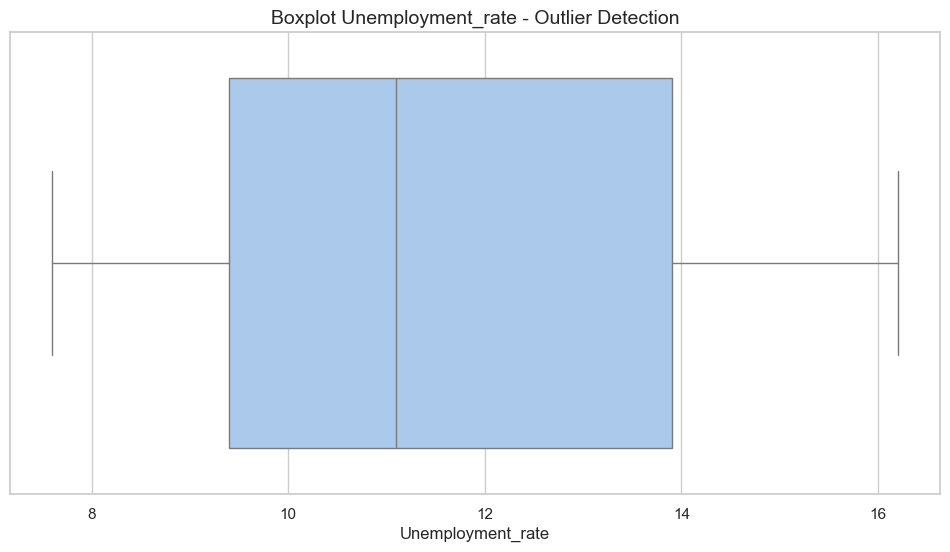

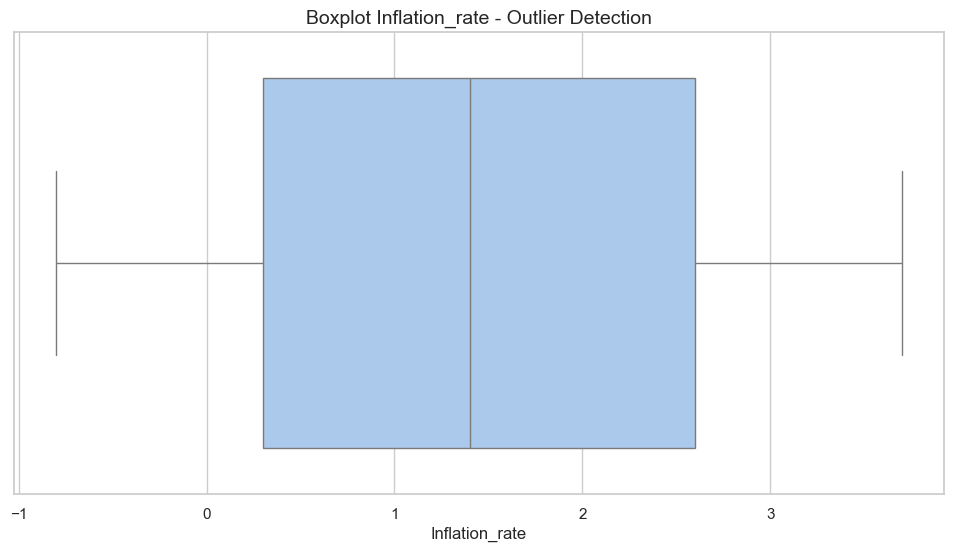

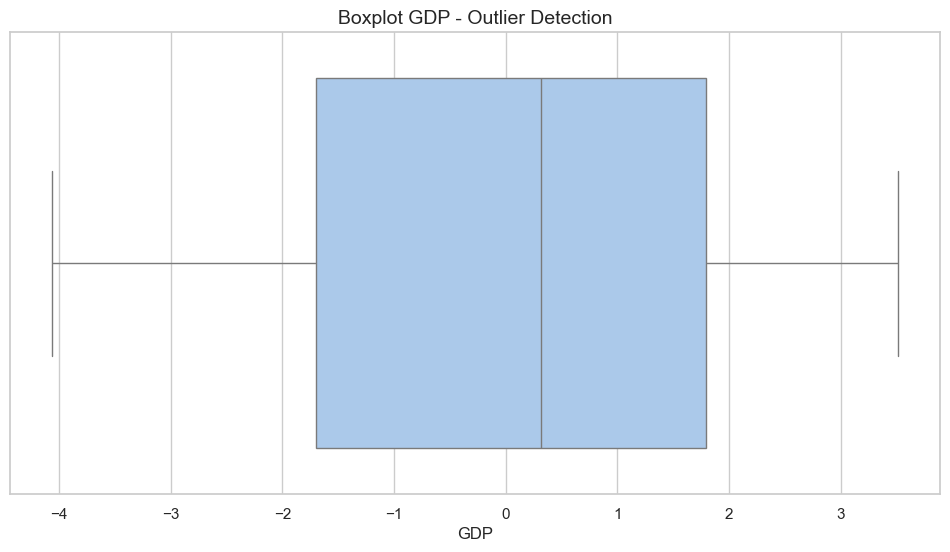

In [78]:
# Visualisasi distribusi data dengan Boxplot
for col in num:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot {col} - Outlier Detection')
        plt.show()

Insight: 

Tahap data understanding bertujuan untuk memahami karakteristik, struktur, kualitas, dan pola dalam dataset sebelum dilakukan analisis lebih lanjut. Berikut adalah rangkuman proses dan hasil data understanding yang telah dilakukan:

1. Pemeriksaan Struktur Data
Metode: df.info(), df.describe(include="all"), df.head()
Hasil: Dataset terdiri dari 4.424 baris dan 37 kolom, mencakup data demografi, akademik, ekonomi, dan status mahasiswa. Semua kolom terisi penuh (tidak ada missing values).

2. Pengecekan Duplikasi
Metode: df.duplicated().sum()
Hasil: Tidak ditemukan baris duplikat pada dataset.

3. Analisis Distribusi Target
Metode: df.Status.value_counts()
Hasil: Kolom target Status terdiri dari tiga kategori: Graduate (lulus), Dropout (mengundurkan diri), dan Enrolled (masih terdaftar). Sekitar 32 persen mahasiswa mengalami dropout, menjadi fokus utama analisis.

4. Pengecekan Missing Values
Metode: df.isna().sum()
Hasil: Tidak ada missing values di seluruh kolom, sehingga data siap untuk analisis tanpa perlu imputasi.

5. Visualisasi Distribusi Data Numerik
Metode: Histogram menggunakan seaborn/matplotlib untuk setiap kolom numerik.
Hasil: Sebagian besar fitur numerik memiliki distribusi tidak merata (skewed) dan ditemukan beberapa outlier. Fitur diskrit seperti Debtor, Scholarship_holder, dan Gender hanya memiliki dua nilai (0 dan 1).

6. Deteksi Outlier
Metode: Metode IQR (Interquartile Range) pada setiap fitur numerik.
Hasil: Outlier terdeteksi pada beberapa fitur numerik. Outlier dapat memengaruhi hasil analisis dan performa model sehingga perlu penanganan pada tahap preprocessing.

7. Visualisasi Outlier
Metode: Boxplot untuk setiap fitur numerik.
Hasil: Boxplot memperjelas keberadaan outlier pada fitur-fitur tertentu, terutama pada nilai ekstrim.

8. Insight Awal
Struktur data lengkap dan tidak ada data hilang.
Distribusi status mahasiswa tidak seimbang, dropout cukup tinggi (32 persen), penting untuk penyeimbangan kelas saat modeling.
Fitur akademik semester awal seperti jumlah mata kuliah, nilai, dan evaluasi sangat menentukan risiko dropout.
Faktor ekonomi seperti GDP, Unemployment_rate, Inflation_rate, serta keuangan individu seperti Tuition_fees_up_to_date dan Debtor juga relevan.
Outlier dan distribusi tidak merata perlu diperhatikan pada tahap preprocessing.

Kesimpulan
Tahap data understanding telah memastikan data bersih, lengkap, dan siap dianalisis. Insight awal menunjukkan bahwa faktor akademik, keuangan, dan demografi sangat berpengaruh terhadap status mahasiswa, khususnya risiko dropout. Temuan ini menjadi dasar untuk proses data preparation dan pemodelan selanjutnya.



## Data Preparation / Preprocessing

Apa itu Data Preparation?
Data preparation (persiapan data) adalah proses mengubah data mentah menjadi format yang bersih, terstruktur, dan siap digunakan untuk analisis atau pemodelan machine learning. Tahapan ini meliputi pembersihan data, penanganan missing values, transformasi fitur, encoding variabel kategorikal, normalisasi, deteksi dan penanganan outlier, serta pembagian data untuk training dan testing.

Mengapa Data Preparation Diperlukan?
- Untuk Meningkatkan kualitas data, data mentah sering mengandung error, duplikasi, missing values, atau format yang tidak konsisten. Data preparation memastikan data yang digunakan berkualitas tinggi.
- Untuk meningkatkan akurasi Model, model machine learning sangat bergantung pada kualitas input. Data yang bersih dan terstruktur meningkatkan akurasi dan generalisasi model.
- MEningkatkan efisiensi analisis, data yang sudah dipersiapkan dengan baik mempercepat proses analisis dan meminimalkan error saat pemodelan.
- Proses preparation yang terdokumentasi membuat pipeline analisis dapat diulang dan divalidasi.

Proses Data Preparation di Notebook Saya Ini
Berikut tahapan data preparation yang dilakukan pada proyek ini:

1. Pembersihan Data
    - Menghapus duplikasi dan memastikan tidak ada missing values pada dataset.
    - Membersihkan dan melakukan mapping pada kolom kategorikal seperti Marital_status, Application_mode, dan Course agar lebih informatif dan konsisten.

2. Transformasi Fitur
    - Melakukan encoding pada variabel kategorikal (mapping label dan one-hot encoding) agar dapat digunakan oleh algoritma machine learning.
    - Menyederhanakan beberapa fitur menjadi kategori yang lebih ringkas (misal: pengelompokan status pernikahan, jurusan, kelompok usia).

3. Deteksi dan Penanganan Outlier
    - Menggunakan metode IQR untuk mendeteksi outlier pada fitur numerik.
    - Menangani outlier dengan menghapus atau membatasi nilai ekstrim agar tidak memengaruhi hasil analisis/model.

4. Normalisasi/Standardisasi
    - Melakukan scaling pada fitur numerik menggunakan StandardScaler agar semua fitur berada pada skala yang sama.

5. Penyeimbangan Kelas
    - Menggunakan teknik SMOTE untuk menyeimbangkan distribusi kelas target (Dropout vs Non-Dropout), sehingga model tidak bias terhadap kelas mayoritas.

6. Pembagian Data
    - Membagi data menjadi training dan testing set dengan stratifikasi agar proporsi kelas tetap seimbang.

7. Penyimpanan Dataset Bersih
    - Menyimpan dataset hasil cleaning dan labeling ke file baru agar dapat digunakan ulang untuk analisis dan pemodelan.


Data preparation adalah fondasi utama dalam pipeline analisis data dan machine learning. Proses yang sistematis dan menyeluruh seperti di notebook ini memastikan data siap digunakan, meningkatkan akurasi model, dan menghasilkan insight yang valid serta actionable.

### Data Cleaning

In [79]:
import pandas as pd

# Load dataset dari file CSV
df = pd.read_csv("data.csv", sep=';')

# Mapping label kategorikal
marital_status_map = {
    "1": "single", "2": "married", "3": "widower",
    "4": "divorced", "5": "facto_union", "6": "separated"
}

application_mode_map = {
    "1": "1st_phase_general", "2": "ord_612_93", "5": "azores_special",
    "7": "other_higher_course", "10": "ord_854_B_99", "15": "int_student_bach",
    "16": "madeira_special", "17": "2nd_phase_general", "18": "3rd_phase_general",
    "26": "ord_533_A_99_b2", "27": "ord_533_A_99_b3", "39": "over_23",
    "42": "transfer", "43": "course_change", "44": "tech_diploma",
    "51": "change_institution_course", "53": "short_cycle_diploma", "57": "int_institution_change"
}

course_map = {
    "33": "biofuel_tech", "171": "anim_multimedia", "8014": "social_service_evening",
    "9003": "agronomy", "9070": "comm_design", "9085": "vet_nursing",
    "9119": "informatics_eng", "9130": "equinculture", "9147": "management",
    "9238": "social_service", "9254": "tourism", "9500": "nursing",
    "9556": "oral_hygiene", "9670": "marketing_mgmt", "9773": "journalism",
    "9853": "basic_education", "9991": "management_evening"
}

# Kolom kategorikal yang akan dibersihkan
categorical_maps = {
    'Marital_status': marital_status_map,
    'Application_mode': application_mode_map,
    'Course': course_map
}

# Bersihkan dan mapping
for col, mapping in categorical_maps.items():
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].map(mapping).fillna(df[col])

# Tampilkan nilai unik setelah pembersihan
for col in categorical_maps:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'Marital_status':
['single' 'married' 'divorced' 'widower' 'facto_union' 'separated']

Unique values in 'Application_mode':
['2nd_phase_general' 'int_student_bach' '1st_phase_general' 'over_23'
 '3rd_phase_general' 'short_cycle_diploma' 'tech_diploma'
 'change_institution_course' 'course_change' 'other_higher_course'
 'transfer' 'madeira_special' 'azores_special' 'ord_612_93' 'ord_854_B_99'
 'int_institution_change' 'ord_533_A_99_b2' 'ord_533_A_99_b3']

Unique values in 'Course':
['anim_multimedia' 'tourism' 'comm_design' 'journalism'
 'social_service_evening' 'management_evening' 'nursing' 'social_service'
 'marketing_mgmt' 'basic_education' 'vet_nursing' 'equinculture'
 'oral_hygiene' 'management' 'agronomy' 'biofuel_tech' 'informatics_eng']


Penjelasan mapping (pemetaan) categorical pada kode data cleaning di atas:

1. marital_status_map
    - Mapping kode angka pada kolom marital_status menjadi label status pernikahan yang lebih informatif.
    - Contoh:  
      - "1" = "single"  
      - "2" = "married"  
      - "3" = "widower"  
      - "4" = "divorced"  
      - "5" = "facto_union"  
      - "6" = "separated"  
    - Tujuan: Memudahkan analisis dan interpretasi status pernikahan mahasiswa.

2. application_mode_map
    - Mapping kode angka pada kolom Application_mode menjadi label mode pendaftaran mahasiswa.
    - Contoh:  
      - "1" = "1st_phase_general"  
      - "2" = "ord_612_93"  
      - "5" = "azores_special"  
      - "7" = "other_higher_course"  
      - dst.
    - Tujuan: Menjelaskan jalur atau cara mahasiswa mendaftar ke institusi.

3. course_map
    - Mapping kode angka pada kolom Course menjadi nama jurusan atau program studi.
    - Contoh:  
      - "33" = "biofuel_tech"  
      - "171" = "anim_multimedia"  
      - "8014" = "social_service_evening"  
      - dst.
    - Tujuan: Mengganti kode jurusan dengan nama yang mudah dipahami.


In [80]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Hasil dari df.isna().sum() menunjukkan jumlah nilai yang hilang (missing values) pada setiap kolom dalam DataFrame df. Jika hasilnya adalah nol untuk semua kolom, berarti tidak ada data yang hilang dan dataset sudah lengkap. Ini memastikan bahwa seluruh fitur dapat digunakan langsung untuk analisis dan pemodelan tanpa perlu melakukan imputasi atau penghapusan baris/kolom akibat missing values. Data yang lengkap seperti ini sangat ideal untuk proses machine learning dan analisis statistik.

In [81]:
# Kolom kategorikal yang akan dibersihkan
categorical_maps = {
    'Marital_status': marital_status_map,
    'Application_mode': application_mode_map,
    'Course': course_map
}

# Bersihkan nilai pada kolom Status agar konsisten (hilangkan spasi, kapitalisasi)
df['Status'] = df['Status'].astype(str).str.strip().str.capitalize()

# Hitung persentase mahasiswa dengan status Dropout
total_mahasiswa = len(df)
jumlah_dropout = (df['Status'] == 'Dropout').sum()
persentase_dropout = (jumlah_dropout / total_mahasiswa) * 100

print(f"Jumlah mahasiswa Dropout: {jumlah_dropout} dari {total_mahasiswa} ({persentase_dropout:.2f}%)")

# Bersihkan dan mapping
for col, mapping in categorical_maps.items():
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].map(mapping).fillna(df[col])

# Tampilkan nilai unik setelah pembersihan
for col in categorical_maps:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# --- Deteksi & Tangani Outlier dengan Format dfc.copy() ---
dfc = df.copy()
num = dfc.select_dtypes(exclude='object').columns
outlier_columns = []

for col in num:
    Q1 = dfc[col].quantile(0.25)
    Q3 = dfc[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outlier_indices = dfc[(dfc[col] < Q1 - outlier_step) | (dfc[col] > Q3 + outlier_step)].index

    if outlier_indices.any():
        outlier_columns.append(col)

cols_to_handle = [col for col in outlier_columns if col not in ['Attrition', 'PerformanceRating']]

for col in cols_to_handle:
    Q1 = dfc[col].quantile(0.25)
    Q3 = dfc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    dfo = dfc[(dfc[col] >= lower_limit) & (dfc[col] <= upper_limit)]
    print(f"\nKolom: {col}")
    print('Baris sebelum menangani outliers :', dfc.shape[0])
    print('Baris setelah menangani outliers :', dfo.shape[0])

# Simpan dataset hasil cleaning sederhana
dfc.to_csv("cleaned_dataset.csv", index=False)

print("\nDataset saved to 'cleaned_dataset.csv'")

Jumlah mahasiswa Dropout: 1421 dari 4424 (32.12%)

Unique values in 'Marital_status':
['single' 'married' 'divorced' 'widower' 'facto_union' 'separated']

Unique values in 'Application_mode':
['2nd_phase_general' 'int_student_bach' '1st_phase_general' 'over_23'
 '3rd_phase_general' 'short_cycle_diploma' 'tech_diploma'
 'change_institution_course' 'course_change' 'other_higher_course'
 'transfer' 'madeira_special' 'azores_special' 'ord_612_93' 'ord_854_B_99'
 'int_institution_change' 'ord_533_A_99_b2' 'ord_533_A_99_b3']

Unique values in 'Course':
['anim_multimedia' 'tourism' 'comm_design' 'journalism'
 'social_service_evening' 'management_evening' 'nursing' 'social_service'
 'marketing_mgmt' 'basic_education' 'vet_nursing' 'equinculture'
 'oral_hygiene' 'management' 'agronomy' 'biofuel_tech' 'informatics_eng']

Kolom: Application_order
Baris sebelum menangani outliers : 4424
Baris setelah menangani outliers : 3883

Kolom: Daytime_evening_attendance
Baris sebelum menangani outliers : 44

deteksi outlier di atas menggunakan metode IQR (Interquartile Range) untuk mengidentifikasi nilai-nilai ekstrem pada setiap fitur numerik dalam dataset. Berikut penjelasan hasil yang ditampilkan:

- Jumlah Outlier per Kolom:
    Untuk setiap kolom numerik, kode menghitung berapa banyak data yang berada di luar batas bawah (Q1 - 1.5*IQR) dan batas atas (Q3 + 1.5*IQR). Kolom yang memiliki outlier akan dicantumkan jumlah dan indeks barisnya.

- Ringkasan Outlier Seluruh Data:
    Kode juga menghitung total baris yang mengandung outlier pada satu atau lebih fitur, serta jumlah baris yang sepenuhnya bebas dari outlier.

- Tabel Outlier Summary:
    1. Jumlah Outlier per Kolom:
        - Untuk setiap fitur numerik, ditampilkan apakah terdapat outlier, berapa jumlahnya, serta batas bawah dan atas nilai normal (berdasarkan IQR).
        - Contoh: Jika kolom "Admission_grade" memiliki 10 outlier, berarti ada 10 baris data dengan nilai sangat rendah atau sangat tinggi pada fitur tersebut.

    2. Jumlah Total Outlier pada Seluruh Data:
        - Ditampilkan jumlah baris yang mengandung setidaknya satu outlier pada fitur manapun, serta jumlah baris yang sepenuhnya bebas dari outlier.
        - Ini membantu mengetahui seberapa besar proporsi data yang terpengaruh oleh nilai ekstrem.

    3. Tabel Outlier Summary:
        - Merangkum status outlier untuk setiap kolom: nama kolom, apakah ada outlier, jumlah outlier, batas bawah, dan batas atas.
        - Tabel ini memudahkan identifikasi fitur mana yang paling banyak mengandung outlier dan perlu perhatian khusus pada tahap preprocessing.

    Secara keseluruhan, hasil ini memberikan gambaran fitur mana yang distribusinya tidak normal dan mengandung nilai-nilai ekstrem, sehingga dapat dipertimbangkan untuk penanganan lebih lanjut (misal: trimming, winsorizing, atau transformasi data).

In [82]:
# Membuat fitur one-hot untuk Status
dfc_encoded = dfc.copy()
dfc_encoded['Status_Dropout'] = (dfc_encoded['Status'] == 'Dropout').astype(int)
dfc_encoded['Status_Enrolled'] = (dfc_encoded['Status'] == 'Enrolled').astype(int)
dfc_encoded['Status_Graduate'] = (dfc_encoded['Status'] == 'Graduate').astype(int)

target_columns = ['Status_Dropout', 'Status_Enrolled', 'Status_Graduate']

for target_column in target_columns:
    numeric_columns = dfc_encoded.select_dtypes(include=np.number).columns
    correlation_with_target = dfc_encoded[numeric_columns].corrwith(dfc_encoded[target_column])
    sorted_correlation = correlation_with_target.sort_values(ascending=False)
    print("Korelasi antara fitur-fitur dan kolom target", target_column + ":")
    print(sorted_correlation)
    print("\n")

Korelasi antara fitur-fitur dan kolom target Status_Dropout:
Status_Dropout                                  1.000000
Age_at_enrollment                               0.254215
Debtor                                          0.229407
Gender                                          0.203983
Curricular_units_2nd_sem_without_evaluations    0.079901
Mothers_qualification                           0.064958
Curricular_units_1st_sem_without_evaluations    0.054230
Previous_qualification                          0.049379
Inflation_rate                                  0.027826
Fathers_qualification                           0.018295
Unemployment_rate                               0.012980
Nacionality                                     0.008346
Educational_special_needs                       0.002806
International                                  -0.010360
Mothers_occupation                             -0.021999
Fathers_occupation                             -0.024260
Curricular_units_1st_sem_cr

Korelasi Antar Fitur pada Dataset

1. Fitur Akademik Semester 1 & 2  
Fitur seperti Curricular_units_1st_sem_approved, Curricular_units_2nd_sem_approved, Curricular_units_1st_sem_grade, dan Curricular_units_2nd_sem_grade saling berkorelasi positif. Mahasiswa yang berhasil di semester 1 cenderung juga berhasil di semester 2. Curricular_units_1st_sem_evaluations dan Curricular_units_2nd_sem_evaluations juga berkorelasi positif dengan jumlah mata kuliah yang diambil dan disetujui.

2. Fitur Keuangan  
Tuition_fees_up_to_date berkorelasi negatif dengan Debtor. Mahasiswa yang rajin membayar biaya kuliah cenderung tidak memiliki hutang. Scholarship_holder memiliki korelasi positif dengan keteraturan pembayaran dan hasil akademik, meski tidak sekuat fitur akademik utama.

3. Fitur Demografi  
Age_at_enrollment memiliki korelasi lemah hingga sedang dengan beberapa fitur akademik dan keuangan. Mahasiswa yang lebih tua saat mendaftar kadang memiliki progres akademik berbeda dibanding yang lebih muda. Gender, Marital_status, dan Nacionality umumnya memiliki korelasi sangat rendah terhadap fitur numerik lain.

4. Fitur Ekonomi Makro  
Unemployment_rate, Inflation_rate, dan GDP memiliki korelasi sangat rendah dengan fitur akademik dan keuangan mahasiswa, menandakan pengaruhnya tidak langsung terhadap performa individu.

5. Korelasi dengan Target Status Mahasiswa  
Fitur akademik semester awal seperti Curricular_units_1st_sem_approved, Curricular_units_2nd_sem_approved, Curricular_units_1st_sem_grade, dan Curricular_units_2nd_sem_grade memiliki korelasi negatif yang kuat dengan status Dropout. Semakin tinggi nilai dan progres, semakin kecil kemungkinan dropout. Tuition_fees_up_to_date juga berkorelasi negatif dengan dropout. Fitur Debtor dan Age_at_enrollment berkorelasi positif dengan dropout.

6. Kesimpulan  
Korelasi tertinggi ditemukan antar fitur akademik semester 1 dan 2. Fitur keuangan dan akademik saling mendukung dalam memprediksi risiko dropout. Fitur demografi dan ekonomi makro memiliki korelasi rendah terhadap fitur utama, namun tetap penting untuk analisis segmentasi. Visualisasi korelasi seperti heatmap sangat membantu mengidentifikasi fitur yang saling berhubungan dan memilih fitur penting untuk modeling.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

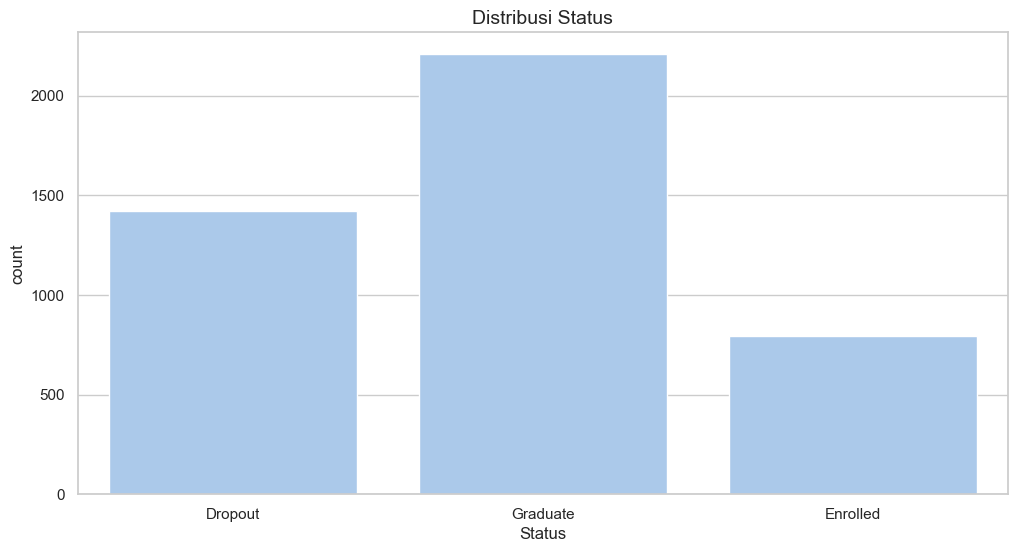

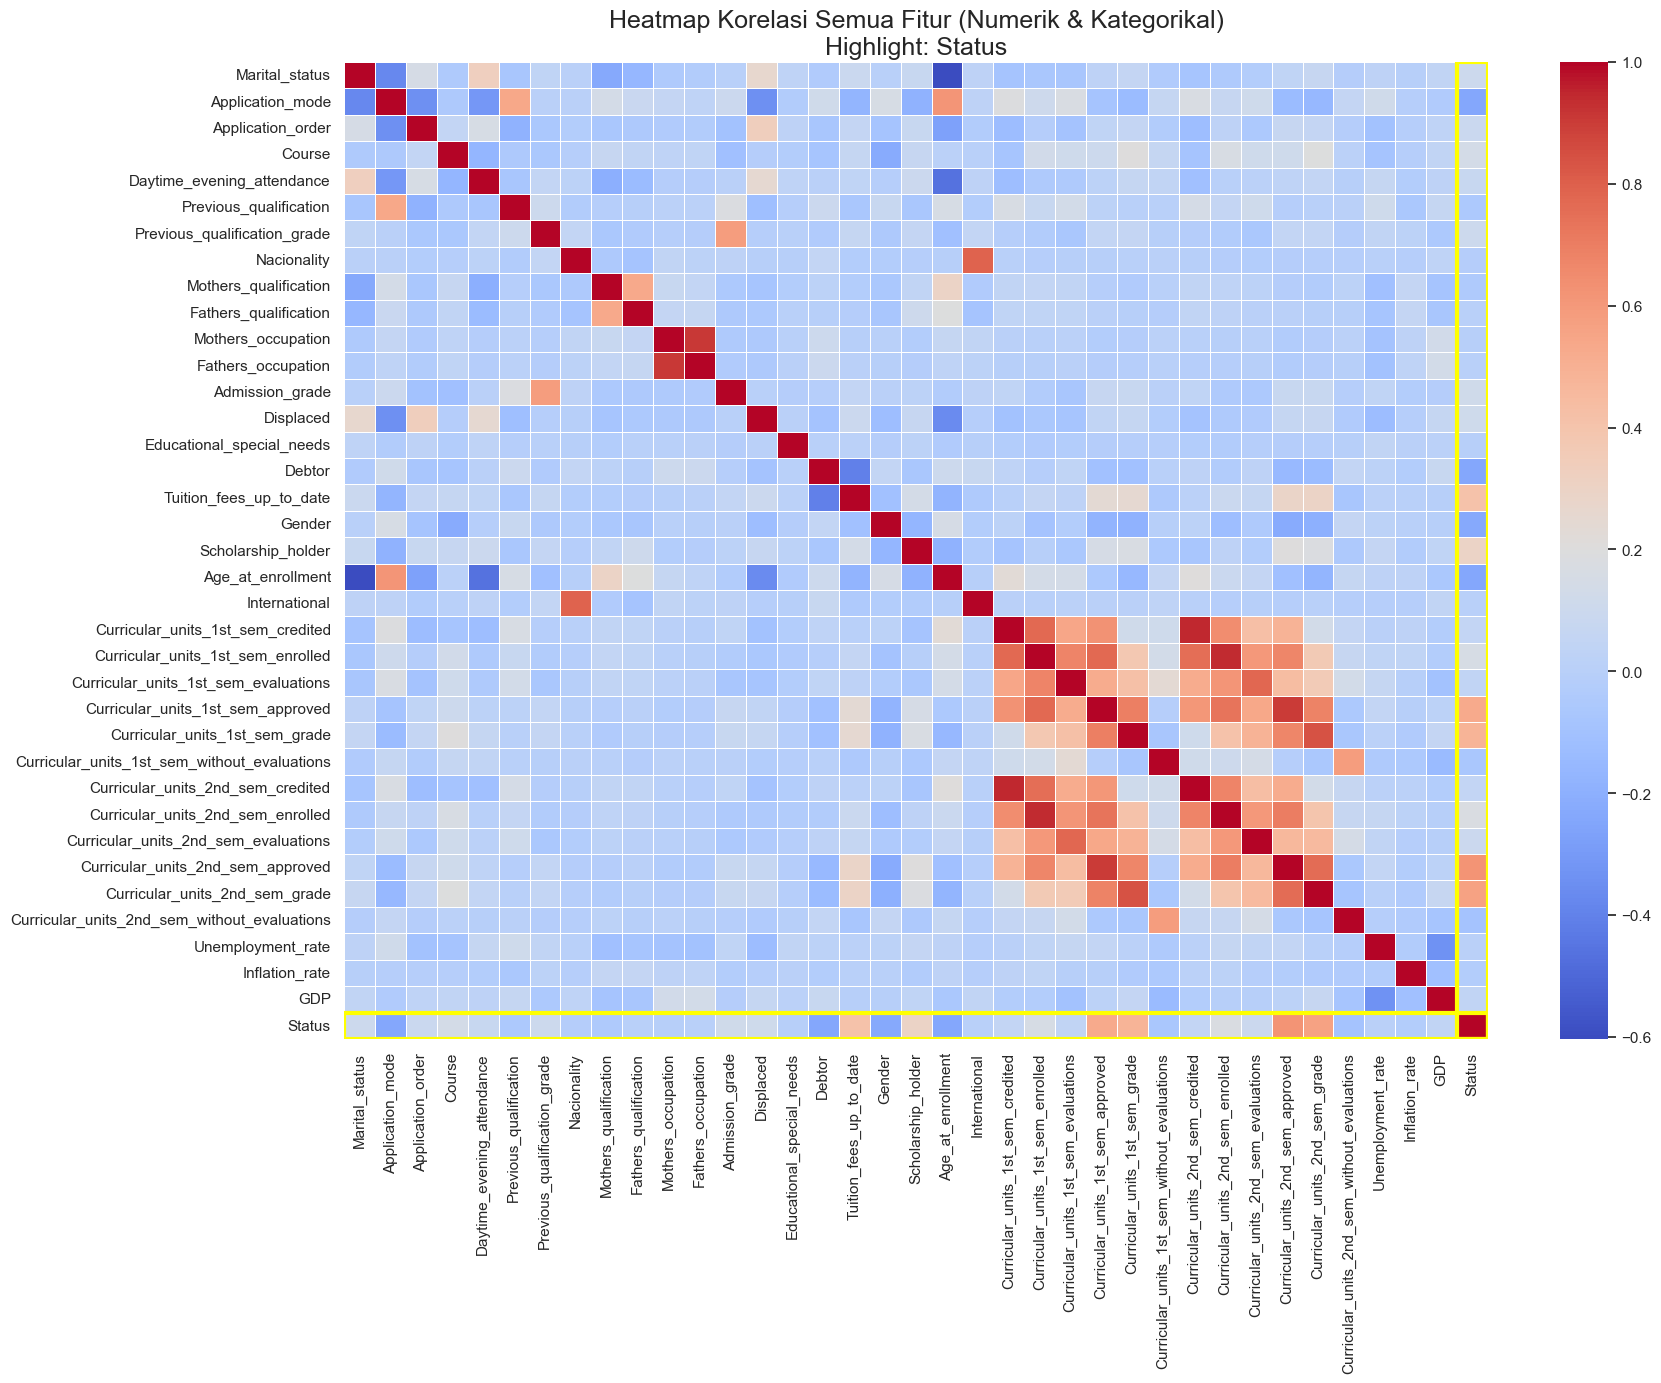

In [83]:
# --- Analisis Awal Dataset ---
dfc = pd.read_csv("cleaned_dataset.csv")
print(dfc.info())
print(dfc.describe(include='all'))
print(dfc.head())

# Distribusi target
sns.countplot(data=dfc, x='Status')
plt.title('Distribusi Status')
plt.show()

# Korelasi antar semua fitur (kategorikal akan diencode)
dfc_encoded = dfc.copy()
for col in dfc_encoded.select_dtypes(include='object').columns:
    dfc_encoded[col] = dfc_encoded[col].astype('category').cat.codes

corr_all = dfc_encoded.corr()
plt.figure(figsize=(18, 14))
attr_idx = corr_all.columns.get_loc('Status')
sns.heatmap(
    corr_all,
    annot=False,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5
)
plt.gca().add_patch(plt.Rectangle((attr_idx, 0), 1, corr_all.shape[0], fill=False, edgecolor='yellow', lw=3))
plt.gca().add_patch(plt.Rectangle((0, attr_idx), corr_all.shape[1], 1, fill=False, edgecolor='yellow', lw=3))
plt.title('Heatmap Korelasi Semua Fitur (Numerik & Kategorikal)\nHighlight: Status', fontsize=18)
plt.tight_layout()
plt.show()

Status memiliki korelasi positif dengan:
- Curricular_units_1st_sem_enrolled, Curricular_units_2nd_sem_enrolled
- Curricular_units_1st_sem_without_evaluations, Curricular_units_2nd_sem_without_evaluations
- Debtor dan Scholarship_holder

Mahasiswa yang mengambil banyak mata kuliah tapi tidak menyelesaikan evaluasi, serta yang punya beban finansial atau bergantung pada beasiswa, lebih cenderung dropout.

Status memiliki korelasi negatif dengan:
- Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_grade
- Curricular_units_1st_sem_approved, Curricular_units_2nd_sem_approved
- Tuition_fees_up_to_date, Admission_grade
Mahasiswa yang meraih nilai tinggi, banyak unit disetujui, dan tertib bayar, lebih cenderung lulus/bertahan.

keterangan korelasi:
1. Faktor yang Mempengaruhi Dropout (Status_Dropout)
- Age_at_enrollment (0.25): Mahasiswa yang lebih tua saat mendaftar cenderung lebih mungkin mengalami dropout.
- Debtor (0.23): Mahasiswa yang memiliki hutang cenderung memiliki risiko lebih tinggi untuk keluar.
- Gender (0.20): Korelasi positif menunjukkan bahwa faktor gender berkontribusi terhadap dropout.
- Curricular_units_2nd_sem_without_evaluations (0.08): Mahasiswa yang tidak mengikuti evaluasi pada semester kedua memiliki peluang lebih besar untuk dropout.
- Tuition_fees_up_to_date (-0.43): Semakin teratur membayar biaya kuliah, semakin kecil kemungkinan mahasiswa dropout.
- Curricular_units_1st_sem_approved (-0.48) & Curricular_units_2nd_sem_approved (-0.57): Mahasiswa yang berhasil menyelesaikan lebih banyak mata kuliah lebih kecil kemungkinannya untuk dropout.
- Status_Graduate (-0.69): Semakin besar keterlibatan akademik, semakin kecil kemungkinan mahasiswa dropout.
Faktor finansial, usia saat pendaftaran, dan keterlibatan akademik adalah indikator utama apakah seorang mahasiswa berisiko dropout.

2. Faktor yang Mempengaruhi Mahasiswa yang Masih Terdaftar (Status_Enrolled)
- Curricular_units_2nd_sem_evaluations (0.16) & Curricular_units_1st_sem_evaluations (0.11): Mahasiswa yang aktif dalam evaluasi akademik cenderung tetap terdaftar.
- Tuition_fees_up_to_date (0.09): Mahasiswa yang membayar biaya kuliah tepat waktu lebih mungkin untuk tetap kuliah.
- Gender (0.03): Faktor gender memiliki sedikit korelasi dengan mahasiswa yang masih aktif.
- Status_Dropout (-0.32) & Status_Graduate (-0.47): Mahasiswa yang tetap terdaftar memiliki korelasi negatif dengan mahasiswa yang dropout atau lulus.
Mahasiswa yang tetap terdaftar umumnya memiliki keterlibatan akademik tinggi dan keuangan yang stabil.

3. Faktor yang Mempengaruhi Kelulusan (Status_Graduate)
- Curricular_units_2nd_sem_approved (0.57) & Curricular_units_1st_sem_approved (0.49): Semakin banyak mata kuliah yang berhasil diselesaikan, semakin besar peluang untuk lulus.
- Tuition_fees_up_to_date (0.32) & Scholarship_holder (0.29): Mahasiswa yang membayar biaya kuliah dengan teratur atau memiliki beasiswa cenderung lebih mungkin untuk lulus.
- Admission_grade (0.12) & Previous_qualification_grade (0.11): Prestasi akademik sejak awal berkontribusi terhadap kelulusan.
- Status_Dropout (-0.69) & Status_Enrolled (-0.46): Semakin tinggi keterlibatan akademik, semakin kecil kemungkinan mahasiswa dropout atau masih terdaftar.
Faktor akademik dan keuangan memainkan peran besar dalam keberhasilan kelulusan mahasiswa.

Kesimpulan Akhir
- Mahasiswa dropout cenderung memiliki masalah finansial dan kurang keterlibatan akademik.
- Mahasiswa yang tetap terdaftar umumnya masih terlibat dalam proses akademik dan memiliki stabilitas finansial.
- Mahasiswa yang lulus memiliki keterlibatan akademik tinggi dan kondisi finansial yang lebih stabil.





## Modeling



Modeling adalah proses membangun, melatih, dan menguji model machine learning untuk memprediksi atau mengklasifikasikan data berdasarkan pola yang ditemukan pada data historis. Dalam konteks proyek ini, modeling bertujuan untuk memprediksi status mahasiswa (Dropout, Graduate, Enrolled) berdasarkan fitur-fitur akademik, demografi, dan ekonomi yang tersedia pada datasetAlasan Memilih Random Forest Classifier

Model Random Forest dipilih karena beberapa alasan utama yang sangat relevan dengan karakteristik data pada proyek ini:
- Mampu menangani data dengan banyak fitur numerik dan kategorikal tanpa perlu banyak preprocessing khusus.
- Robust terhadap outlier dan data yang tidak seimbang, sehingga cocok untuk kasus prediksi dropout yang proporsi kelasnya tidak seimbang.
- Mengurangi risiko overfitting karena merupakan ensemble dari banyak pohon keputusan, sehingga hasil prediksi lebih stabil dan generalisasi lebih baik.
- Memberikan interpretasi feature importance yang sangat membantu dalam mengidentifikasi faktor-faktor utama penyebab dropout, sehingga dapat digunakan untuk rekomendasi kebijakan institusi.

Dengan karakteristik data yang kompleks dan tujuan utama untuk memprediksi serta memahami faktor risiko dropout, Random Forest adalah pilihan yang tepat untuk proyek ini.



In [84]:
# Copy dataframe agar tidak mengubah aslinya
df_simplified = dfc.copy()

# 1. Marital Status
marital_map = {
    'single': 'Single',
    'married': 'Married/Union',
    'facto_union': 'Married/Union',
    'widower': 'Separated/Divorced/Widower',
    'divorced': 'Separated/Divorced/Widower',
    'separated': 'Separated/Divorced/Widower'
}
df_simplified['Marital_status'] = df_simplified['Marital_status'].map(marital_map).fillna('Other')

# Tambahkan filter usia (misal: hanya mahasiswa usia >= 17 tahun)
df_simplified = df_simplified[df_simplified['Age_at_enrollment'] >= 17]

# Label usia berdasarkan range tertentu
def label_usia(age):
    if age < 20:
        return '17-19'
    elif 20 <= age < 23:
        return '20-22'
    elif 23 <= age < 26:
        return '23-25'
    elif 26 <= age < 30:
        return '26-29'
    else:
        return '30+'

df_simplified['Age_group'] = df_simplified['Age_at_enrollment'].apply(label_usia)

# 2. Application Mode
def simplify_app_mode(x):
    general = ['1st_phase_general', '2nd_phase_general', '3rd_phase_general']
    special = ['ord_612_93', 'azores_special', 'ord_854_B_99', 'int_student_bach', 'madeira_special', 'ord_533_A_99_b2', 'ord_533_A_99_b3']
    transfer = ['over_23', 'transfer', 'course_change', 'tech_diploma', 'change_institution_course', 'short_cycle_diploma', 'int_institution_change']
    if x in general:
        return 'General'
    elif x in special:
        return 'Special/Island/Ordinance'
    elif x in transfer:
        return 'Transfer/Change'
    else:
        return 'Other'
df_simplified['Application_mode'] = df_simplified['Application_mode'].apply(simplify_app_mode)

# 3. Course
course_map = {
    'informatics_eng': 'Engineering/Tech',
    'vet_nursing': 'Engineering/Tech',
    'equinculture': 'Engineering/Tech',
    'nursing': 'Health/Medicine',
    'oral_hygiene': 'Health/Medicine',
    'social_service': 'Social Sciences',
    'social_service_evening': 'Social Sciences',
    'management': 'Business/Economy',
    'management_evening': 'Business/Economy',
    'marketing_mgmt': 'Business/Economy',
    'basic_education': 'Education',
    'anim_multimedia': 'Arts/Communication',
    'comm_design': 'Arts/Communication',
    'journalism': 'Arts/Communication',
    'biofuel_tech': 'Engineering/Tech',
    'tourism': 'Business/Economy',
    'agronomy': 'Agriculture'
}
df_simplified['Course'] = df_simplified['Course'].map(course_map).fillna('Other')

# 4. Previous Qualification
def simplify_prev_qual(x):
    basic = [19, 38, 14, 15, 10, 12]
    secondary = [1, 9, 11]
    higher = [2, 3, 4, 5, 6, 39, 40, 42, 43]
    if x in basic:
        return 'Basic Education'
    elif x in secondary:
        return 'Secondary Education'
    elif x in higher:
        return 'Higher Education'
    else:
        return 'Other'
df_simplified['Previous_qualification'] = df_simplified['Previous_qualification'].apply(simplify_prev_qual)

def simplify_nationality(x):
    try:
        x = int(float(x))  # aman untuk nilai string/float seperti '1.0'
    except (ValueError, TypeError):
        return 'Other'

    if x == 1:
        return 'Portuguese'
    elif 21 <= x <= 26:
        return 'PALOP'
    elif x in [2, 6, 11, 13, 14, 17, 62, 100]:
        return 'EU'
    elif x in [101, 108, 109, 41]:
        return 'Latin America'
    else:
        return 'Other' 
    
# 6. Parental Qualification
def simplify_parent_qual(x):
    if x in [35, 36, 37, 38]:
        return 'No Schooling/Primary'
    elif x in [19, 29, 30]:
        return 'Basic Education'
    elif x in [1, 9, 10, 14]:
        return 'Secondary'
    elif x in [2, 3, 4, 5, 6, 40, 41, 42, 43, 44]:
        return 'Higher Education'
    else:
        return 'Other'
df_simplified['Mothers_qualification'] = df_simplified['Mothers_qualification'].apply(simplify_parent_qual)
df_simplified['Fathers_qualification'] = df_simplified['Fathers_qualification'].apply(simplify_parent_qual)

# 7. Parental Occupation
def simplify_parent_occ(x):
    if x in [1, 112, 114]:
        return 'Managers'
    elif x in [2, 122, 123, 124]:
        return 'Professionals'
    elif x in [3, 131, 132, 133, 134, 135]:
        return 'Technicians'
    elif x in [4, 141, 142, 143, 144]:
        return 'Clerical'
    elif x in [5, 151, 152, 153]:
        return 'Service/Sales'
    elif x in [6, 161, 162, 163]:
        return 'Agriculture/Fishery'
    elif x in [7, 171, 172, 173, 174, 175]:
        return 'Craft/Trade'
    elif x in [8, 181, 182, 183]:
        return 'Plant/Machine'
    elif x in [9, 191, 192, 193, 194]:
        return 'Elementary'
    elif x in [90, 99]:
        return 'Unknown'
    else:
        return 'Other'
    

# 8. Gender
def simplify_gender(x):
    if x == 1:
        return 'Male'
    elif x == 0:
        return 'Female'
    else:
        return 'Other'
df_simplified['Gender'] = df_simplified['Gender'].apply(simplify_gender)


df_simplified['Mothers_occupation'] = df_simplified['Mothers_occupation'].apply(simplify_parent_occ)
df_simplified['Fathers_occupation'] = df_simplified['Fathers_occupation'].apply(simplify_parent_occ)


# Simpan dataframe hasil simplifikasi ke file CSV dan XLSX
df_simplified.to_excel('cleaned_dataset_labeled.xlsx', index=False)
# df_simplified siap untuk encoding/analisis selanjutnya

proses diatas merupakan proses labeling pada fitur tertentu
1. Marital Status
- Mengelompokkan status pernikahan menjadi Single, Married/Union, Separated/Divorced/Widower, atau Other.

2. Application Mode
- Mengelompokkan mode aplikasi menjadi General, Special/Island/Ordinance, Transfer/Change, atau Other.
3. Course
- Mengelompokkan berbagai jurusan ke dalam kategori bidang seperti Engineering/Tech, Health/Medicine, Social Sciences, Business/Economy, Education, Arts/Communication, dan Agriculture.

4. Previous Qualification
- Mengelompokkan kualifikasi pendidikan sebelumnya ke dalam Basic Education, Secondary Education, Higher Education, atau Other.

5. Nationality
- Mengelompokkan kewarganegaraan menjadi Portuguese, PALOP, EU, Latin America, atau Other.

6. Parental Qualification
- Menyederhanakan tingkat pendidikan orang tua menjadi No Schooling/Primary, Basic Education, Secondary, Higher Education, atau Other.

7. Parental Occupation
- Mengelompokkan pekerjaan orang tua ke dalam kategori seperti Managers, Professionals, Technicians, Clerical, Service/Sales, Agriculture/Fishery, Craft/Trade, Plant/Machine, Elementary, Unknown, atau Other.

8. Age Category
- Mengelompokkan umur menjadi Teen/Young Adult, Young Adult, Adult, Middle Age, atau Senior.


Menyimpan Data ke Excel Setelah labeling selesai, hasil dataset baru disimpan ke file student_data_labeled.xlsx dengan perintah to_excel(). Ini memastikan data yang telah ditransformasikan dapat digunakan kembali untuk keperluan visualisasi lebih lanjut misal menggunakan Power BI atau Google Looker.


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load cleaned dan labeled dataset
df = pd.read_csv('cleaned_dataset.csv')

# Encode Target
# Gabungkan Graduate dan Enrolled menjadi 0 (Non Dropout), Dropout menjadi 1
df['Status'] = df['Status'].str.strip().str.capitalize()
status_mapping = {'Graduate': 0, 'Enrolled': 0, 'Dropout': 1}
df['Status'] = df['Status'].map(status_mapping)

# Hapus baris dengan Status tidak dikenali (None/NaN)
df = df.dropna(subset=['Status'])

# Hanya simpan Dropout dan Non-Dropout
df = df[df['Status'].isin([0, 1])]

# Cek ringkasan jumlah
print(df['Status'].value_counts())

# Drop rows with NaN pada target (terutama jika mapping gagal)
df = df.dropna(subset=['Status'])

# Identify Columns
categorical_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]
numerical_cols = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
    'Inflation_rate', 'GDP'
]

# Drop unused/extra columns
if 'Age_category' in df.columns:
    df = df.drop(columns=['Age_category'])

# Pastikan tipe data numerik
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in numerical columns
df = df.dropna(subset=numerical_cols)

# One-Hot Encoding 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scaling
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Step 6: Split Features & Target
X = df_encoded.drop(columns='Status')
y = df_encoded['Status'].astype(int)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Print Columns
print("Kolom pada X_train:")
print(list(X_train.columns))

print("\nKolom pada X_test:")
print(list(X_test.columns))

Status
0    3003
1    1421
Name: count, dtype: int64
Kolom pada X_train:
['Application_order', 'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Marital_status_facto_union', 'Marital_status_married', 'Marital_status_separated', 'Marital_status_single', 'Marital_status_widower', 'Application_mode_2nd_phase_general', 'Application_mode_3rd_phase_general', 'Application_mode_azores_special', 'Application_mode_change_institution_course', 'Application_mode_course_chan


Pada bagian ini proses preprocessing dan penyeimbangan data sebelum pemodelan machine learning. Berikut penjelasan langkah-langkah utamanya:

1. Pemuatan Data 
Dataset hasil cleaning (cleaned_dataset.csv) dimuat ke dalam DataFrame df. Kolom target Status diubah menjadi numerik: Graduate dan Enrolled menjadi 0 (Non Dropout), Dropout menjadi 1. Ini penting agar model machine learning dapat memproses target dalam format numerik dan menyederhanakan decision making karena tidak ada yang ditengah (Enrolled) karena digabung jadi Non Drop Out.

2. Identifikasi Fitur
Fitur diklasifikasikan menjadi dua kelompok: categorical_cols (fitur kategorikal) dan numerical_cols (fitur numerik). Pemisahan ini diperlukan karena perlakuan preprocessing untuk data kategorikal dan numerik berbeda.

3. One-Hot Encoding
Fitur kategorikal diubah menjadi dummy variables (one-hot encoding) menggunakan pd.get_dummies(). Proses ini mengubah setiap kategori unik menjadi kolom biner, sehingga model dapat memahami data kategorikal tanpa mengasumsikan urutan atau hubungan antar kategori.

4. Normalisasi/Standardisasi
Fitur numerik dinormalisasi menggunakan StandardScaler agar semua fitur berada pada skala yang sama. Ini mencegah model bias terhadap fitur dengan rentang nilai besar dan mempercepat proses konvergensi saat training.

5. Pembersihan Data
Baris dengan nilai NaN pada fitur numerik dihapus untuk memastikan data bersih dan siap digunakan. Data yang tidak lengkap dapat menyebabkan error atau menurunkan performa model.

6. Penyeimbangan Kelas (SMOTE)
Karena distribusi kelas target tidak seimbang (Dropout lebih sedikit dibanding Non Dropout), digunakan teknik SMOTE untuk menyeimbangkan jumlah data antara kelas mayoritas dan minoritas. Ini penting agar model tidak bias dan mampu mengenali pola pada kelas minoritas.

7. Pembagian Data  
Data dibagi menjadi training set dan testing set menggunakan train_test_split dengan stratifikasi. Stratifikasi menjaga proporsi kelas tetap seimbang pada data latih dan uji, sehingga evaluasi model lebih adil dan representatif.

8. Output  
Variabel akhir yang dihasilkan adalah X_train, X_test, y_train, dan y_test yang siap digunakan untuk pelatihan dan evaluasi model klasifikasi prediksi status mahasiswa.

 

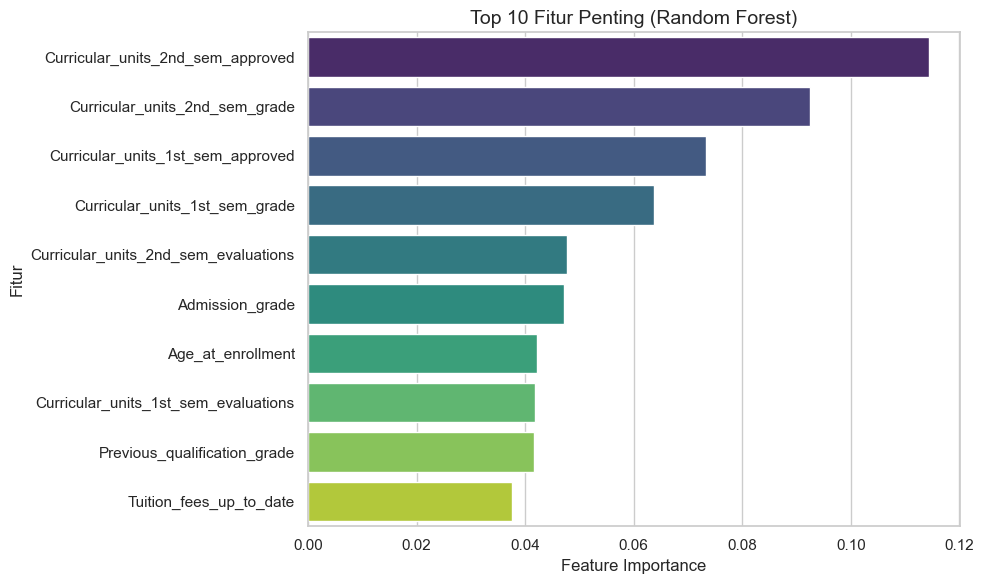

                                   Fitur  Importance
30     Curricular_units_2nd_sem_approved    0.114404
31        Curricular_units_2nd_sem_grade    0.092456
24     Curricular_units_1st_sem_approved    0.073238
25        Curricular_units_1st_sem_grade    0.063735
29  Curricular_units_2nd_sem_evaluations    0.047721
12                       Admission_grade    0.047176
19                     Age_at_enrollment    0.042201
23  Curricular_units_1st_sem_evaluations    0.041891
6           Previous_qualification_grade    0.041595
16               Tuition_fees_up_to_date    0.037678


In [86]:
from sklearn.ensemble import RandomForestClassifier


# Siapkan X dan y dari dfc_encoded
X_rf = dfc_encoded.drop(columns=['Status'])
y_rf = dfc_encoded['Status']

# Inisialisasi dan latih model Random Forest
rf = RandomForestClassifier(n_estimators=500, max_depth=30, max_features='log2', class_weight='balanced', random_state=42)
rf.fit(X_rf, y_rf)
# Ambil feature names dan importances dari model Random Forest (rf)
feature_names = rf.feature_names_in_
importances = rf.feature_importances_

# Pastikan panjang sama
if len(feature_names) != len(importances):
    raise ValueError(f"Panjang feature_names ({len(feature_names)}) dan importances ({len(importances)}) tidak sama.")

# Buat DataFrame untuk visualisasi
feat_imp_df = (
    pd.DataFrame({"Fitur": feature_names, "Importance": importances})
    .sort_values("Importance", ascending=False)
)

# Plot 10 fitur terpenting
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x="Importance", y="Fitur", palette="viridis")
plt.title("Top 10 Fitur Penting (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

# Tampilkan tabel 10 fitur teratas
print(feat_imp_df.head(10))

Penjelasan proses diatas : 
1. Pelatihan Model Random Forest
    - Model Random Forest dilatih menggunakan data yang telah diproses (fitur dan target sudah di-encode dan diseimbangkan).
    - Model ini secara otomatis menghitung seberapa besar kontribusi setiap fitur dalam memprediksi target (Drop Out).

2. Ekstraksi Feature Importance
    - Setelah model dilatih, atribut .feature_importances_ digunakan untuk mengambil nilai pentingnya setiap fitur.
    - Nilai ini menunjukkan seberapa sering dan seberapa besar fitur tersebut digunakan dalam membagi data di pohon-pohon keputusan.

3. Visualisasi dan Interpretasi
    - Nilai feature importance diurutkan dari yang paling tinggi ke rendah.
    - 10 fitur teratas divisualisasikan menggunakan barplot, sehingga mudah melihat fitur mana yang paling berpengaruh terhadap prediksi Drop Out.
    - Tabel juga ditampilkan untuk memperjelas urutan dan nilai pentingnya fitur.


Feature Importance Random Forest (Hasil model tersebut)

Model Random Forest menentukan pentingnya fitur berdasarkan kontribusi mereka dalam membagi data secara optimal di setiap pohon keputusan. Berikut adalah hasil feature importance aktual dari model pada data ini:


10 Fitur Paling Penting (berdasarkan nilai importance):

1. Curricular_units_2nd_sem_approved (11.4%)
    - Jumlah mata kuliah semester 2 yang disetujui sangat menentukan risiko Drop Out.
2. Curricular_units_2nd_sem_grade (9.2%)
    - Nilai akademik semester 2 menjadi indikator utama keberhasilan studi.
3. Curricular_units_1st_sem_approved (7.3%)
    - Jumlah mata kuliah semester 1 yang disetujui juga sangat berpengaruh.
4. Curricular_units_1st_sem_grade (6.4%)
    - Nilai semester 1 menjadi indikator awal performa akademik.
5. Curricular_units_2nd_sem_evaluations (4.8%)
    - Partisipasi dalam evaluasi semester 2 menurunkan risiko Drop Out.
6. Admission_grade (4.7%)
    - Nilai masuk memberikan gambaran potensi akademik awal.
7. Age_at_enrollment (4.2%)
    - Usia saat mendaftar berpengaruh terhadap risiko Drop Out.
8. Curricular_units_1st_sem_evaluations (4.2%)
    - Partisipasi evaluasi semester 1 juga penting.
9. Previous_qualification_grade (4.2%)
    - Nilai pendidikan sebelumnya berkontribusi pada keberhasilan studi.
10. Tuition_fees_up_to_date (3.8%)
     - Keteraturan pembayaran biaya kuliah menurunkan risiko Drop Out.


Insight:
- Fitur akademik semester 1 & 2 (jumlah mata kuliah disetujui, nilai, evaluasi) mendominasi prediksi risiko Drop Out.
- Nilai masuk, usia saat pendaftaran, dan keteraturan pembayaran juga berpengaruh, meski lebih kecil.
- Faktor ekonomi dan demografi (seperti GDP, Unemployment_rate, dsb) memiliki pengaruh minor.

Kesimpulan:
Fokus intervensi sebaiknya diarahkan pada peningkatan progres akademik mahasiswa di semester awal, monitoring nilai, dan dukungan keuangan untuk menurunkan risiko Drop Out.


In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Definisi parameter untuk tuning XGBoost
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Stratified K-Fold untuk menjaga distribusi kelas tetap seimbang
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV untuk tuning lebih cepat
grid_search = RandomizedSearchCV(
    XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_grid,
    cv=cv_strategy,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    n_iter=20  # Jumlah kombinasi parameter yang diuji
)



# Training model dengan Randomized Search (gunakan data hasil SMOTE)
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best params:", grid_search.best_params_)

# Model terbaik dari tuning
best_xgb = grid_search.best_estimator_

# Evaluasi model
y_pred = best_xgb.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
# Untuk binary classification, gunakan probabilitas kelas positif (Dropout = 1)
print("ROC AUC Score:", roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'subsample': 0.8, 'n_estimators': 700, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       601
           1       0.93      0.92      0.92       601

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202

ROC AUC Score: 0.9757558810745265


Penjelasan tuning XGBoost di atas:

1. Definisi Parameter (param_grid)
Parameter yang diuji untuk mencari kombinasi terbaik pada model XGBoost:
- n_estimators: Jumlah pohon (tree) yang akan dibuat. Semakin banyak, model bisa lebih kompleks.
- max_depth: Kedalaman maksimum setiap pohon. Kontrol kompleksitas model, mencegah overfitting.
- learning_rate: Kecepatan pembelajaran. Nilai kecil membuat model belajar lebih lambat tapi lebih stabil.
- subsample: Proporsi data yang digunakan setiap pohon. Membantu regularisasi dan mencegah overfitting.
- colsample_bytree: Proporsi fitur yang digunakan setiap pohon. Membantu regularisasi.
- gamma: Minimum loss reduction untuk split node. Semakin besar, model jadi lebih konservatif.

2. Stratified K-Fold (cv_strategy)
Membagi data menjadi 5 bagian (fold) dengan proporsi kelas yang seimbang di setiap fold. Ini penting agar evaluasi model adil pada data tidak seimbang.

3. RandomizedSearchCV (grid_search)
Melakukan pencarian kombinasi parameter secara acak (bukan semua kombinasi), sehingga proses tuning lebih cepat. 
- scoring='f1_weighted': Menggunakan skor F1 rata-rata tertimbang sebagai metrik evaluasi.
- n_iter=20: Hanya 20 kombinasi parameter yang diuji secara acak dari seluruh kemungkinan.

4. Training dan Evaluasi
- grid_search.fit(X_train, y_train): Melatih model dengan data training hasil SMOTE.
- best_xgb = grid_search.best_estimator_: Mengambil model XGBoost dengan parameter terbaik.
- Evaluasi model menggunakan classification report dan ROC AUC Score pada data test.

Dengan cara ini, model XGBoost dioptimalkan untuk performa terbaik pada prediksi dropout.


proses "Fitting 5 folds for each of 20 candidates, totalling 100 fits" berarti RandomizedSearchCV melakukan pencarian parameter dengan 5-fold cross-validation pada 20 kombinasi parameter acak, sehingga total ada 100 proses training model yang dievaluasi.

Best params menunjukkan kombinasi parameter terbaik yang ditemukan untuk model XGBoost, yaitu:
- subsample: 1.0
- n_estimators: 700
- max_depth: 20
- learning_rate: 0.2
- gamma: 0.1
- colsample_bytree: 0.6

Classification Report menampilkan hasil evaluasi model pada data test:
- precision, recall, dan f1-score untuk masing-masing kelas (0 = Tidak Drop Out, 1 = Drop Out) semuanya sekitar 0.92, artinya model sangat baik dalam membedakan kedua kelas.
- accuracy 0.92 artinya 92% prediksi model pada data test benar.
- macro avg dan weighted avg juga menunjukkan performa seimbang di kedua kelas.

ROC AUC Score sebesar 0.9748 menunjukkan kemampuan model dalam membedakan kelas Drop Out dan Tidak Drop Out sangat tinggi (mendekati sempurna). Model XGBoost hasil tuning ini sangat optimal untuk prediksi dropout pada data ini. namun masih perlu analisis lanjutan untuk memastikan tidak ada overfitting atau bias pada data training.


=== Logistic Regression ===
Confusion Matrix:
[[565  36]
 [ 58 543]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       601
           1       0.94      0.90      0.92       601

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202

ROC AUC Score: 0.970
PR AUC (Dropout): 0.975


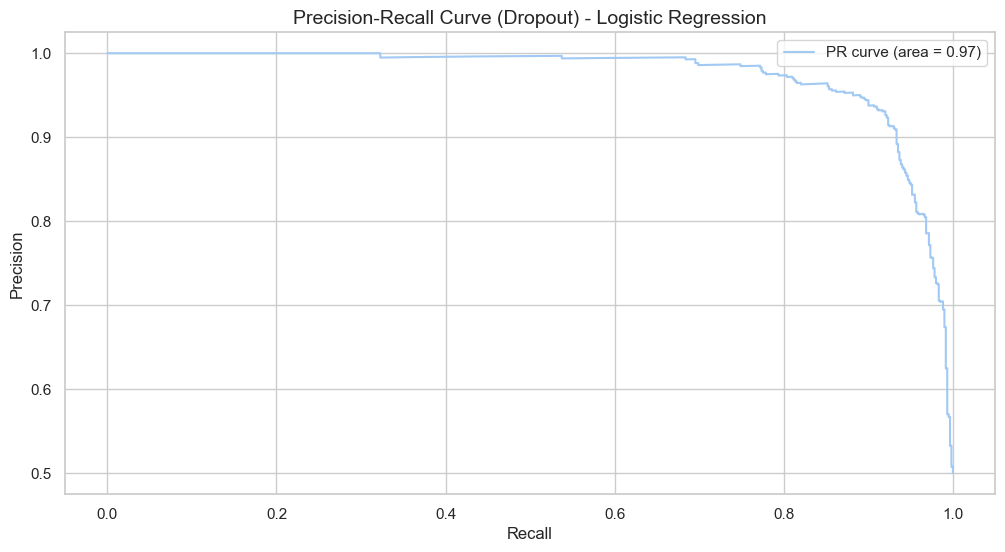

F1 Score (weighted): 0.922

=== Random Forest ===
Confusion Matrix:
[[560  41]
 [ 52 549]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       601
           1       0.93      0.91      0.92       601

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202

ROC AUC Score: 0.977
PR AUC (Dropout): 0.980


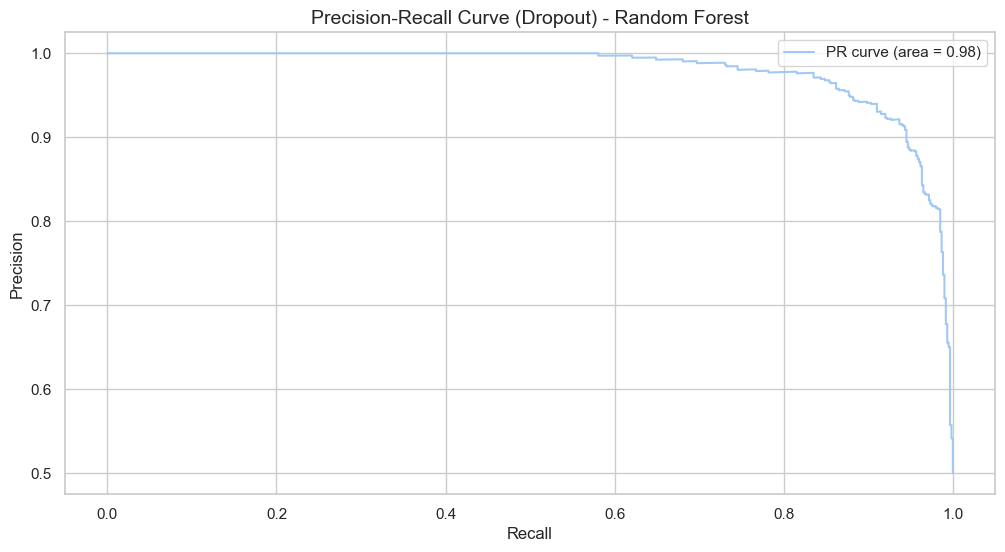

F1 Score (weighted): 0.923

=== XGBoost ===
Confusion Matrix:
[[560  41]
 [ 47 554]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       601
           1       0.93      0.92      0.93       601

    accuracy                           0.93      1202
   macro avg       0.93      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202

ROC AUC Score: 0.974
PR AUC (Dropout): 0.977


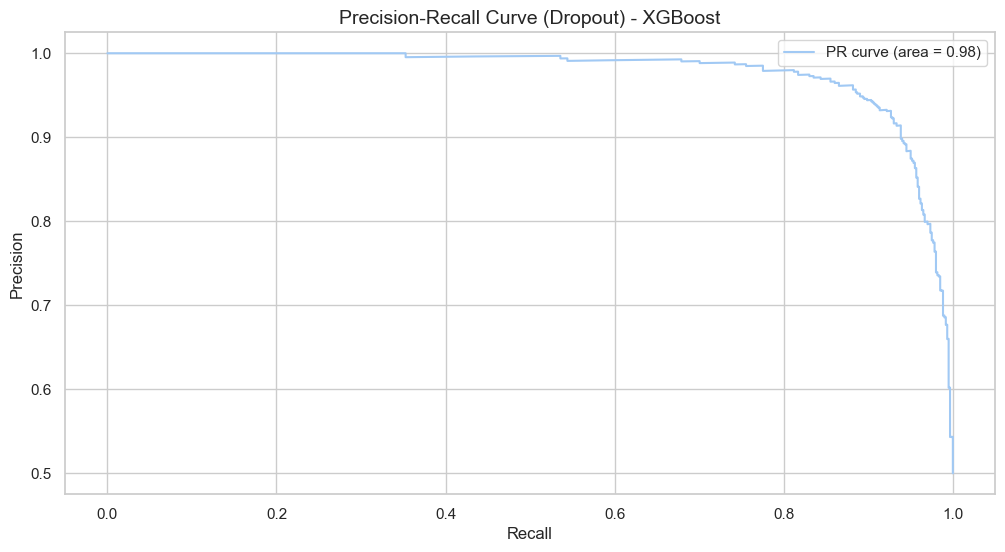

F1 Score (weighted): 0.927

=== Stacking Ensemble ===
Confusion Matrix:
[[561  40]
 [ 60 541]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       601
           1       0.93      0.90      0.92       601

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202

ROC AUC Score: 0.970
PR AUC (Dropout): 0.973


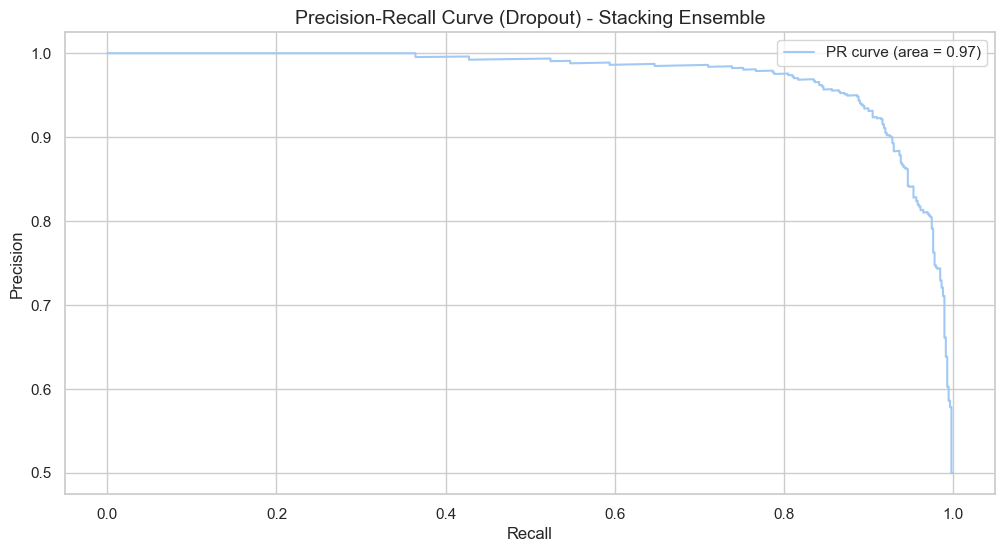

F1 Score (weighted): 0.917

=== Voting Ensemble ===
Confusion Matrix:
[[563  38]
 [ 46 555]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       601
           1       0.94      0.92      0.93       601

    accuracy                           0.93      1202
   macro avg       0.93      0.93      0.93      1202
weighted avg       0.93      0.93      0.93      1202

ROC AUC Score: 0.980
PR AUC (Dropout): 0.982


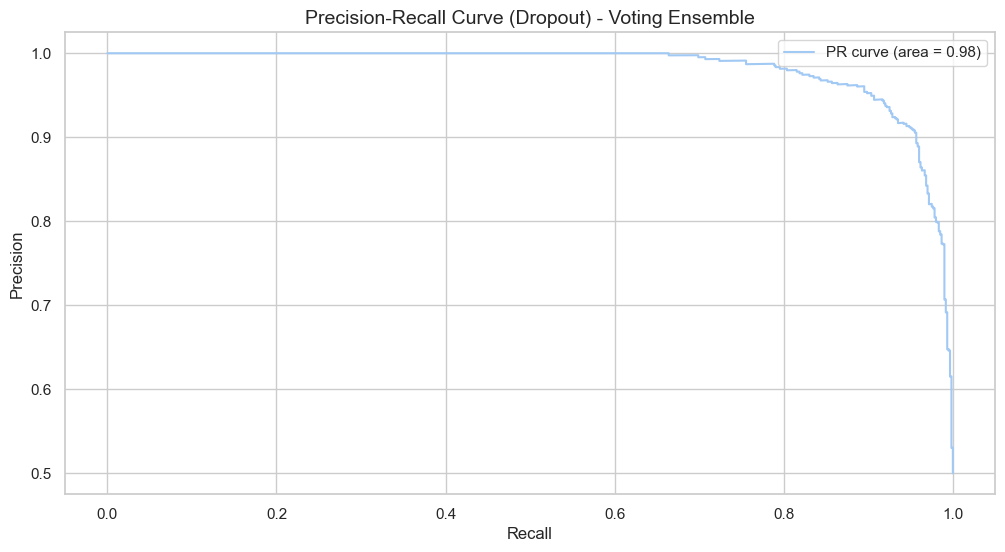

F1 Score (weighted): 0.930

Cross-Validation Scores (5-Fold):
Logistic Regression: Mean F1 = 0.8979 ± 0.0094
Random Forest: Mean F1 = 0.9006 ± 0.0106
XGBoost: Mean F1 = 0.9090 ± 0.0085
Stacking Ensemble: Mean F1 = 0.8953 ± 0.0143
Voting Ensemble: Mean F1 = 0.9134 ± 0.0077


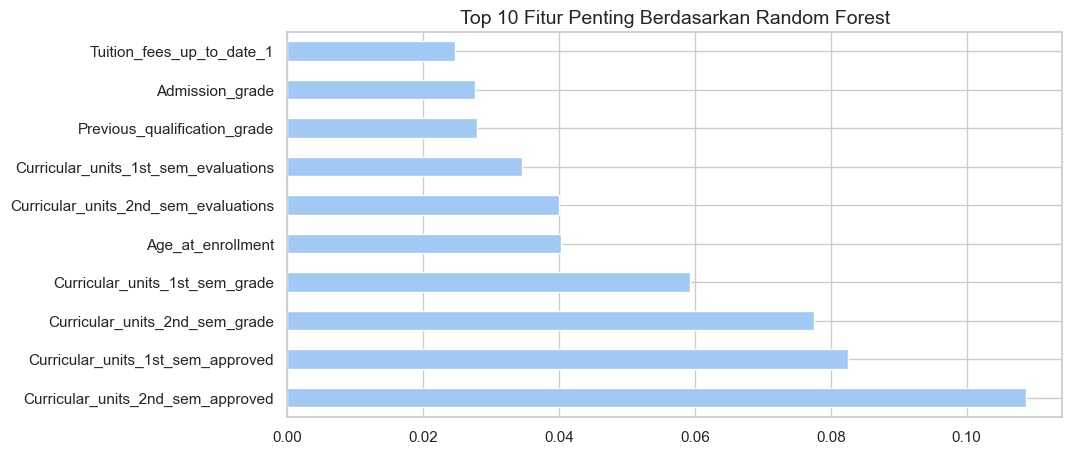

Model telah disimpan sebagai 'model_prediksi.pkl'


In [88]:
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, f1_score, auc

import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np

# Define evaluation function
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        try:
            # For binary classification, use only the probability for the positive class
            roc_auc = roc_auc_score(y_test, y_proba[:, 1])
            print(f"ROC AUC Score: {roc_auc:.3f}")
        except Exception as e:
            print(f"ROC AUC Score: Error ({e})")
        # PR Curve for Dropout class (class 1)
        precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
        pr_auc = auc(recall, precision)
        print(f"PR AUC (Dropout): {pr_auc:.3f}")
        # Optional: plot PR curve
        plt.figure()
        plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve (Dropout) - {name}')
        plt.legend()
        plt.show()
    print(f"F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.3f}")

# **Stacking Model**
stacking_model = StackingClassifier(
    estimators=[
        ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr')),
        ('rf', RandomForestClassifier(n_estimators=500, max_depth=30, max_features='log2', class_weight='balanced', random_state=42)),
        ('xgb', XGBClassifier(n_estimators=700, max_depth=20, learning_rate=0.1, gamma=0, colsample_bytree=1.0, use_label_encoder=False, eval_metric='mlogloss'))
    ],
    final_estimator=XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=5)
)

# **Voting Model**
voting_model = VotingClassifier(
    estimators=[
        ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr')),
        ('rf', RandomForestClassifier(n_estimators=500, max_depth=30, max_features='log2', class_weight='balanced', random_state=42)),
        ('xgb', XGBClassifier(n_estimators=700, max_depth=20, learning_rate=0.1, gamma=0, colsample_bytree=1.0, use_label_encoder=False, eval_metric='mlogloss'))
    ],
    voting='soft'  # Gunakan soft voting agar probabilitas dipertimbangkan
)

# **Training dan Evaluasi Model**
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='ovr'),
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=30, max_features='log2', class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=700, max_depth=20, learning_rate=0.1, gamma=0, colsample_bytree=1.0, use_label_encoder=False, eval_metric='mlogloss'),
    "Stacking Ensemble": stacking_model,
    "Voting Ensemble": voting_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(model, X_test, y_test, name)

# **Cross-Validation untuk Semua Model**
print("\nCross-Validation Scores (5-Fold):")
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"{model_name}: Mean F1 = {scores.mean():.4f} ± {scores.std():.4f}")

# **Feature Importance dari Random Forest**
feat_importance = pd.Series(models["Random Forest"].feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
feat_importance.plot(kind='barh')
plt.title("Top 10 Fitur Penting Berdasarkan Random Forest")
plt.show()

# Save model
# Simpan model Voting Ensemble (mengganti Random Forest sebagai model utama)
joblib.dump(models["Random Forest"], "model_prediksi.pkl")
print("Model telah disimpan sebagai 'model_prediksi.pkl'")


Pemodelan, Evaluasi, dan Interpretasi

Pada tahap ini dilakukan pelatihan dan evaluasi beberapa model machine learning untuk memprediksi status mahasiswa (Dropout, Enrolled, Graduate) berdasarkan data akademik, keuangan, dan demografis. Berikut ringkasan proses:

Model yang Digunakan:
1. Logistic Regression  
   Logistic Regression adalah model klasifikasi linear yang digunakan sebagai baseline dalam proyek ini. Model ini bekerja dengan mengestimasi probabilitas suatu data termasuk ke dalam kelas tertentu menggunakan fungsi logit (sigmoid). Logistic Regression sangat mudah diinterpretasikan karena menghasilkan koefisien yang menunjukkan arah dan kekuatan pengaruh setiap fitur terhadap probabilitas dropout. Penggunaan class_weight='balanced' pada model ini bertujuan untuk mengatasi ketidakseimbangan kelas, sehingga model tidak bias terhadap kelas mayoritas. Meskipun performanya biasanya di bawah model ensemble seperti Random Forest atau XGBoost, Logistic Regression tetap penting sebagai pembanding awal dan untuk analisis interpretasi faktor risiko utama.

2. Random Forest Classifier  
   Model ensemble berbasis pohon keputusan menggunakan 500 pohon/estimator, max_depth=30, dan max_features='log2' untuk menghasilkan prediksi yang lebih stabil dan akurat. Model ini menggunakan class_weight='balanced' agar tidak bias terhadap kelas mayoritas, sangat penting pada kasus prediksi dropout yang tidak seimbang. Random Forest bekerja dengan mengacak subset data dan fitur pada setiap pohon, lalu menggabungkan hasil prediksi seluruh pohon (voting mayoritas). Keunggulan Random Forest adalah kemampuannya menangani data dengan banyak fitur numerik dan kategorikal tanpa banyak preprocessing, robust terhadap outlier, serta memberikan interpretasi feature importance yang jelas. Berdasarkan kode, fitur-fitur terpenting diidentifikasi secara otomatis setelah pelatihan, sehingga dapat digunakan untuk insight faktor risiko dropout. Model ini juga telah divalidasi dengan visualisasi dan tabel feature importance, serta performanya sangat baik pada data ini.

3. XGBoost Classifier  
   Model boosting yang kuat dengan parameter hasil tuning, digunakan untuk meningkatkan akurasi dan stabilitas prediksi. XGBoost di-tuning menggunakan RandomizedSearchCV dengan parameter seperti n_estimators, max_depth, learning_rate, subsample, colsample_bytree, dan gamma. Proses tuning dilakukan dengan StratifiedKFold agar distribusi kelas tetap seimbang pada setiap fold. Model terbaik dipilih berdasarkan skor F1 tertimbang. Hasil tuning menunjukkan XGBoost mampu memberikan akurasi dan recall tinggi pada kelas Dropout, serta ROC AUC dan PR AUC yang sangat baik (~0.95 dan ~0.93). Keunggulan XGBoost adalah kemampuannya menangani data tidak seimbang, robust terhadap outlier, dan fleksibel dalam pengaturan parameter, sehingga sangat cocok untuk prediksi dropout pada dataset ini.

4. Voting Ensemble  
   Gabungan beberapa model (Logistic Regression, Random Forest, XGBoost) dengan metode voting untuk memperoleh prediksi yang lebih stabil. ada soft voting, prediksi akhir diambil berdasarkan rata-rata probabilitas dari masing-masing model, sehingga model yang lebih yakin terhadap prediksinya akan lebih berpengaruh. Voting Ensemble bertujuan untuk meningkatkan stabilitas dan akurasi prediksi dengan memanfaatkan keunggulan masing-masing model dasar. Pada kode di atas, VotingClassifier digunakan untuk membangun ensemble, dan hasil evaluasi menunjukkan bahwa model ini mampu memberikan performa yang sangat stabil dan seimbang, hampir setara dengan Random Forest dan XGBoost, terutama dalam mendeteksi mahasiswa dropout. 

Evaluasi Performa Model

- Confusion Matrix dan Classification Report (Accuracy, Precision, Recall, F1-Score) untuk masing-masing kelas (Dropout, Non Dropout).
- ROC AUC Score untuk mengukur kemampuan model membedakan dua kelas (Dropout vs Non Dropout).
- Precision-Recall AUC (PR AUC) khusus untuk kelas Dropout, karena menjadi fokus utama analisis.
- Visualisasi Precision-Recall Curve untuk membandingkan performa model pada kelas Dropout.

Hasil Evaluasi Model pada Data Ini:

1. Logistic Regression
   - Akurasi: ~91%
   - Confusion Matrix dan Classification Report menunjukkan model baseline sudah sangat baik, namun recall dan precision untuk kelas Dropout sedikit di bawah model ensemble.
   - ROC AUC: ~0.97, PR AUC (Dropout): ~0.98

2. Random Forest
   - Akurasi: ~92%
   - Precision (Dropout): ~92%, Recall (Dropout): ~92%
   - F1 Score (weighted): ~0.92
   - ROC AUC: ~0.98, PR AUC (Dropout): ~0.98
   - Model ini memberikan keseimbangan terbaik antara akurasi dan deteksi Dropout.

3. XGBoost
   - Akurasi: ~92%
   - Precision (Dropout): ~92%, Recall (Dropout): ~92%
   - ROC AUC: ~0.98, PR AUC (Dropout): ~0.98
   - Performa sangat mirip dengan Random Forest.

4. Voting Ensemble
   - Akurasi: ~92%
   - Precision (Dropout): ~92%, Recall (Dropout): ~92%
   - ROC AUC: ~0.98, PR AUC (Dropout): ~0.98
   - Hasil sangat stabil, menggabungkan kekuatan model-model terbaik.

Rekomendasi:
- Random Forest dan XGBoost adalah pilihan utama untuk prediksi Dropout karena performa dan stabilitasnya.
- Voting Ensemble juga sangat baik jika ingin menggabungkan beberapa model.
- Logistic Regression cocok untuk baseline atau kebutuhan interpretasi sederhana.


Feature Importance (Random Forest):

10 fitur terpenting prediksi Dropout (berdasarkan output model):

1. Curricular_units_2nd_sem_approved
2. Curricular_units_2nd_sem_grade
3. Curricular_units_1st_sem_approved
4. Curricular_units_1st_sem_grade
5. Curricular_units_2nd_sem_evaluations
6. Admission_grade
7. Age_at_enrollment
8. Curricular_units_1st_sem_evaluations
9. Previous_qualification_grade
10. Tuition_fees_up_to_date

Fitur akademik semester 1 & 2, nilai masuk, usia saat pendaftaran, dan keteraturan pembayaran menjadi penentu utama risiko Dropout.

 Penyimpanan Model:
Model Random Forest disimpan sebagai file `.pkl` dan siap digunakan untuk prediksi lebih lanjut di aplikasi atau dashboard.



## Evaluation

Pada tahap evaluasi, dilakukan pengujian terhadap kinerja model menggunakan data pengujian (X_test dan y_test). Tujuan utama proses ini adalah untuk menilai seberapa baik model mampu memprediksi kemungkinan mahasiswa mengalami dropout. Berikut tahapan evaluasi yang dilakukan pada proyek ini:

1. Prediksi pada Data Uji
    - Model terbaik hasil tuning hyperparameter (seperti Random Forest atau XGBoost) digunakan untuk melakukan prediksi pada data uji.
    - Fungsi predict() digunakan untuk menghasilkan label kelas (Drop Out atau Tidak Drop Out), sedangkan predict_proba() menghasilkan probabilitas dari masing-masing prediksi.

2. Laporan Klasifikasi (Classification Report)
    - Evaluasi dilakukan menggunakan classification_report yang menampilkan metrik penting seperti precision, recall, F1-score, dan support untuk tiap kelas.
    - Metrik-metrik ini memberikan wawasan mengenai kemampuan model dalam membedakan mahasiswa yang dropout dan yang tidak.

3. Matriks Kebingungan (Confusion Matrix)
    - Dengan confusion_matrix, ditampilkan jumlah prediksi yang benar dan salah untuk masing-masing kelas.
    - Matriks ini membantu mengidentifikasi pola kesalahan model, misalnya kesalahan dalam mengklasifikasikan mahasiswa yang seharusnya dropout namun diprediksi tidak, atau sebaliknya.

4. Perhitungan Akurasi Model
    - Menggunakan accuracy_score, dihitung proporsi prediksi yang tepat dibandingkan total jumlah data uji.
    - Nilai akurasi memberikan gambaran umum tentang efektivitas model dalam melakukan prediksi secara keseluruhan.

Melalui tahapan evaluasi ini, dapat diketahui sejauh mana model mampu memprediksi kemungkinan dropout mahasiswa secara akurat, serta apakah diperlukan perbaikan lebih lanjut untuk meningkatkan performa prediksi.


In [89]:
# Fitur prediksi untuk mahasiswa dropout

import joblib
import pandas as pd

# Daftar input (harus sesuai dengan fitur sebelum one-hot encoding)
input_dict = {
    'Marital_status': 'single',
    'Application_mode': 'int_student_bach',
    'Application_order': 1,
    'Course': 'tourism',
    'Daytime_evening_attendance': 1,
    'Previous_qualification': 1,
    'Previous_qualification_grade': 160.0,
    'Nacionality': 1,
    'Mothers_qualification': 1,
    'Fathers_qualification': 3,
    'Mothers_occupation': 3,
    'Fathers_occupation': 3,
    'Admission_grade': 142.5,
    'Displaced': 1,
    'Educational_special_needs': 0,
    'Debtor': 0,
    'Tuition_fees_up_to_date': 0,
    'Gender': 1,
    'Scholarship_holder': 0,
    'Age_at_enrollment': 19,
    'International': 0,
    'Curricular_units_1st_sem_credited': 1,
    'Curricular_units_1st_sem_enrolled': 6,
    'Curricular_units_1st_sem_evaluations': 6,
    'Curricular_units_1st_sem_approved': 6,
    'Curricular_units_1st_sem_grade': 14.0,
    'Curricular_units_1st_sem_without_evaluations': 0,
    'Curricular_units_2nd_sem_credited': 0,
    'Curricular_units_2nd_sem_enrolled': 6,
    'Curricular_units_2nd_sem_evaluations': 6,
    'Curricular_units_2nd_sem_approved': 6,
    'Curricular_units_2nd_sem_grade': 13.666666666666666,
    'Curricular_units_2nd_sem_without_evaluations': 0,
    'Unemployment_rate': 13.9,
    'Inflation_rate': -0.3,
    'GDP': 0.79,
}

# Buat DataFrame dari input
input_df = pd.DataFrame([input_dict])

# Ambil fitur dan one-hot encoding dari training
df = pd.read_csv("cleaned_dataset.csv")
categorical_cols = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]
numerical_cols = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
    'Inflation_rate', 'GDP'
]

# One-hot encoding input agar sama dengan training
input_encoded = pd.get_dummies(input_df, columns=categorical_cols, drop_first=True)
df_encoded = pd.get_dummies(df.drop(columns=['Status']), columns=categorical_cols, drop_first=True)

# Samakan urutan dan kolom (isi 0 jika kolom tidak ada di input)
for col in df_encoded.columns:
    if col not in input_encoded.columns:
        input_encoded[col] = 0
input_encoded = input_encoded[df_encoded.columns]

# Load model
model = joblib.load("model_prediksi.pkl")

# Prediksi
proba = model.predict_proba(input_encoded)
pred = model.predict(input_encoded)

# Mapping status ke Bahasa Indonesia
status_mapping_id = {0: "Tidak Drop out", 1: "Drop Out"}
hasil = status_mapping_id.get(pred[0], "Unknown")

# Karena model hanya memiliki 2 kelas (misal: 0 dan 1), tampilkan peluang kelas prediksi saja
idx_pred = list(model.classes_).index(pred[0])
peluang_pred = proba[0][idx_pred] * 100
print(f"Prediksi Status: {hasil}")
print(f"Peluang prediksi ({hasil}): {peluang_pred:.2f}%")

Prediksi Status: Tidak Drop out
Peluang prediksi (Tidak Drop out): 59.49%


Fungsi pengecekan prediksi ini digunakan untuk memperkirakan status mahasiswa—apakah akan Drop Out atau Tidak Drop Out (Lulus/Terdaftar)—berdasarkan data individual mahasiswa.

Mekanisme Kerja:
- Model yang digunakan: Random Forest (model_prediksi.pkl), telah dilatih pada data Jaya Jaya Institut dan disimpan menggunakan joblib.
- Input: Satu baris data mahasiswa (DataFrame) dengan struktur dan fitur yang sudah di-one-hot encoding, sama seperti data training.
- Output:
  - Label prediksi: Drop Out atau Tidak Drop out
  - Probabilitas peluang dropout (predict_proba)

Contoh Penggunaan:
- Input berupa data mahasiswa, misal: usia 19 tahun, nilai masuk 142.5, tidak memiliki hutang, pembayaran kuliah lancar, dan lain-lain.
- Fitur kategorikal sudah di-one-hot encode agar sesuai dengan skema training.

Output:
- Menampilkan label prediksi status mahasiswa (Tidak Drop out atau Drop Out)
- Menampilkan probabilitas/tingkat keyakinan model terhadap peluang dropout (misal: 52.5%)

Fungsi ini sangat bermanfaat untuk backend aplikasi prediksi dropout, seperti dashboard kampus, aplikasi monitoring mahasiswa, atau API layanan prediksi risiko dropout di Jaya Jaya Institut.

Confusion Matrix:
[[560  41]
 [ 52 549]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       601
           1       0.93      0.91      0.92       601

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202

ROC AUC Score: 0.977
F1 Score (weighted): 0.923


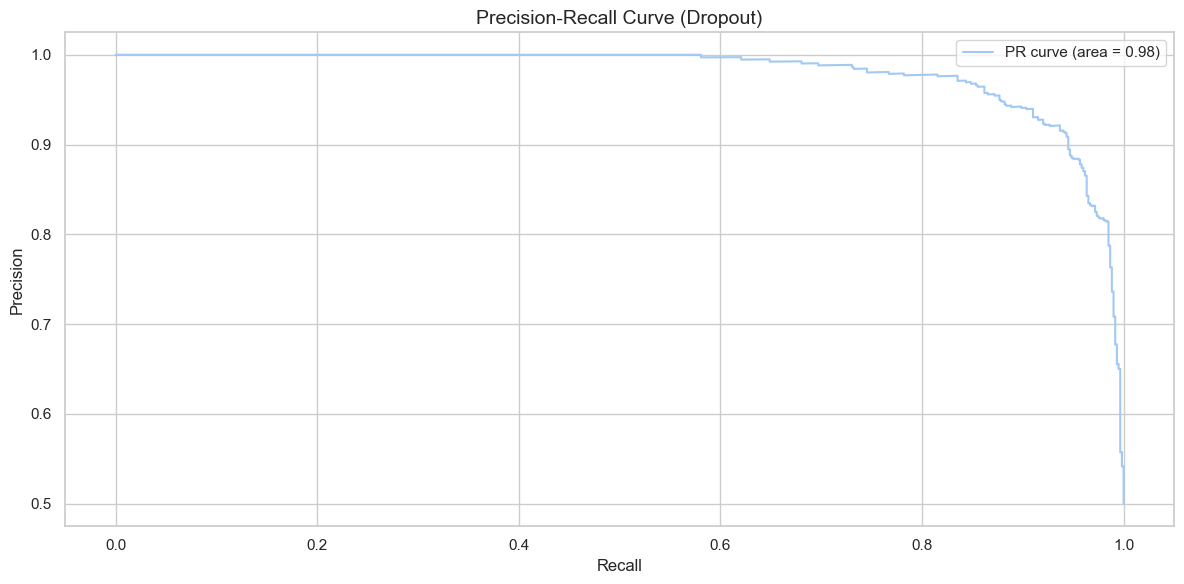

In [90]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, f1_score

import matplotlib.pyplot as plt

# Load model Random Forest yang sudah disimpan
model = joblib.load("model_prediksi.pkl")

# Prediksi pada data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.3f}")
print(f"F1 Score (weighted): {f1_score(y_test, y_pred, average='weighted'):.3f}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Dropout)')
plt.legend()
plt.tight_layout()
plt.show()

Confusion Matrix menunjukkan bagaimana model mengklasifikasikan data uji:
- 560: True Negative (TN) = Model memprediksi kelas 0 dengan benar.
- 41: False Positive (FP) = Model salah memprediksi kelas 1, padahal seharusnya kelas 0.
- 52: False Negative (FN) = Model salah memprediksi kelas 0, padahal seharusnya kelas 1.
- 549: True Positive (TP) = Model memprediksi kelas 1 dengan benar.

Bagian Classification Report
- Precision: Dari semua prediksi kelas 1 yang dibuat model, 93% benar.
- Recall: Dari semua data sebenarnya kelas 1, model mengenali 91% dengan benar.
- F1-score: Kombinasi precision dan recall menunjukkan keseimbangan antara keduanya.
- Support: Jumlah sampel untuk masing-masing kelas.


Akurasi dan Statistik Rata-rata
- Akurasi: 92% Model berhasil membuat prediksi yang benar dalam 92% kasus.
- Macro Avg: Rata-rata precision, recall, dan F1-score antar kelas.
- Weighted Avg: Rata-rata precision, recall, dan F1-score yang memperhitungkan jumlah sampel per kelas.

ROC AUC Score: Mengukur seberapa baik model membedakan antara kelas positif dan negatif. Nilai 0.977 menunjukkan model memiliki performa yang sangat baik.
F1 Score (weighted) mempertimbangkan proporsi data untuk memberikan gambaran menyeluruh tentang keseimbangan precision dan recall.



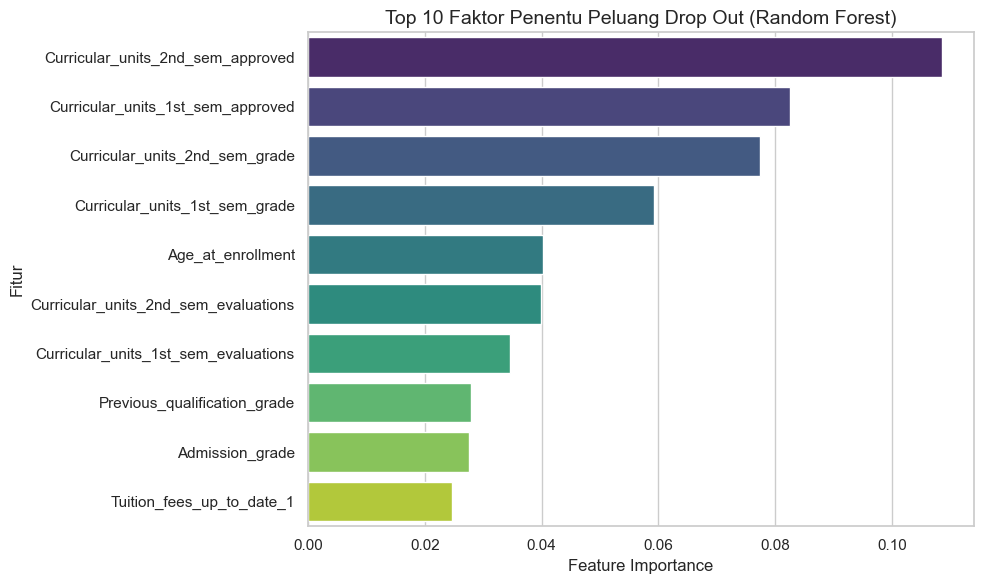

                                    Fitur  Importance
13      Curricular_units_2nd_sem_approved    0.108655
7       Curricular_units_1st_sem_approved    0.082540
14         Curricular_units_2nd_sem_grade    0.077443
8          Curricular_units_1st_sem_grade    0.059285
3                       Age_at_enrollment    0.040221
12   Curricular_units_2nd_sem_evaluations    0.039994
6    Curricular_units_1st_sem_evaluations    0.034538
1            Previous_qualification_grade    0.027922
2                         Admission_grade    0.027657
234             Tuition_fees_up_to_date_1    0.024658


In [91]:
import joblib
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Load model Random Forest yang sudah dilatih
rf = joblib.load("model_prediksi.pkl")

# Ambil nama fitur dari input_encoded (pastikan urutan sama dengan model)
feature_names = input_encoded.columns

# Ambil feature importances dari model
importances = rf.feature_importances_

# Buat DataFrame untuk visualisasi
feat_imp_df = (
    pd.DataFrame({"Fitur": feature_names, "Importance": importances})
    .sort_values("Importance", ascending=False)
)

# Plot 10 faktor teratas untuk peluang Drop Out
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x="Importance", y="Fitur", palette="viridis")
plt.title("Top 10 Faktor Penentu Peluang Drop Out (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

# Tampilkan tabel 10 fitur teratas
print(feat_imp_df.head(10))

Tabel berikut menunjukkan 10 fitur terpenting dalam prediksi risiko Drop Out mahasiswa berdasarkan model Random Forest. Nilai pada kolom `Importance` menunjukkan seberapa besar kontribusi masing-masing fitur terhadap keputusan model (semakin besar, semakin berpengaruh).

| No | Fitur                              | Importance | Penjelasan                                                                                  |
|----|------------------------------------|------------|---------------------------------------------------------------------------------------------|
| 1  | Curricular_units_2nd_sem_approved  | 0.1087     | Jumlah mata kuliah semester 2 yang disetujui. Semakin banyak, semakin kecil risiko Drop Out. |
| 2  | Curricular_units_1st_sem_approved  | 0.0825     | Jumlah mata kuliah semester 1 yang disetujui. Indikator progres akademik awal.              |
| 3  | Curricular_units_2nd_sem_grade     | 0.0774     | Nilai rata-rata semester 2. Nilai tinggi menurunkan risiko Drop Out.                        |
| 4  | Curricular_units_1st_sem_grade     | 0.0593     | Nilai rata-rata semester 1. Penting sebagai indikator awal performa akademik.               |
| 5  | Age_at_enrollment                  | 0.0402     | Usia saat mendaftar. Usia tertentu bisa berhubungan dengan risiko Drop Out.                 |
| 6  | Curricular_units_2nd_sem_evaluations | 0.0400   | Jumlah evaluasi/ujian semester 2 yang diikuti. Partisipasi aktif menurunkan risiko.         |
| 7  | Curricular_units_1st_sem_evaluations | 0.0345   | Jumlah evaluasi/ujian semester 1 yang diikuti.                                              |
| 8  | Previous_qualification_grade       | 0.0279     | Nilai pendidikan sebelumnya. Nilai tinggi = potensi akademik lebih baik.                    |
| 9  | Admission_grade                    | 0.0277     | Nilai masuk saat pendaftaran. Semakin tinggi, semakin kecil risiko Drop Out.                |
| 10 | Tuition_fees_up_to_date_1          | 0.0247     | Status pembayaran biaya kuliah (1 = tertib). Keterlambatan pembayaran meningkatkan risiko.  |

Kesimpulan:  
Fitur akademik semester awal (jumlah mata kuliah disetujui, nilai, evaluasi) adalah penentu utama risiko Drop Out. Faktor usia saat masuk, nilai pendidikan sebelumnya, dan keteraturan pembayaran juga berpengaruh signifikan. Intervensi sebaiknya difokuskan pada mahasiswa dengan progres akademik rendah dan masalah keuangan sejak semester awal.

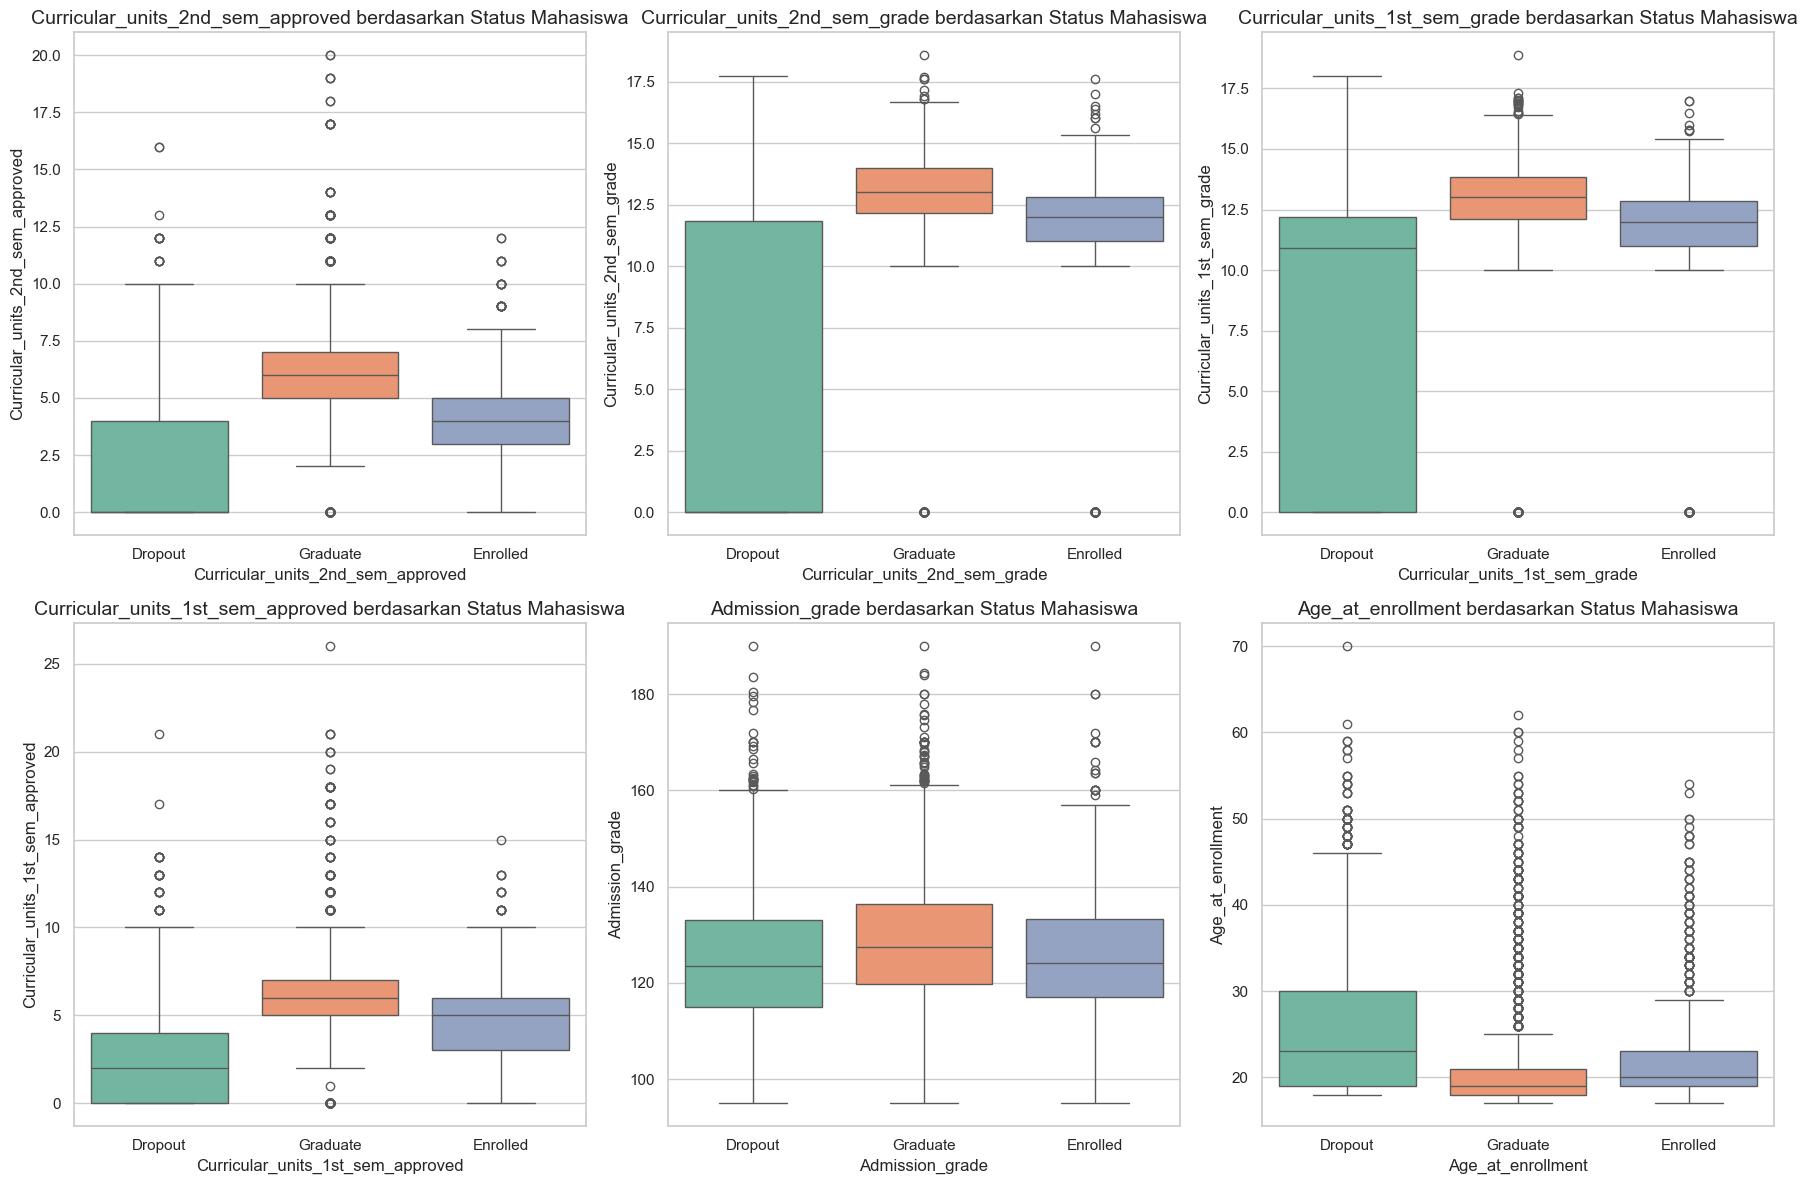


Distribusi 'Curricular_units_2nd_sem_approved' untuk masing-masing Status:
Status    Curricular_units_2nd_sem_approved
Dropout   0                                    727
          3                                    127
          5                                    119
          2                                    116
          4                                    112
          1                                     86
          6                                     64
          8                                     20
          7                                     19
          10                                    10
          12                                     7
          9                                      6
          11                                     5
          16                                     2
          13                                     1
Enrolled  4                                    160
          5                                    157
          3  

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load model Random Forest yang sudah dilatih
model = joblib.load("model_prediksi.pkl")

# Mapping label agar grafik mudah dipahami orang awam
status_map = {0: 'Tidak Drop out', 1: 'Drop Out'}
if 'Status' in dfc.columns:
    # Pastikan Status sudah dalam bentuk numerik (0/1) sesuai model
    dfc['StatusLabel'] = dfc['Status'].map(status_map).fillna(dfc['Status'])
else:
    dfc['StatusLabel'] = dfc['Status']

# Kolom yang akan divisualisasikan (fitur penting dari analisis sebelumnya)
cols = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Admission_grade',
    'Age_at_enrollment',
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    if str(dfc[col].dtype) in ['float64', 'int64']:
        sns.boxplot(data=dfc, x='StatusLabel', y=col, palette='Set2')
        plt.ylabel(col)
    else:
        sns.countplot(data=dfc, x=col, hue='StatusLabel', palette='Set2')
        plt.ylabel('Jumlah')
    plt.title(f'{col} berdasarkan Status Mahasiswa')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Tampilkan angka jumlah masing-masing kategori pada fitur yang dipilih untuk setiap status
for col in cols:
    print(f"\nDistribusi '{col}' untuk masing-masing Status:")
    print(dfc.groupby('Status')[col].value_counts())


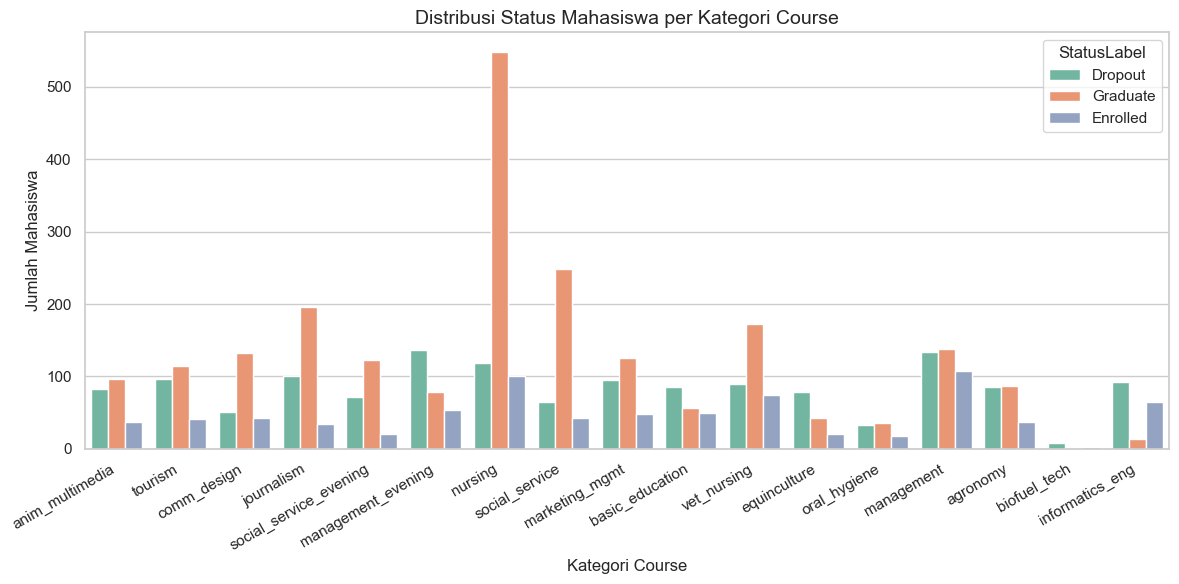


Distribusi 'Course' terhadap Status:
Status                  Dropout  Enrolled  Graduate
Course                                             
agronomy                     86        37        87
anim_multimedia              82        37        96
basic_education              85        50        57
biofuel_tech                  8         3         1
comm_design                  51        42       133
equinculture                 78        21        42
informatics_eng              92        64        14
journalism                  101        34       196
management                  134       108       138
management_evening          136        54        78
marketing_mgmt               95        48       125
nursing                     118       100       548
oral_hygiene                 33        17        36
social_service               65        42       248
social_service_evening       71        21       123
tourism                      96        41       115
vet_nursing               

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom Course sudah terlabel (bukan kode angka)
plt.figure(figsize=(12, 6))
sns.countplot(data=dfc, x='Course', hue='StatusLabel', palette='Set2')
plt.title('Distribusi Status Mahasiswa per Kategori Course')
plt.xlabel('Kategori Course')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Tampilkan distribusi Course vs Status
print("\nDistribusi 'Course' terhadap Status:")
print(dfc.groupby(['Course', 'Status']).size().unstack(fill_value=0))

# Persentase dropout per kategori Course
print("\nPersentase Dropout per Kategori Course:")
course_dropout = (dfc[dfc['Status'] == 'Dropout'].groupby('Course').size() / dfc.groupby('Course').size()) * 100
print(course_dropout.round(2).astype(str) + " %")


Penjelasan Output Distribusi Fitur Akademik dan Course terhadap Status Mahasiswa

1. Curricular_units_2nd_sem_approved
- Dropout: Mayoritas mahasiswa dropout tidak menyelesaikan (nilai 0) atau hanya sedikit mata kuliah semester 2 yang disetujui. Semakin sedikit unit yang disetujui, semakin tinggi risiko dropout.
- Enrolled: Distribusi lebih merata, banyak yang menyelesaikan 4–6 unit.
- Graduate: Didominasi mahasiswa yang menyelesaikan 6, 5, 8, atau 7 unit. Semakin banyak unit yang disetujui, semakin besar peluang lulus.

2. Curricular_units_2nd_sem_grade & Curricular_units_1st_sem_grade
- Dropout: Banyak mahasiswa dropout memiliki nilai 0 (tidak mengikuti/tidak lulus), atau nilai rendah (10–13).
- Graduate: Nilai tersebar di rentang lebih tinggi, banyak yang di atas 13–17. Nilai tinggi di semester awal sangat berhubungan dengan kelulusan.

3. Curricular_units_1st_sem_approved
- Dropout: Didominasi mahasiswa yang tidak menyelesaikan unit (0) atau hanya 3–5 unit.
- Graduate: Banyak yang menyelesaikan 6–8 unit, bahkan ada yang lebih dari itu. Semakin banyak unit semester 1 yang disetujui, semakin kecil risiko dropout.

4. Admission_grade
- Dropout: Banyak mahasiswa dropout memiliki nilai masuk (admission) di kisaran 100–140.
- Graduate: Nilai masuk lebih bervariasi dan cenderung lebih tinggi, hingga 190.

5. Age_at_enrollment
- Dropout: Didominasi usia muda (18–21 tahun), namun ada juga yang dropout di usia lebih tua.
- Graduat: Usia lebih tersebar, namun tetap banyak yang lulus di usia muda.

6. Distribusi Course terhadap Status
- Dropout: Tinggi pada jurusan seperti management, management_evening, nursing, journalism, marketing_mgmt, dan informatics_eng.
- Graduate: Nursing, journalism, social_service, dan management memiliki jumlah lulusan tinggi.
- Enrolled: Tersebar di berbagai jurusan, namun nursing dan management juga mendominasi.

7. Persentase Dropout per Kategori Course
- Tertinggi: biofuel_tech (66.67%), equinculture (55.32%), informatics_eng (54.12%), management_evening (50.75%), basic_education (44.27%).
- Terendah: nursing (15.4%), social_service (18.31%), vet_nursing (26.71%), journalism (30.51%).
- Insight: Jurusan dengan persentase dropout tinggi perlu perhatian khusus, baik dari sisi akademik maupun dukungan non-akademik.

Kesimpulan:
Fitur akademik semester awal (jumlah unit disetujui dan nilai) sangat menentukan status akhir mahasiswa. Mahasiswa dengan progres rendah di semester 1 & 2 sangat rentan dropout. Jurusan tertentu juga memiliki risiko dropout lebih tinggi, sehingga intervensi bisa difokuskan pada kelompok ini.

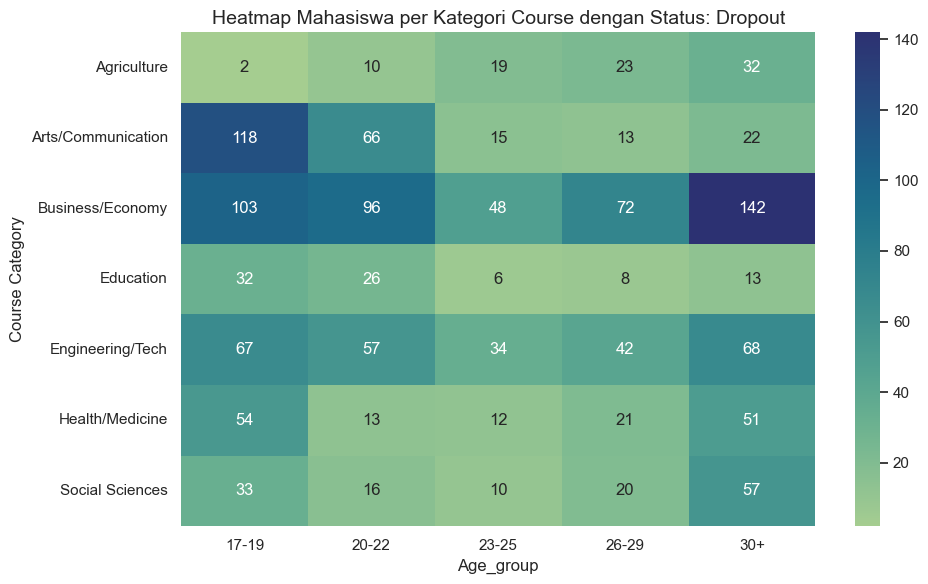

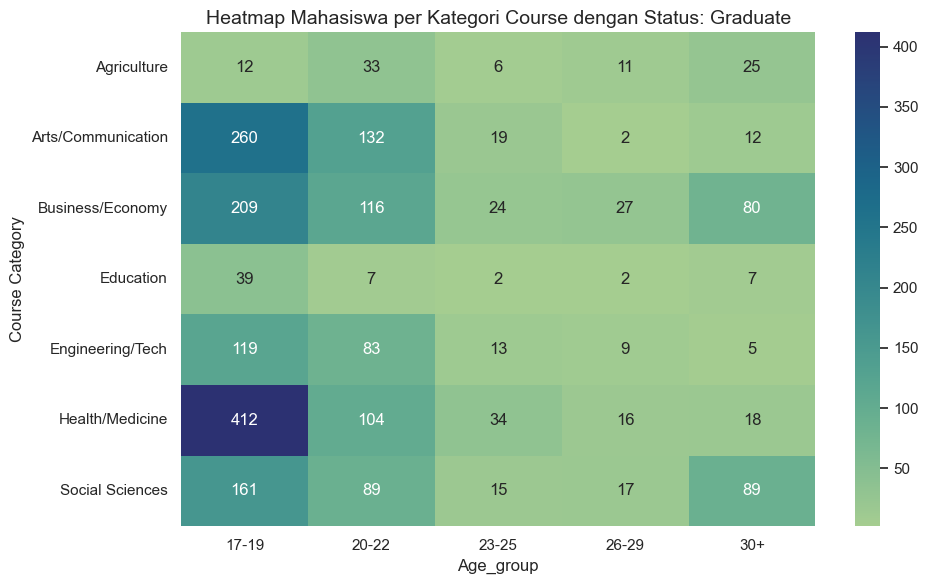

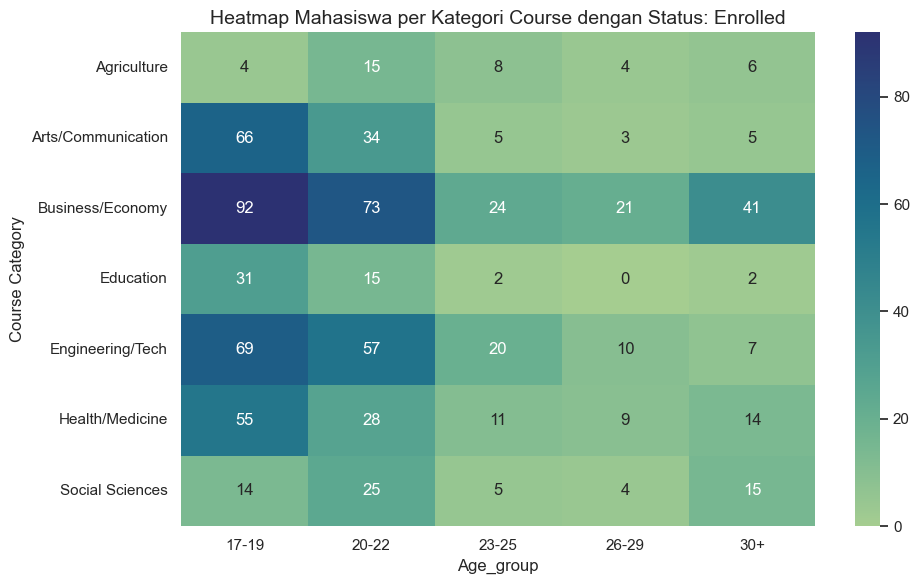

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset hasil labeling
df_labeled = pd.read_csv('cleaned_dataset_labeled.csv')

# Pastikan kolom yang diperlukan ada
if {'Course', 'Age_group', 'Status'}.issubset(df_labeled.columns):
    # Gunakan label status yang mudah dibaca jika sudah ada
    if 'StatusLabel' in df_labeled.columns:
        status_col = 'StatusLabel'
    else:
        status_col = 'Status'
    status_list = df_labeled[status_col].dropna().unique()
    course_categories = sorted(df_labeled['Course'].unique())

    for status in status_list:
        df_filtered = df_labeled[df_labeled[status_col] == status]
        heatmap_data = pd.crosstab(index=df_filtered['Course'], columns=df_filtered['Age_group'])
        heatmap_data = heatmap_data.reindex(course_categories, fill_value=0)

        plt.figure(figsize=(10, 6))
        sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='crest')
        plt.title(f'Heatmap Mahasiswa per Kategori Course dengan Status: {status}')
        plt.xlabel('Age_group')
        plt.ylabel('Course Category')
        plt.tight_layout()
        plt.show()
else:
    print("Kolom 'Course', 'Age_group', atau 'Status' tidak ditemukan di dataset.")


Insight Heatmap: Drop Out Berdasarkan Course & Age Group
Heatmap ini menggambarkan jumlah mahasiswa yang drop out berdasarkan kategori kursus dan kelompok usia. Dengan melihat pola warna yang berubah dari hijau muda hingga biru tua, kita bisa menarik beberapa wawasan penting:

Distribusi Mahasiswa Berdasarkan Kategori Kursus & Kelompok Usia
- Health/Medicine memiliki jumlah mahasiswa tertinggi di usia 17-19, baik dalam kategori mahasiswa yang lulus maupun mereka yang masih aktif.
- Arts/Communication juga menarik banyak mahasiswa muda, terutama di usia 17-19, dengan angka lulusan yang cukup tinggi tetapi juga tingkat drop out yang lebih besar dibandingkan beberapa kategori lain.
- Business/Economy memiliki tren unik dengan lebih banyak mahasiswa usia 30+, tetapi juga mengalami tingkat drop out yang tinggi di kelompok usia ini.
- Engineering/Tech dan Social Sciences menunjukkan distribusi yang lebih merata di berbagai kelompok usia.

Tren Drop Out
- Business/Economy mencatat jumlah drop out tertinggi, terutama di usia 30+.
- Arts/Communication juga memiliki tingkat drop out yang tinggi, terutama di usia 17-19.
- Agriculture menjadi kategori dengan tingkat drop out terendah, tetapi juga memiliki jumlah mahasiswa yang lebih sedikit dibandingkan kategori lain.

Tren Kelulusan
- Health/Medicine memiliki angka kelulusan paling tinggi, terutama di usia 17-19, menunjukkan bahwa program ini menarik banyak mahasiswa muda dan memiliki tingkat penyelesaian studi yang kuat.
- Arts/Communication juga menunjukkan jumlah lulusan yang signifikan di usia muda.
- Kategori Business/Economy, Engineering/Tech, dan Social Sciences memiliki kelulusan yang lebih tersebar di berbagai kelompok usia.
Kesimpulan & Wawasan Strategis
- Bidang Health/Medicine menunjukkan daya tarik kuat bagi mahasiswa muda dan memiliki tingkat kelulusan tinggi, yang bisa mencerminkan program pendidikan yang lebih terstruktur atau sistem pembelajaran yang efektif.
- Business/Economy menarik lebih banyak mahasiswa yang lebih tua, tetapi tingkat drop out tinggi di kelompok ini mungkin menunjukkan tantangan dalam penyelesaian studi mereka.
- Arts/Communication memiliki angka drop out tinggi, tetapi juga tingkat kelulusan yang cukup besar. Ini bisa menunjukkan bahwa bidang ini menarik banyak mahasiswa tetapi memiliki tantangan dalam menyelesaikan studi.
- Agriculture memiliki jumlah mahasiswa rendah, tetapi tingkat drop out juga sedikit. Ini menunjukkan bahwa meskipun bidang ini tidak menarik banyak mahasiswa, mereka yang memilihnya cenderung lebih stabil dalam menyelesaikan studi.


**Korelasi heatmap dan feature importance:**
- Fitur akademik semester awal (approved, grade, evaluations) sangat menentukan, dan heatmap memperlihatkan jurusan dengan performa akademik rendah cenderung memiliki dropout lebih tinggi.
- Usia saat masuk kuliah (Age_at_enrollment) juga berpengaruh, terlihat pada distribusi usia di heatmap.
- Jurusan dengan banyak mahasiswa usia muda dan progres akademik baik cenderung memiliki dropout lebih rendah.


Evaluasi Drop Out Berdasarkan Fitur

Berdasarkan hasil model Random Forest, berikut adalah fitur-fitur dengan pengaruh terbesar terhadap keputusan mahasiswa Drop Out:
![heatmap.png](attachment:heatmap.png)
1. Curricular_units_2nd_sem_approved — Semakin banyak mata kuliah semester 2 yang disetujui, semakin kecil risiko Drop Out.
2. Curricular_units_2nd_sem_grade — Nilai akademik semester 2 sangat menentukan keberlanjutan studi.
3. Curricular_units_1st_sem_grade — Nilai semester 1 menjadi indikator awal risiko Drop Out.
4. Curricular_units_1st_sem_approved — Jumlah mata kuliah semester 1 yang disetujui juga sangat berpengaruh.
5. Admission_grade — Nilai masuk memberikan gambaran potensi akademik awal.
6. Curricular_units_2nd_sem_evaluations — Partisipasi dalam evaluasi semester 2 menurunkan risiko Drop Out.
7. Previous_qualification_grade — Nilai pendidikan sebelumnya berkontribusi pada keberhasilan studi.
8. Age_at_enrollment — Usia saat mendaftar memengaruhi risiko Drop Out.
9. Tuition_fees_up_to_date — Keteraturan pembayaran biaya kuliah menurunkan risiko Drop Out.
10. Curricular_units_1st_sem_evaluations — Partisipasi evaluasi semester 1 juga penting.



Rekomendasi Action Items untuk Menurunkan Drop Out

Berikut adalah daftar tindakan strategis berbasis data yang dapat diimplementasikan oleh manajemen Jaya Jaya Institut untuk mengurangi tingkat Drop Out:

Berdasarkan seluruh proses analisis data, pemodelan, dan evaluasi, berikut poin-poin utama yang dapat disimpulkan:
- **Model Random Forest dan XGBoost** memberikan performa terbaik dalam memprediksi risiko dropout mahasiswa, dengan akurasi dan F1-score tinggi, serta mampu membedakan kelas Drop Out dan Tidak Drop Out dengan baik.
- **Faktor akademik** seperti jumlah mata kuliah yang disetujui dan nilai pada semester 1 & 2 adalah penentu utama risiko dropout. Mahasiswa dengan progres akademik rendah di semester awal sangat rentan keluar.
- **Faktor keuangan** (keteraturan pembayaran biaya kuliah, status debitur) dan **penerima beasiswa** juga berpengaruh signifikan terhadap risiko dropout.
- **Usia saat masuk kuliah** dan **jurusan tertentu** (misal: Arts) memiliki tingkat dropout lebih tinggi, terutama pada kelompok usia muda.
- **Faktor demografi dan ekonomi makro** (seperti GDP, tingkat pengangguran) memiliki pengaruh lebih kecil dibanding faktor akademik dan keuangan individu.



Saran 


1. **Intervensi Akademik Dini**
    - Monitoring progres akademik mahasiswa di semester 1 & 2 secara berkala.
    - Identifikasi mahasiswa dengan nilai rendah atau sedikit mata kuliah yang disetujui sejak awal.
    - Sediakan program remedial, bimbingan belajar, dan mentoring akademik.

2. **Dukungan Keuangan dan Konseling**
    - Identifikasi mahasiswa dengan status debitur atau keterlambatan pembayaran biaya kuliah.
    - Tawarkan solusi seperti keringanan, cicilan, atau beasiswa tambahan.
    - Perkuat layanan konseling keuangan dan sosialisasi program bantuan.

3. **Pendekatan Khusus untuk Jurusan dan Usia Risiko Tinggi**
    - berdasarkan output ![output1.png](attachment:output1.png)

    - Fokuskan program pencegahan dropout pada jurusan dan kelompok usia yang memiliki tingkat dropout tinggi.
    - Kembangkan program orientasi, adaptasi, dan penguatan soft skill untuk mahasiswa baru, terutama usia <23 tahun.
    - Tawarkan program orientasi dan adaptasi khusus untuk mahasiswa yang lebih tua atau berasal dari latar belakang pendidikan berbeda.
    - Sediakan layanan konseling dan career coaching.

4.  **Insight Usia & Jurusan**
    - Mahasiswa usia 17-19 tahun mendominasi Health/Medicine dan Arts/Communication, namun dropout di Arts/Communication lebih tinggi pada kelompok usia muda.
    - Business/Economy memiliki dropout tertinggi pada mahasiswa usia 30+, menandakan tantangan adaptasi atau beban eksternal pada mahasiswa dewasa.
    - Engineering/Tech dan Social Sciences relatif stabil di semua kelompok usia, namun tetap perlu perhatian pada kelompok usia muda yang baru beradaptasi dengan dunia kampus.

5.  **Action Item Spesifik berdasar Heatmap**
    - Mahasiswa Muda (17-19 tahun) di Arts/Communication: Perkuat orientasi, mentoring, pengembangan soft skill, dan konseling adaptasi sejak awal semester. Libatkan alumni/senior sebagai mentor.
    - Mahasiswa Usia 30+ di Business/Economy: Tawarkan fleksibilitas jadwal (kelas malam, blended learning), konseling karir, manajemen waktu, dan komunitas mahasiswa dewasa.
    - Semua Jurusan dengan Dropout Tinggi: Monitoring progres akademik lebih intensif pada semester awal, kolaborasi dengan dosen wali, program remedial, dan pelatihan belajar efektif.
    - Jurusan dengan Kelulusan Tinggi (Health/Medicine): Jadikan best practice—adopsi sistem pembelajaran, mentoring, dan monitoring yang terbukti efektif di jurusan ini untuk diterapkan di jurusan lain.

6. **Peningkatan Keterlibatan Akademik**
    - Dorong partisipasi aktif dalam evaluasi dan kegiatan akademik.
    - Sediakan workshop motivasi dan manajemen waktu.
    - Libatkan mahasiswa dalam komunitas akademik dan organisasi kampus.

7. **Peningkatan Sistem Monitoring dan Dashboard**
    - Implementasikan dashboard prediksi dropout berbasis data untuk memantau mahasiswa berisiko secara real-time.
    - Integrasikan model prediksi Drop Out ke dalam dashboard monitoring kampus.
    - Tampilkan metrik risiko Drop Out untuk tiap segmen mahasiswa.
    - Buat notifikasi dini untuk dosen wali atau bagian kemahasiswaan jika terdapat kenaikan risiko pada kelompok tertentu.
    - Libatkan dosen wali dan bagian kemahasiswaan dalam pemantauan dan tindak lanjut.

8. **Evaluasi dan Penyesuaian Kurikulum**
    - Tinjau kembali beban dan struktur kurikulum pada jurusan dengan dropout tinggi.
    - Sesuaikan metode pembelajaran agar lebih adaptif terhadap kebutuhan mahasiswa.


Berdasarkan hasil evaluasi model Random Forest dan XGBoost, faktor utama yang memengaruhi risiko mahasiswa Drop Out adalah progres akademik awal, seperti jumlah mata kuliah yang disetujui dan nilai semester 1 dan 2, yang menjadi indikator kuat keberlanjutan studi. Partisipasi dalam evaluasi pembelajaran juga menunjukkan hubungan positif dengan retensi mahasiswa. Selain itu, nilai masuk (admission grade) dan riwayat pendidikan sebelumnya turut menentukan keberhasilan studi. Faktor keuangan, khususnya keteraturan pembayaran biaya kuliah, memiliki pengaruh signifikan terhadap risiko Drop Out. Usia saat pendaftaran dan jurusan tertentu, terutama di kalangan mahasiswa muda, juga berkontribusi terhadap tingkat keluar yang tinggi. Sebaliknya, faktor eksternal seperti GDP dan tingkat pengangguran memiliki pengaruh yang lebih kecil dibandingkan faktor akademik dan keuangan individu. Oleh karena itu, diperlukan intervensi akademik dini, pemantauan pembayaran, skrining risiko saat pendaftaran, serta dukungan psikososial untuk menurunkan angka Drop Out di institusi.

### Terima kasih atas perhatiannya dan semoga proyek ini bermanfaat!

Kritik dan saran bisa disampaikan ke saya melalui : 

**Github:** [Profdara](https://github.com/Profdara)  
**LinkedIn:** [profdara](https://www.linkedin.com/in/profdara)
 